In [25]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
X = pd.read_excel("C:/Users/wkaco/Desktop/Assets_data.xlsx")
macro_data = pd.read_excel("C:/Users/wkaco/Desktop/CPIGDP.xlsx")
    
    # Preprocess macro data
macro_data = macro_data.interpolate().drop("DATE", axis=1)
macro_data = macro_data.fillna(method="ffill")
macro_data = pd.DataFrame((macro_data - macro_data.shift(1))/macro_data.shift(1)).dropna()

C:\Users\wkaco\AppData\Local\Temp\ipykernel_25956\268263551.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  macro_data = macro_data.fillna(method="ffill")


In [27]:
numeric_columns = macro_data.select_dtypes(include=['float64', 'int64']).columns


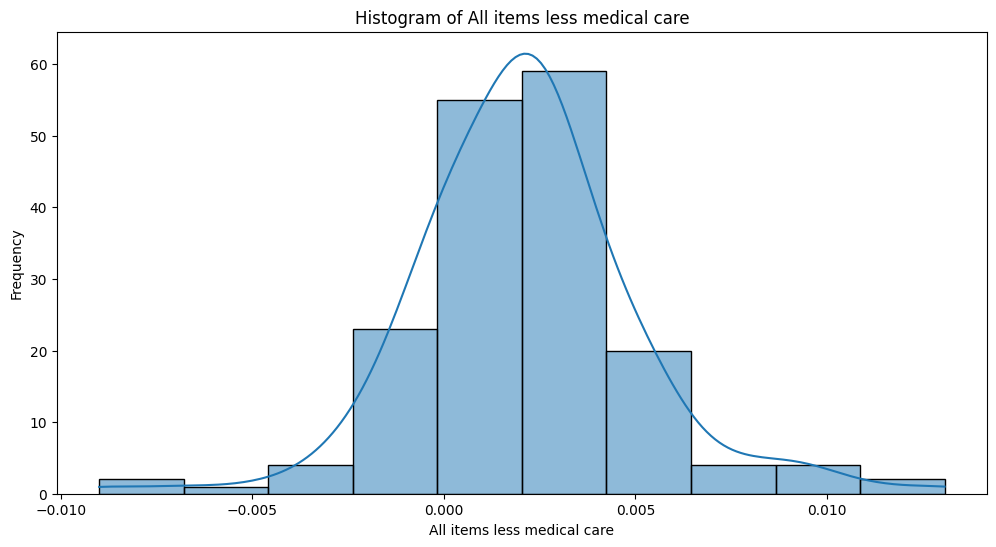

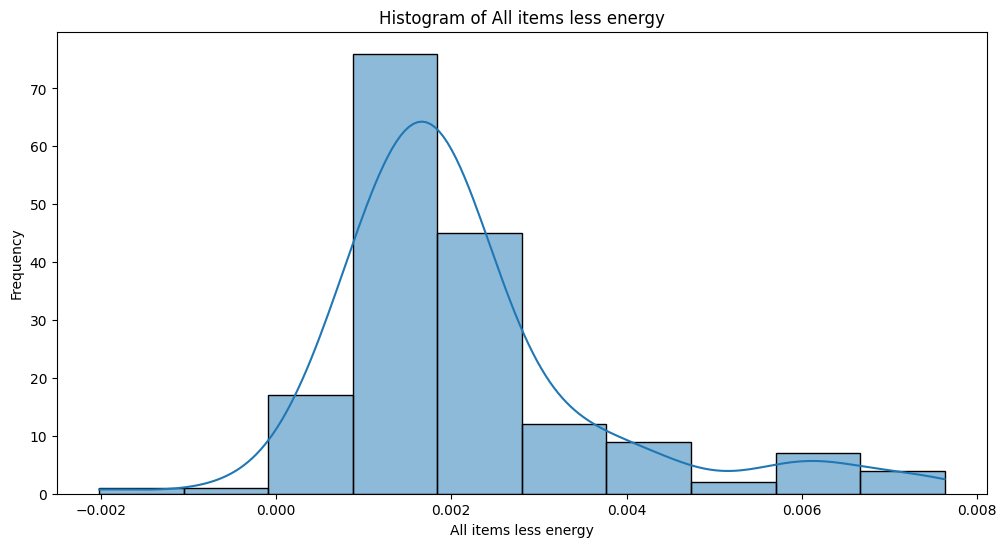

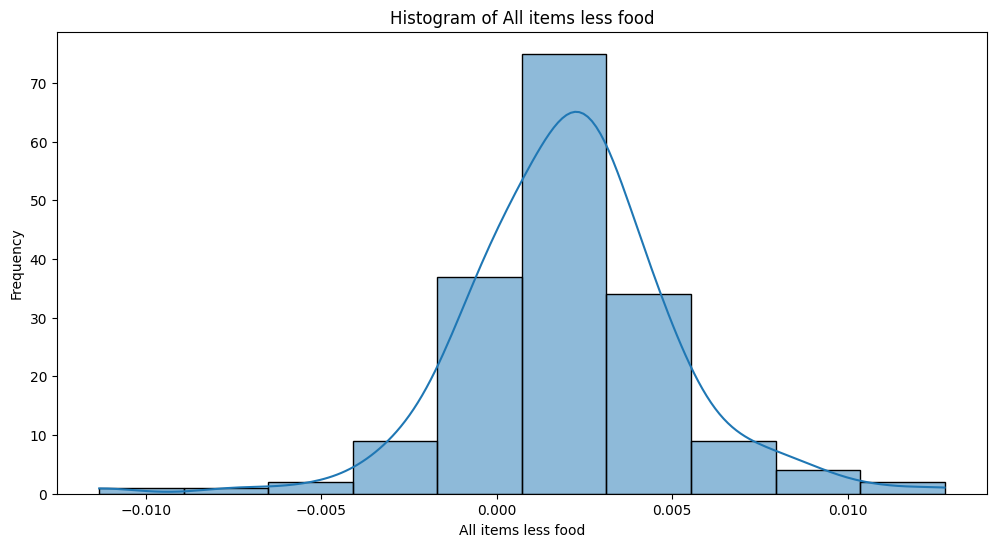

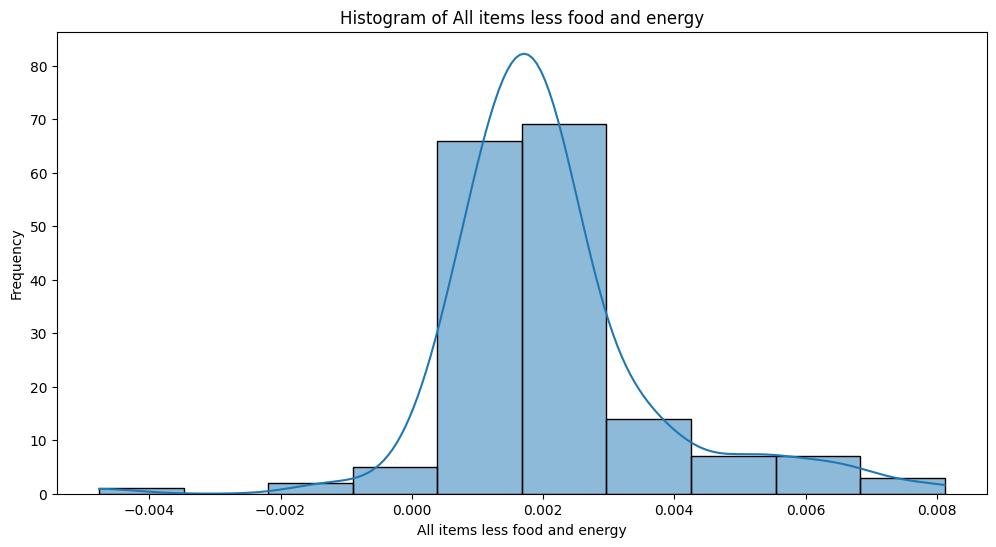

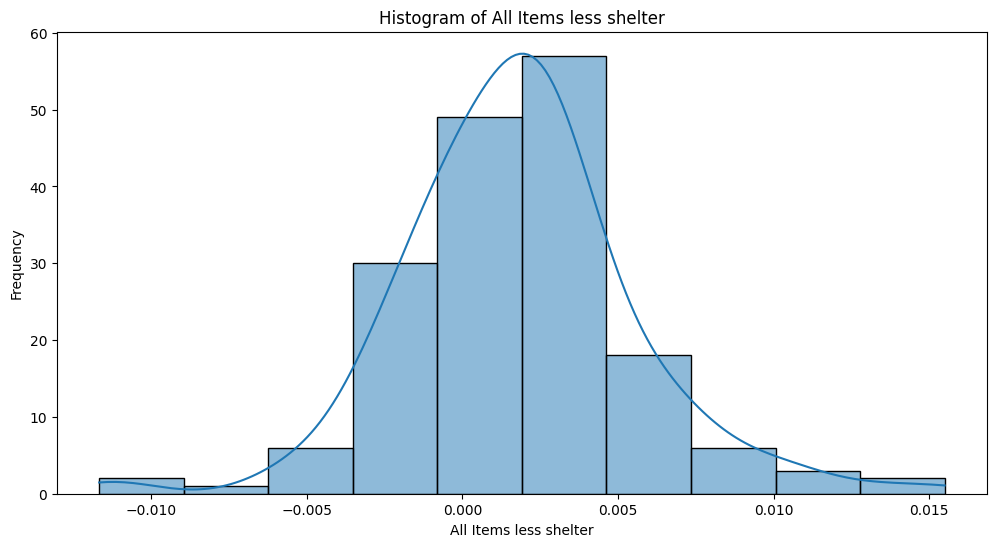

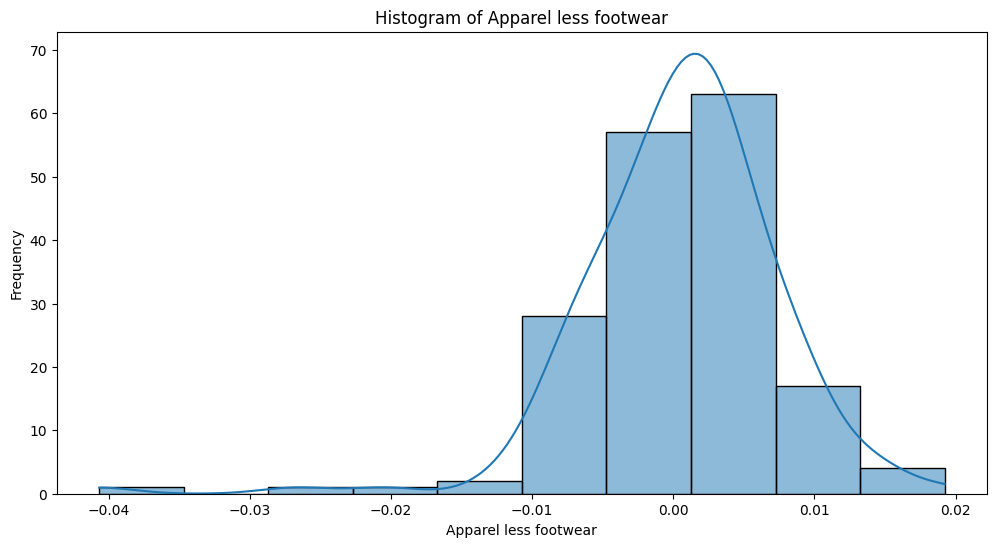

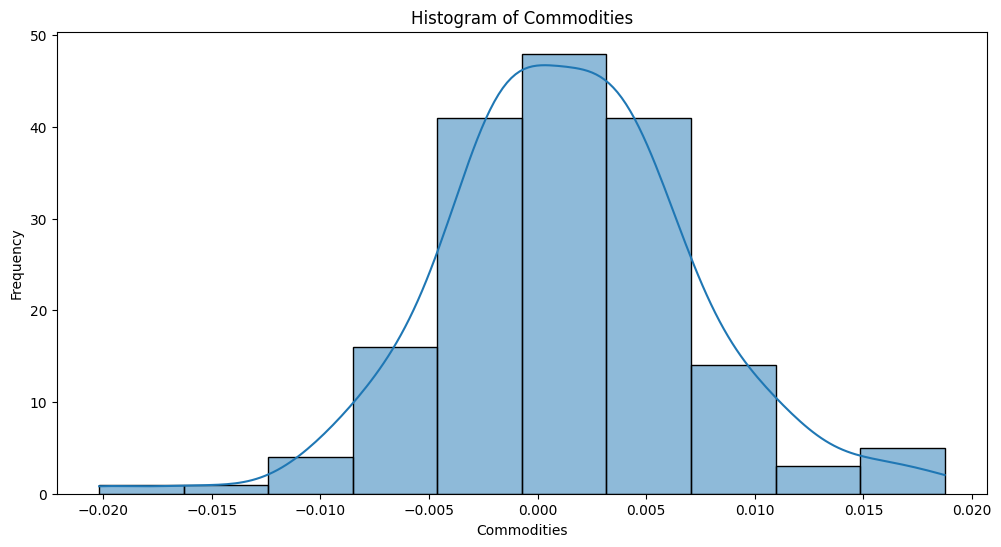

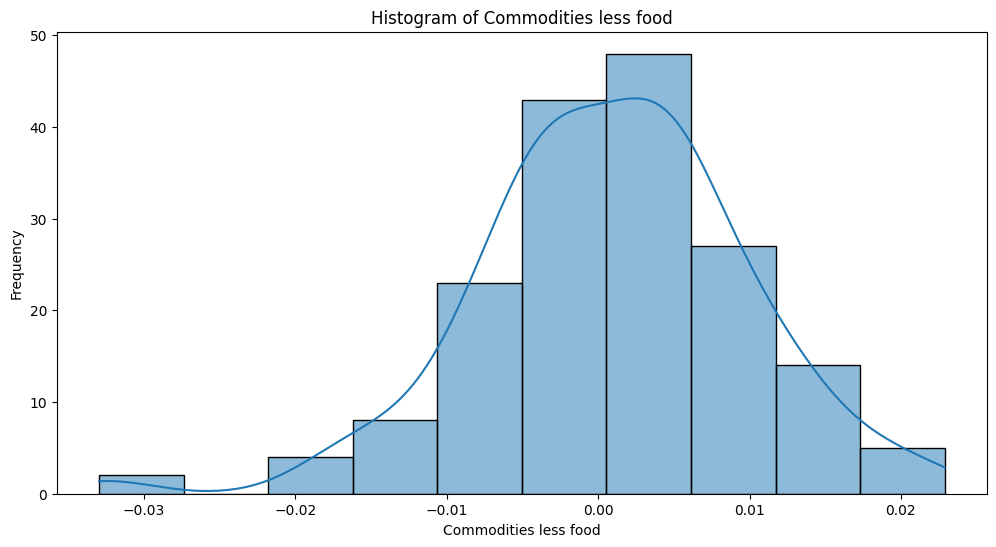

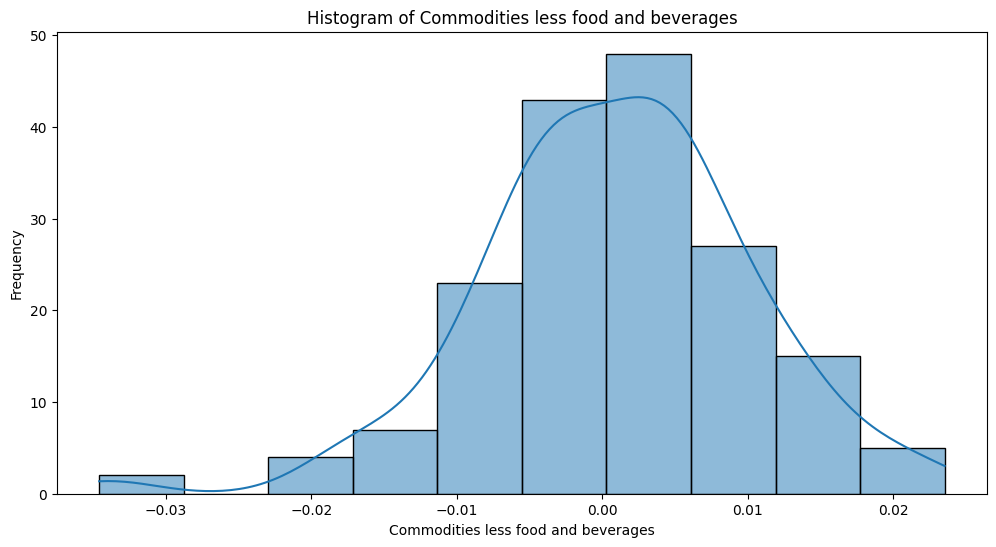

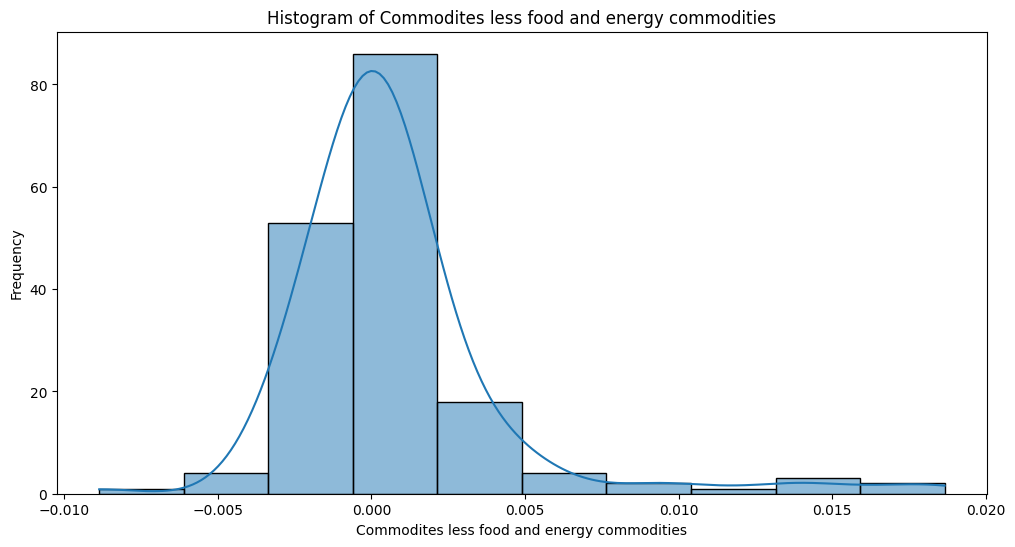

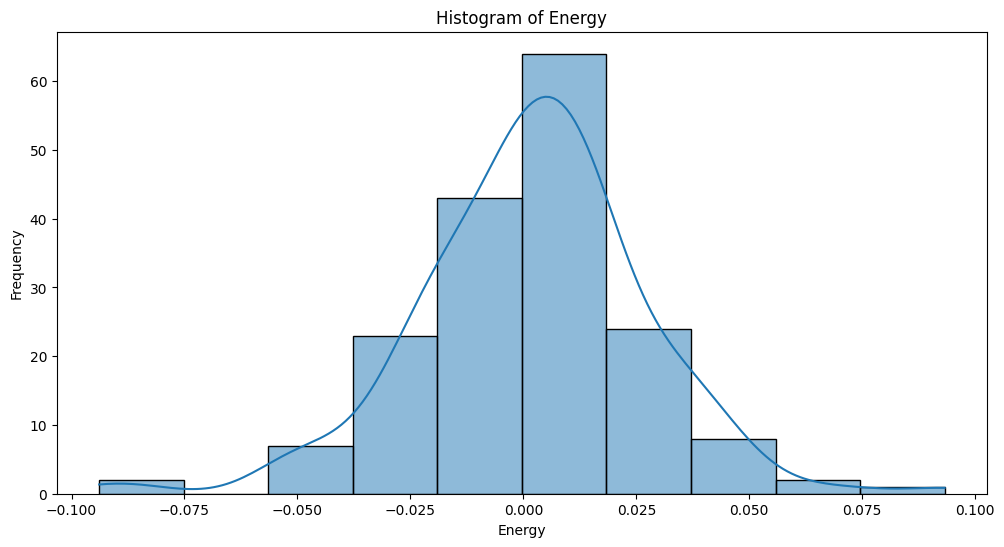

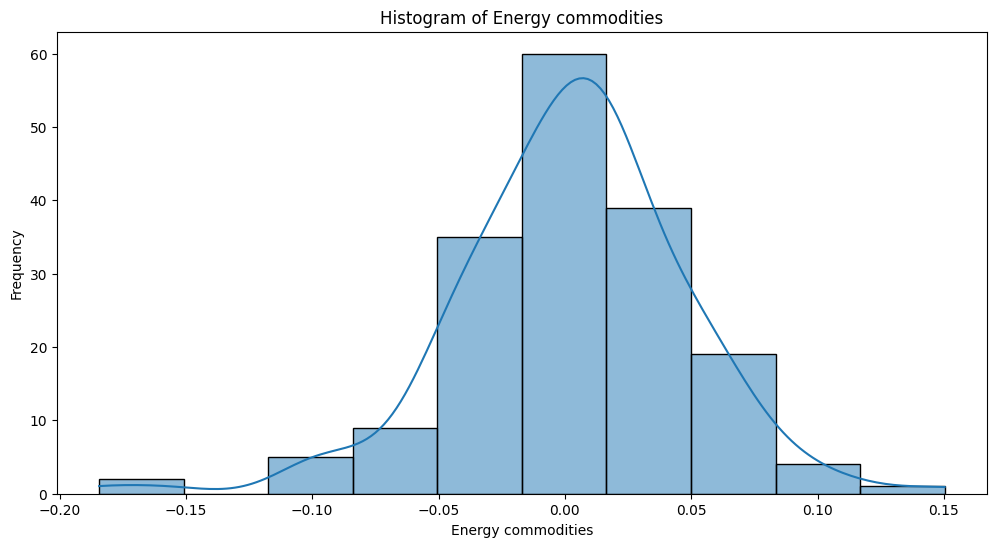

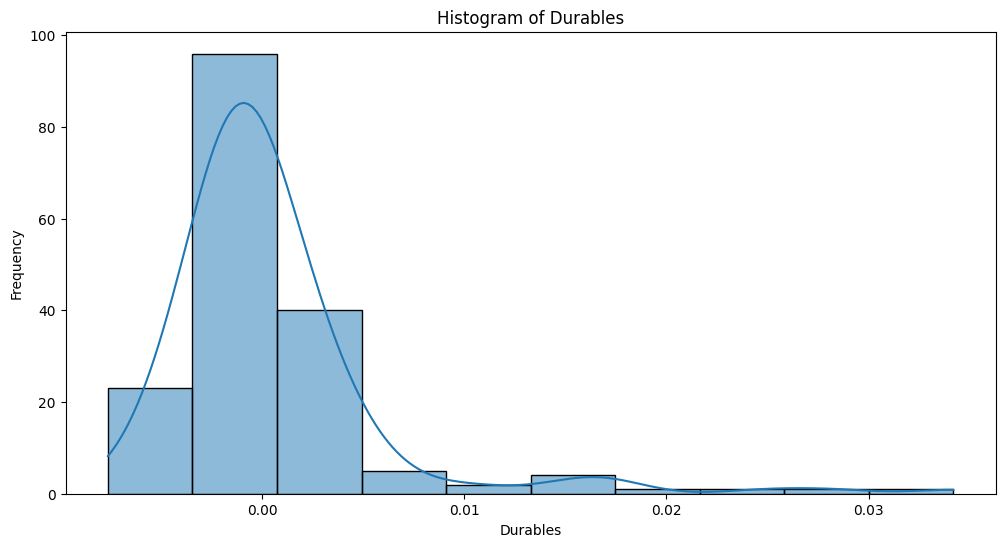

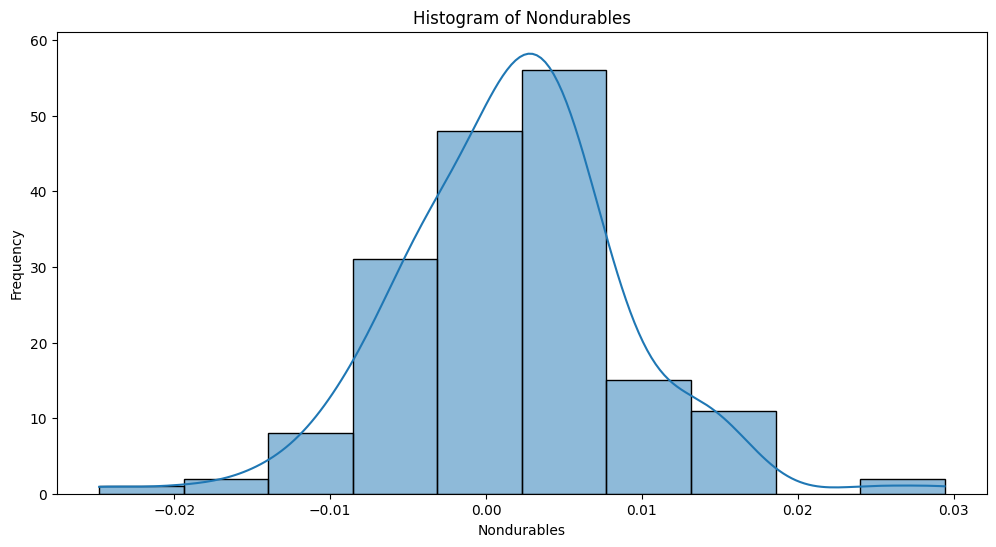

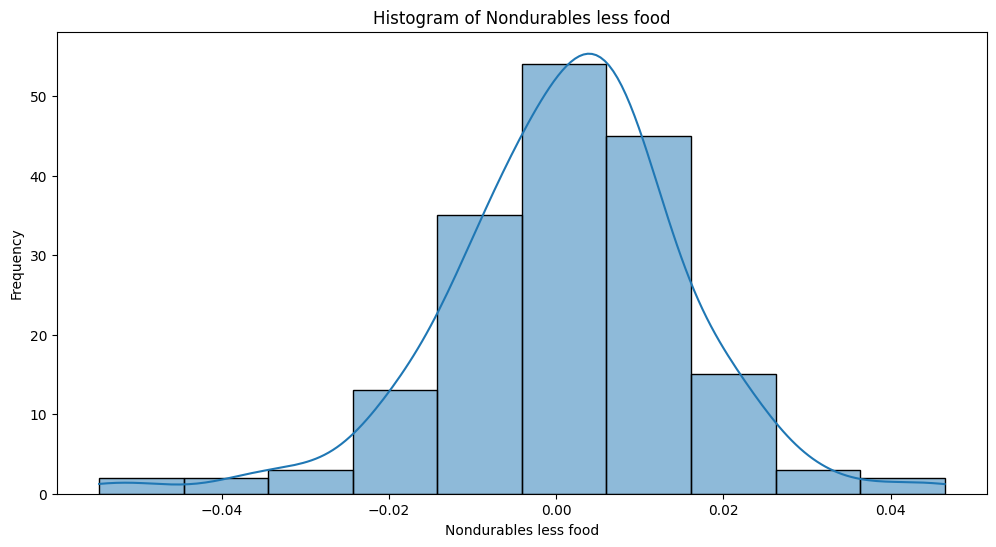

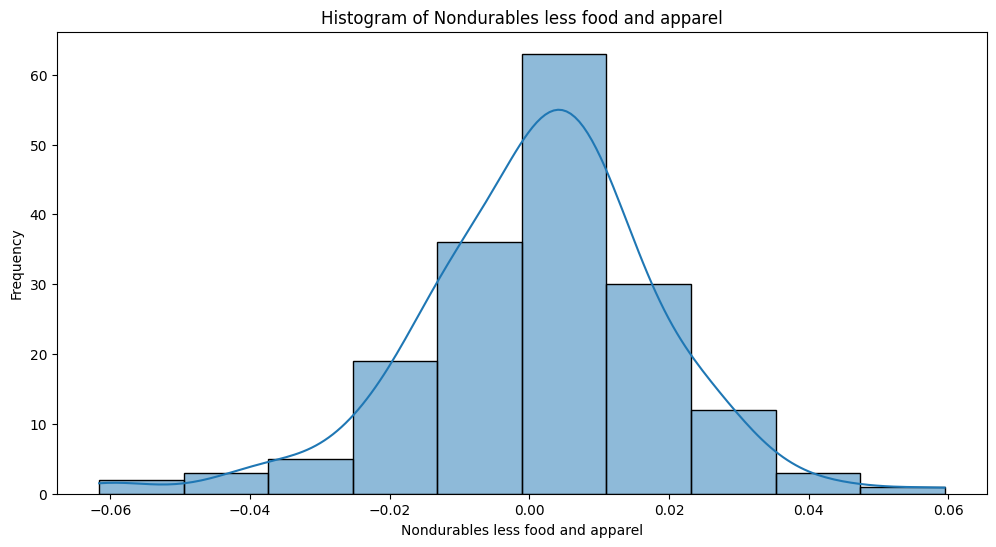

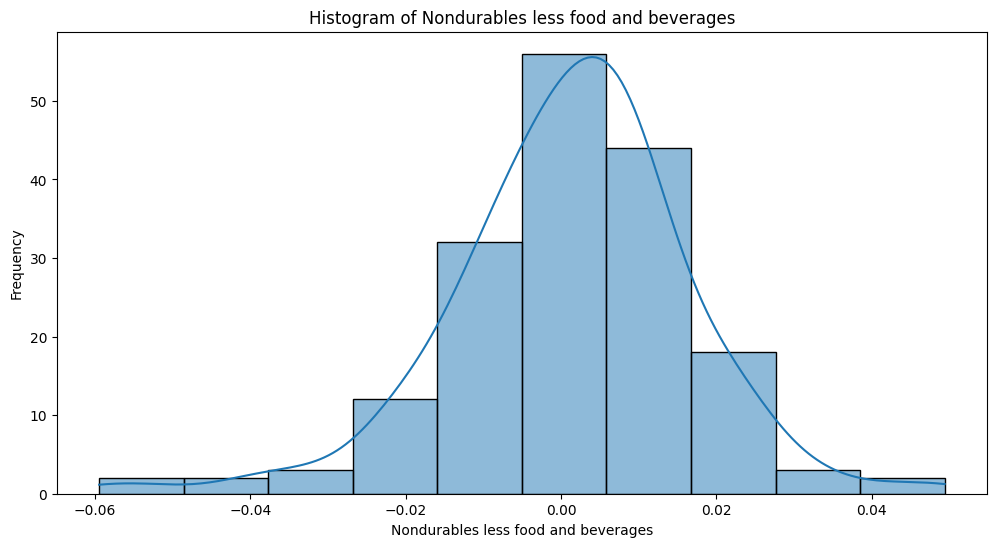

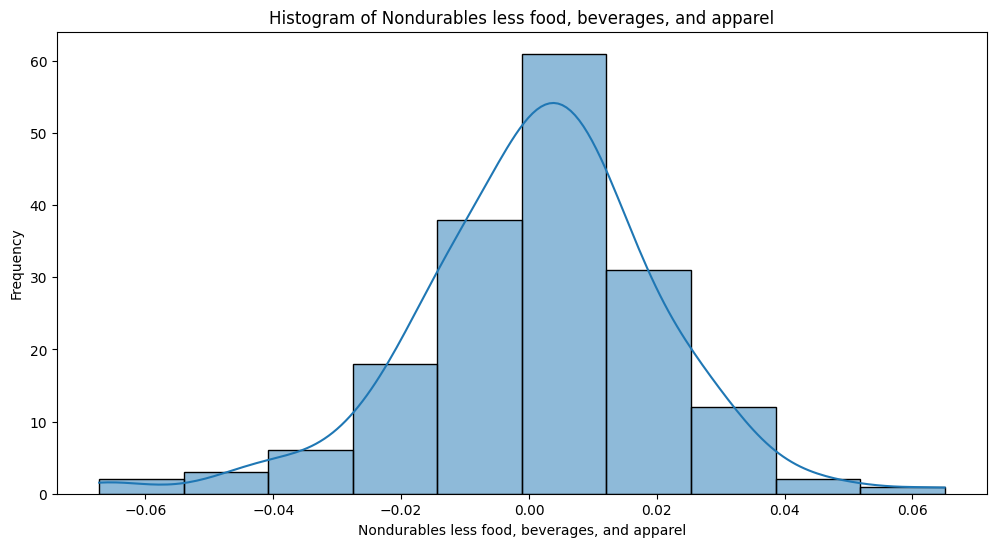

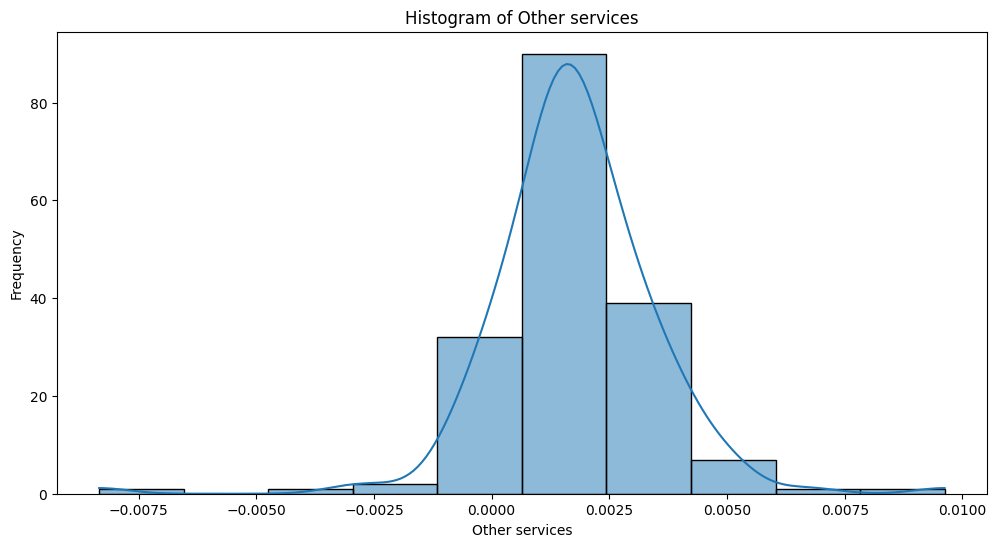

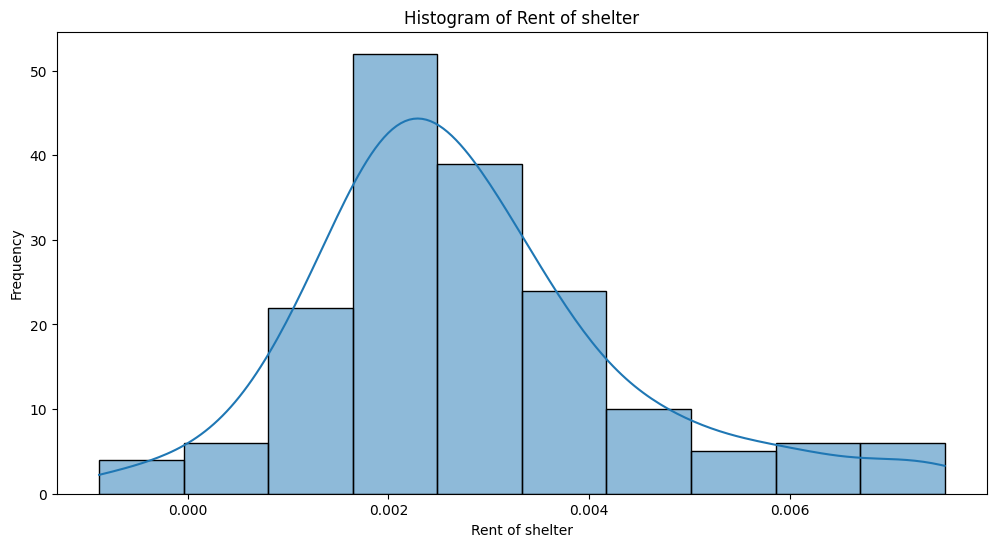

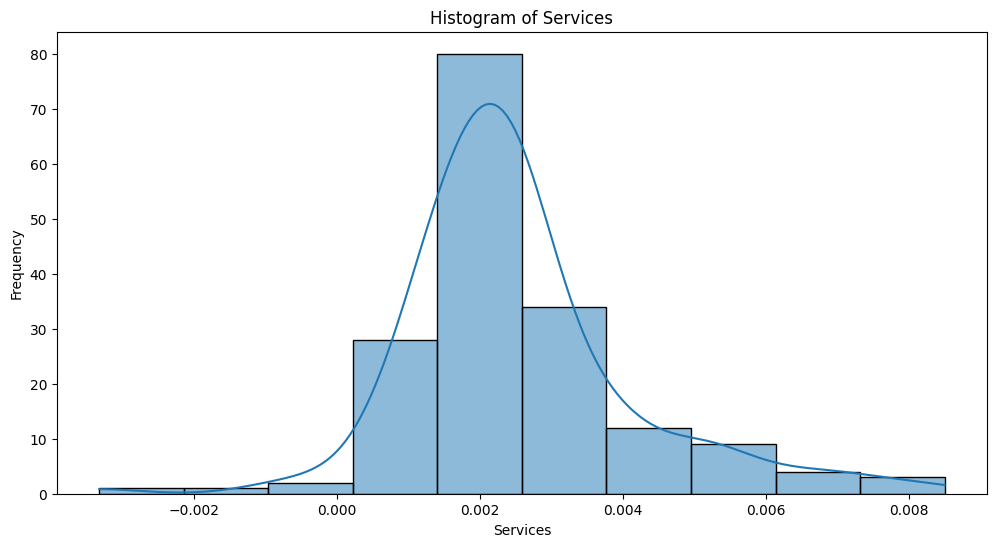

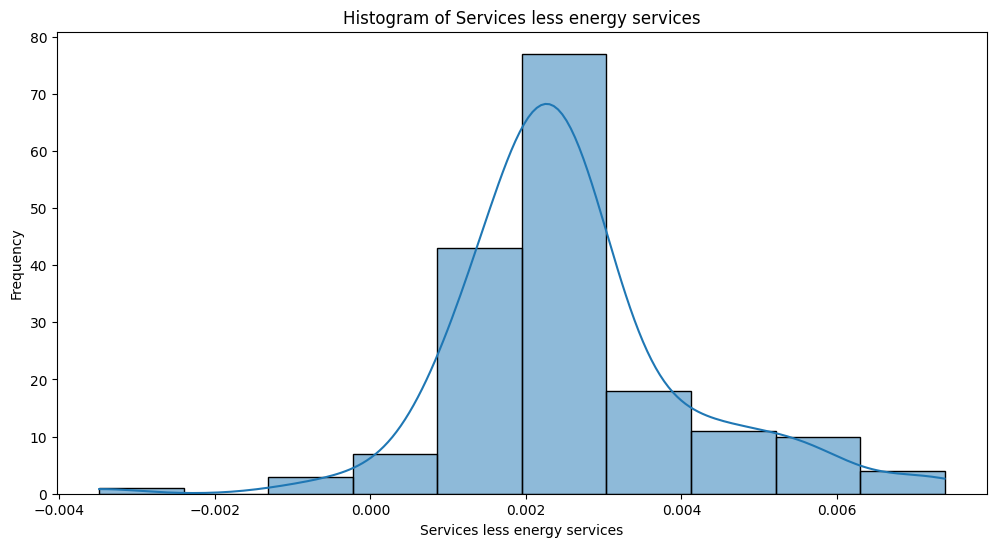

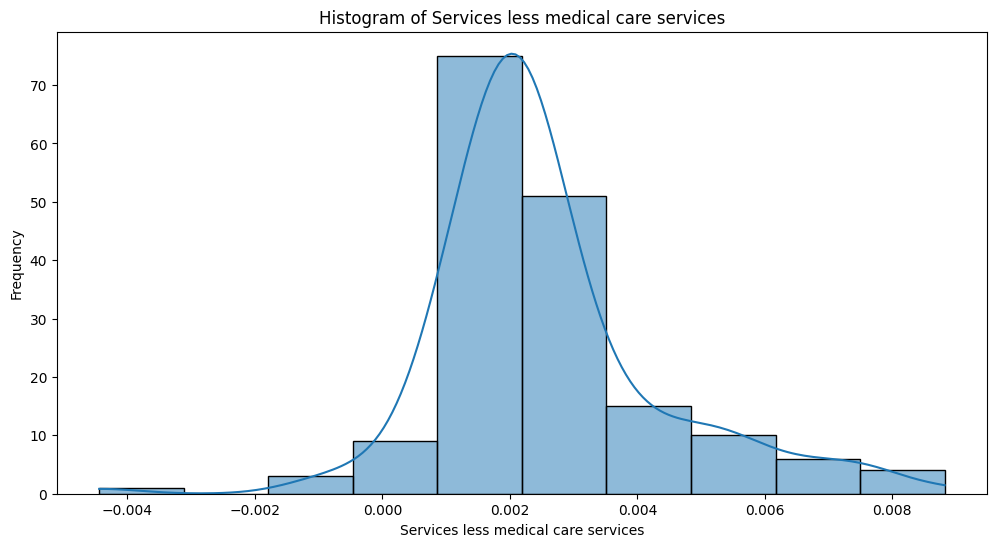

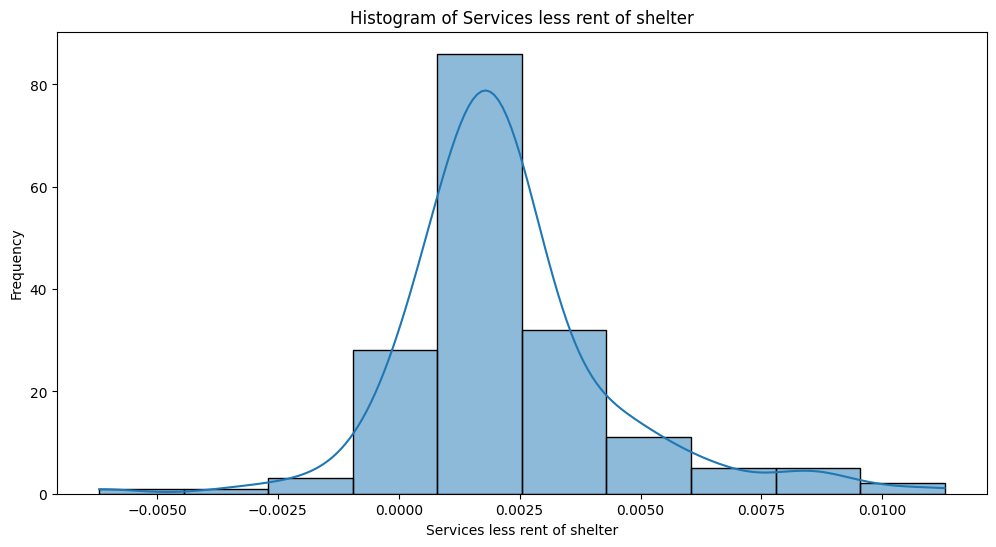

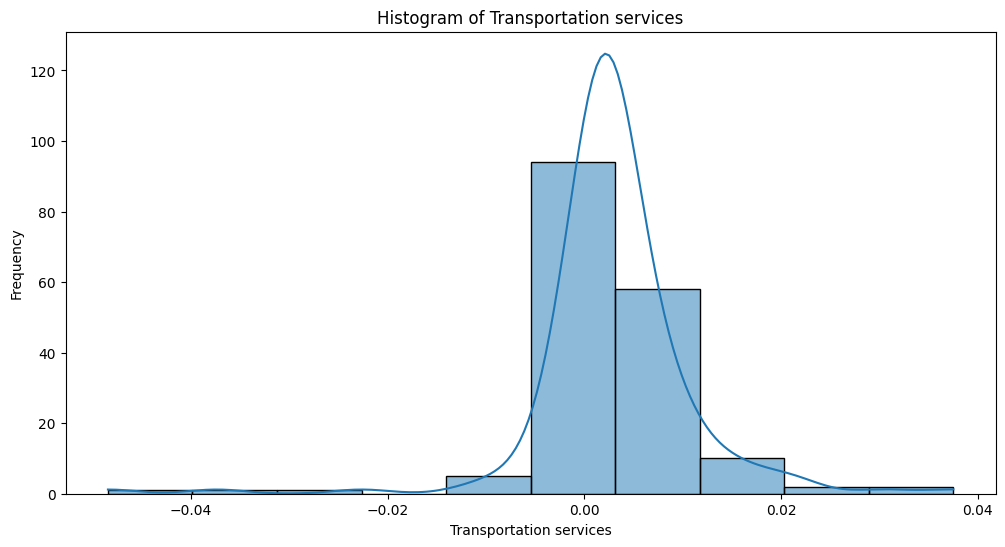

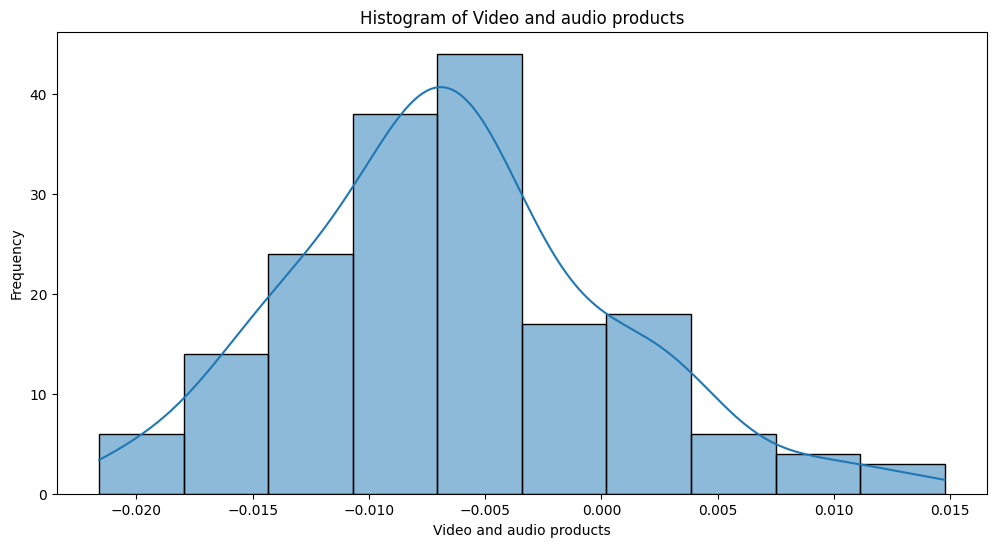

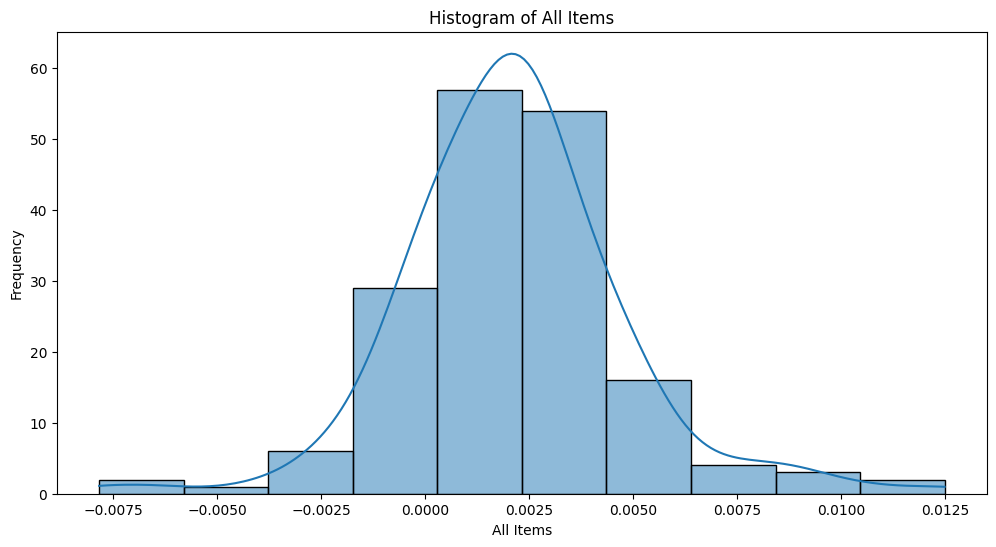

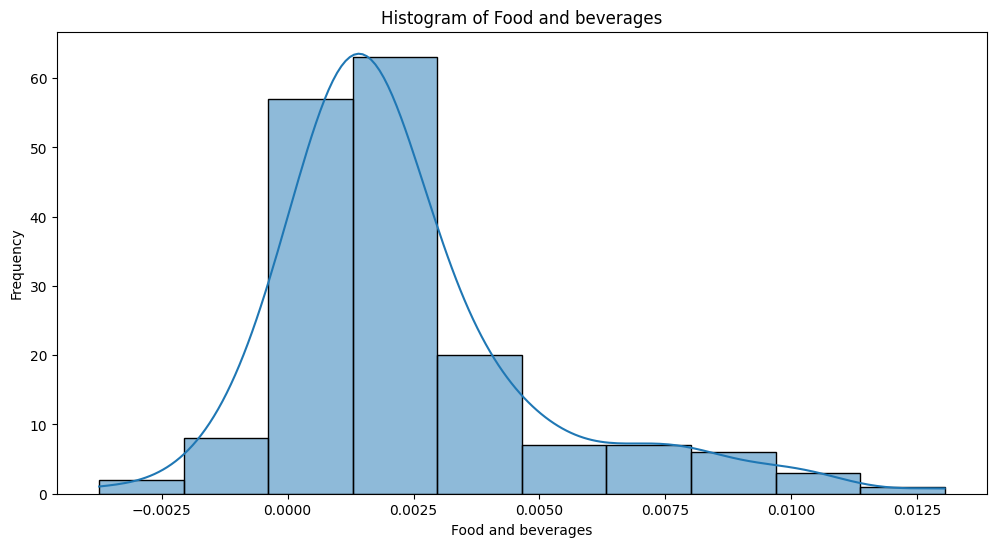

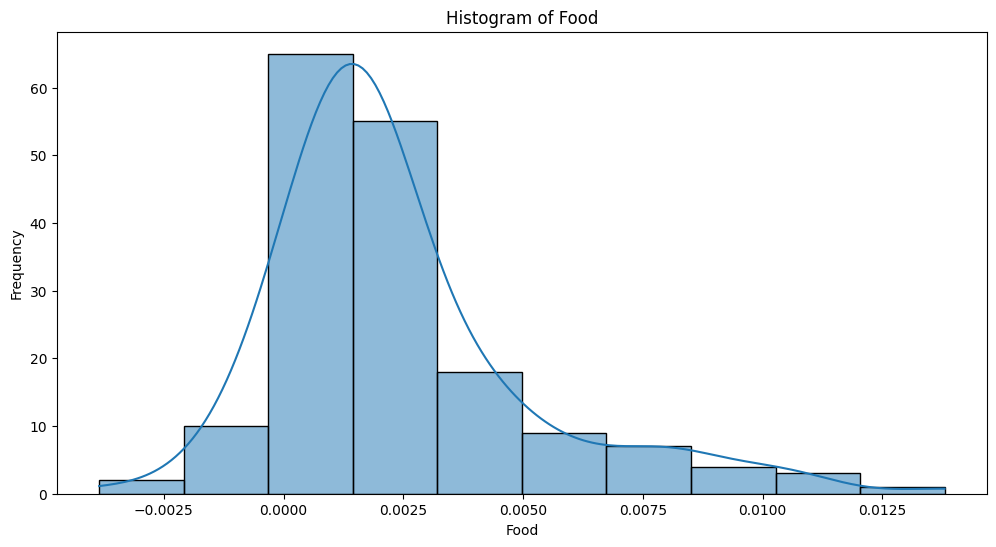

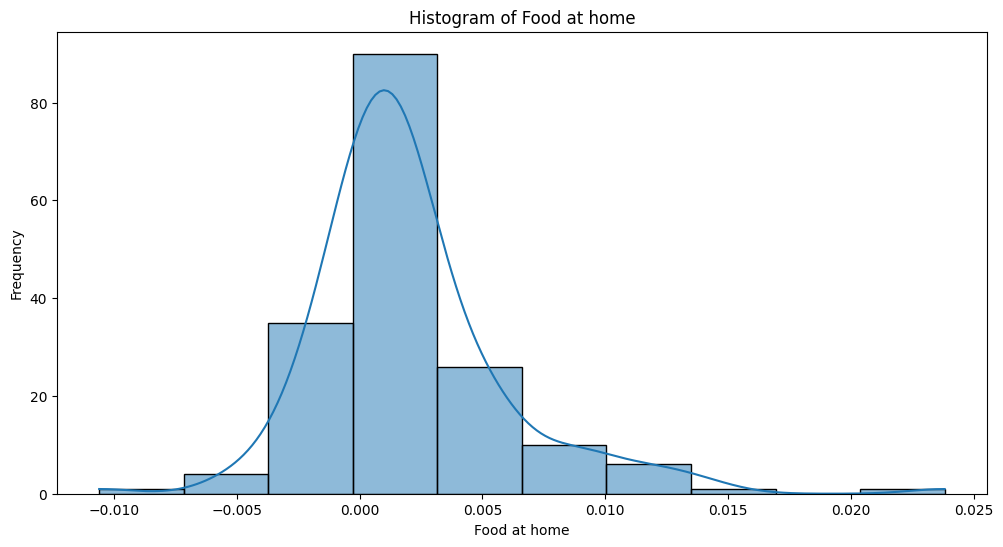

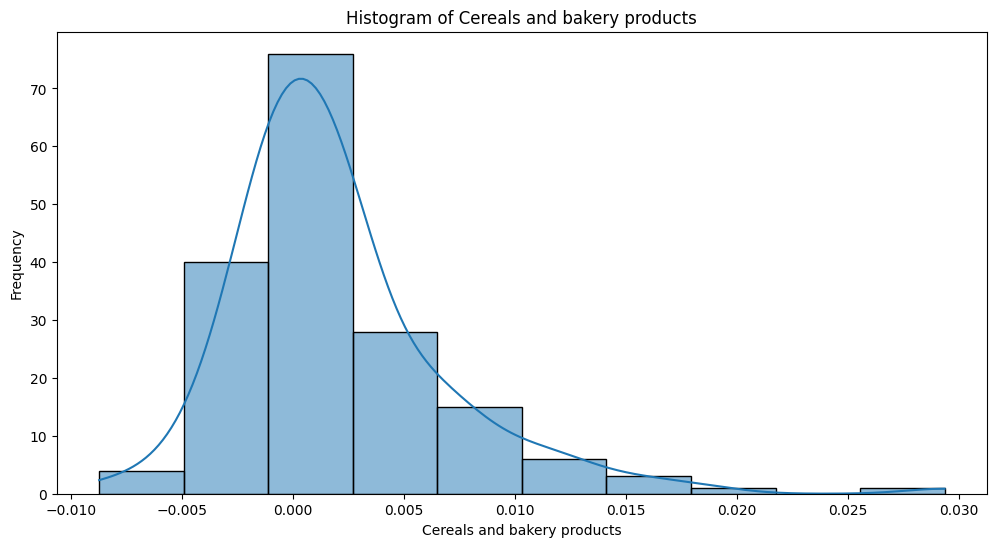

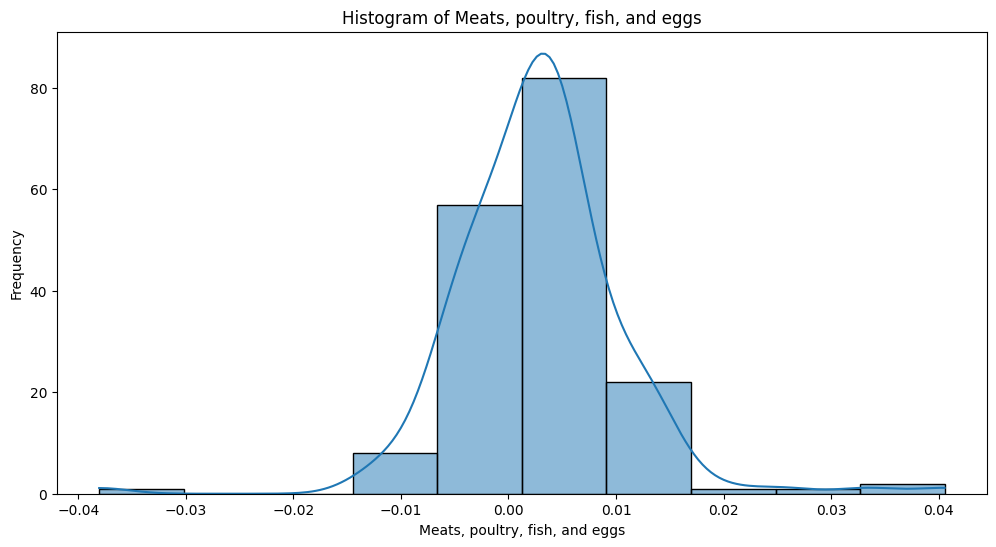

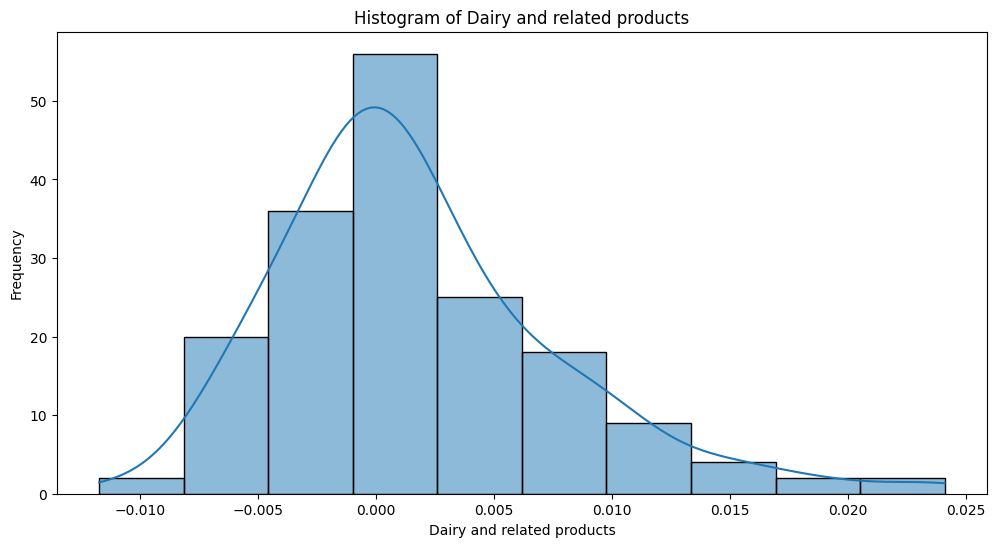

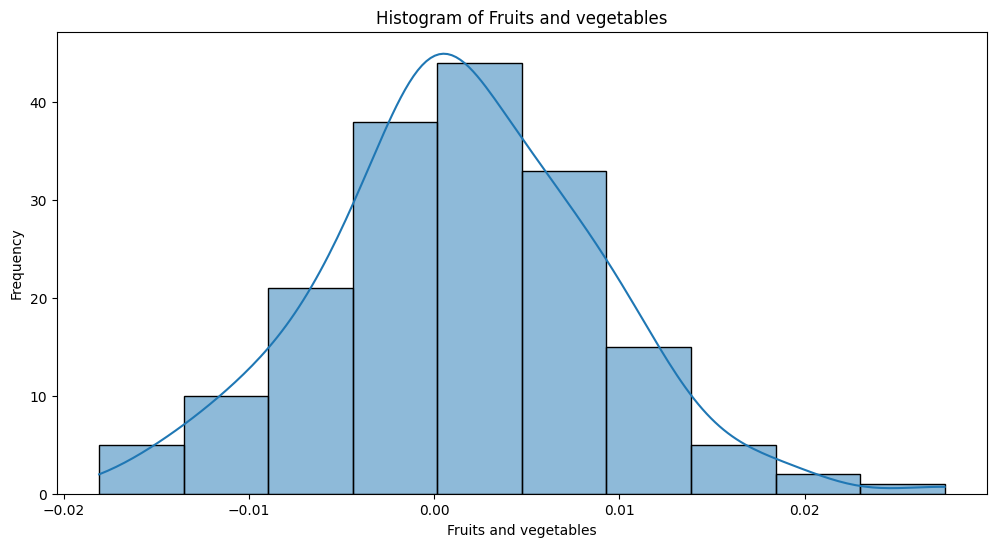

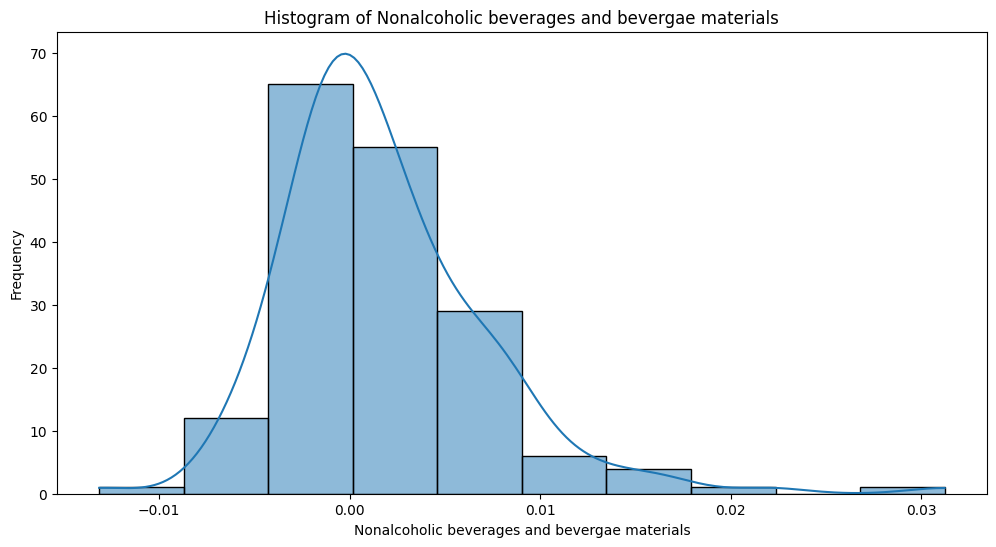

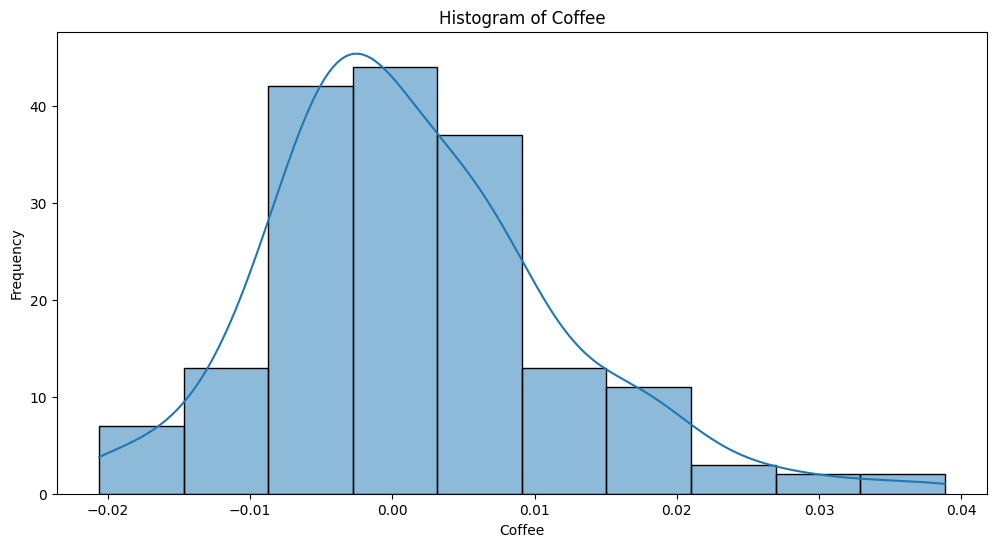

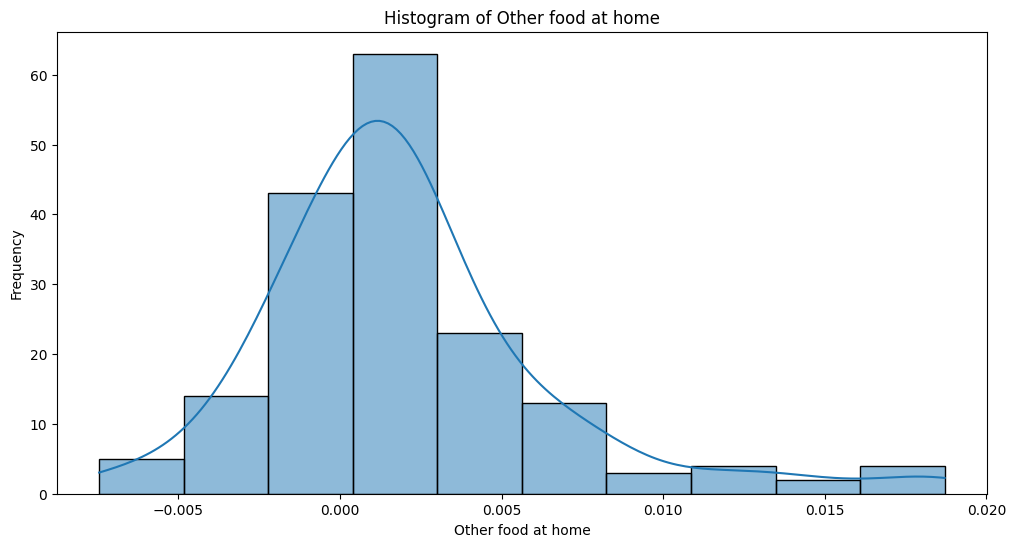

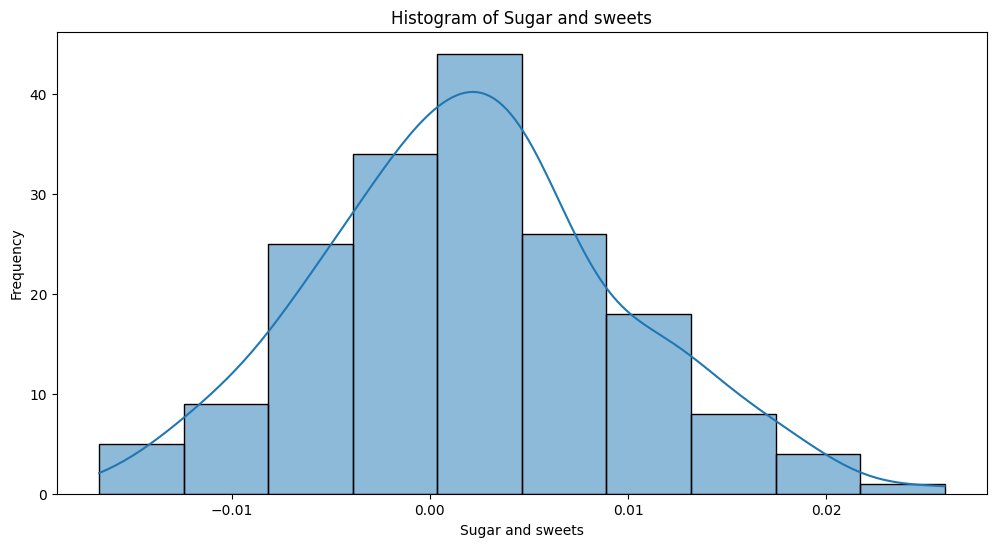

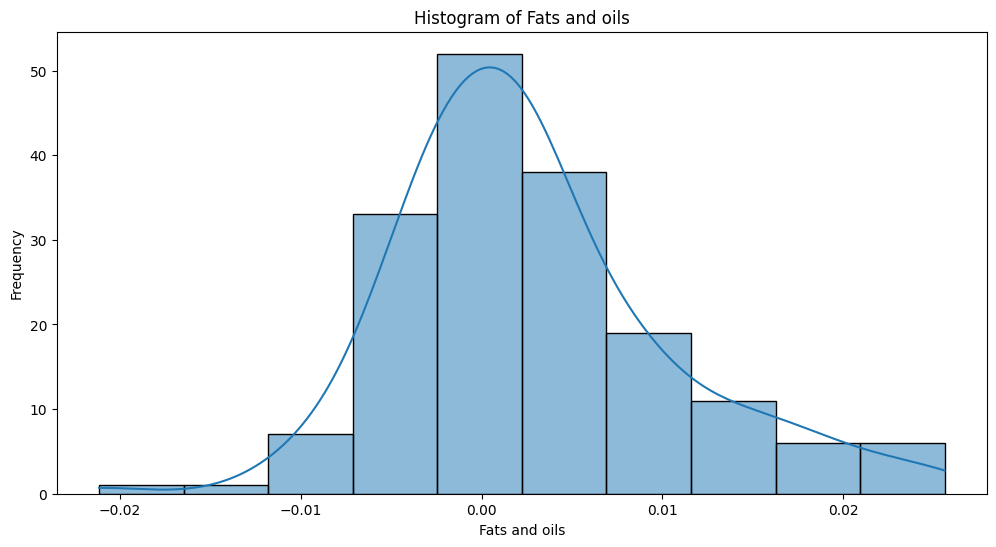

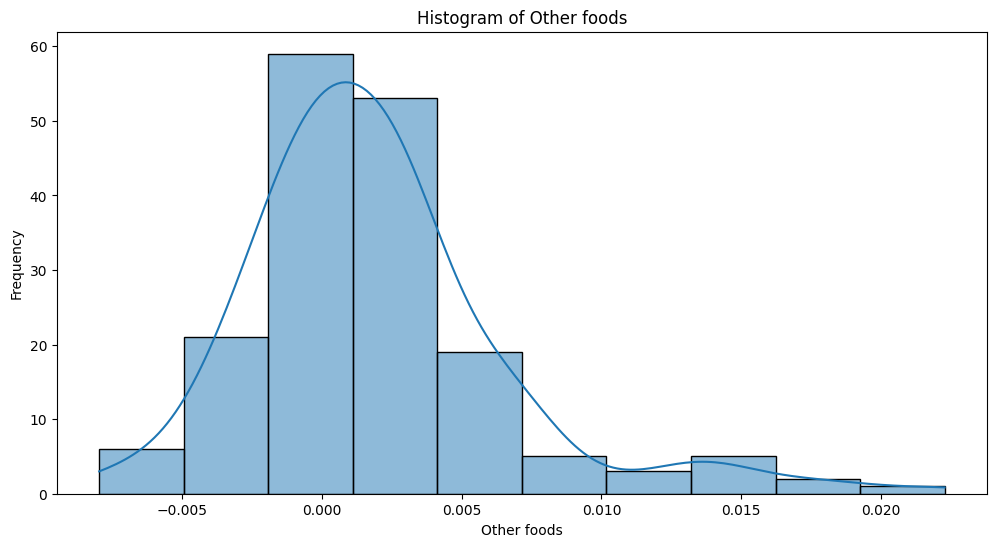

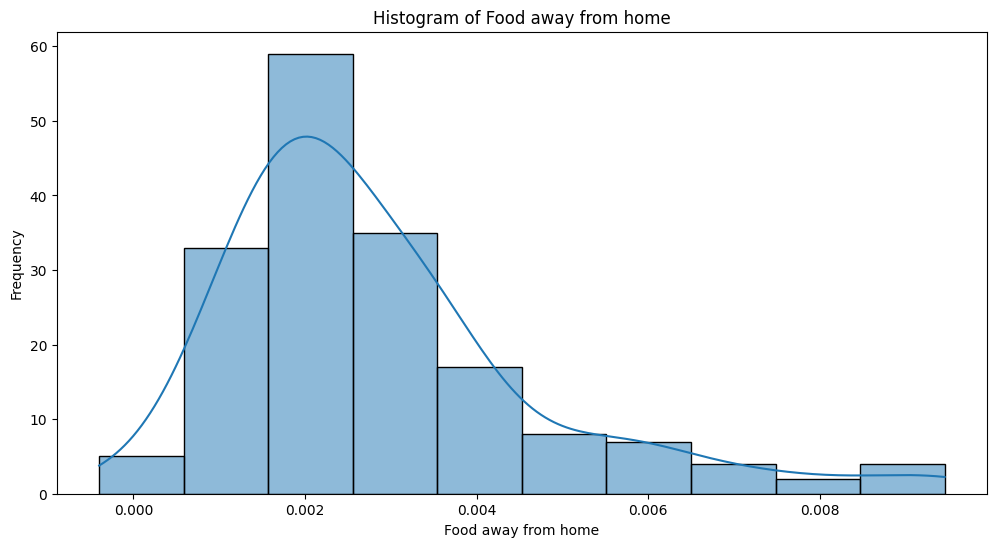

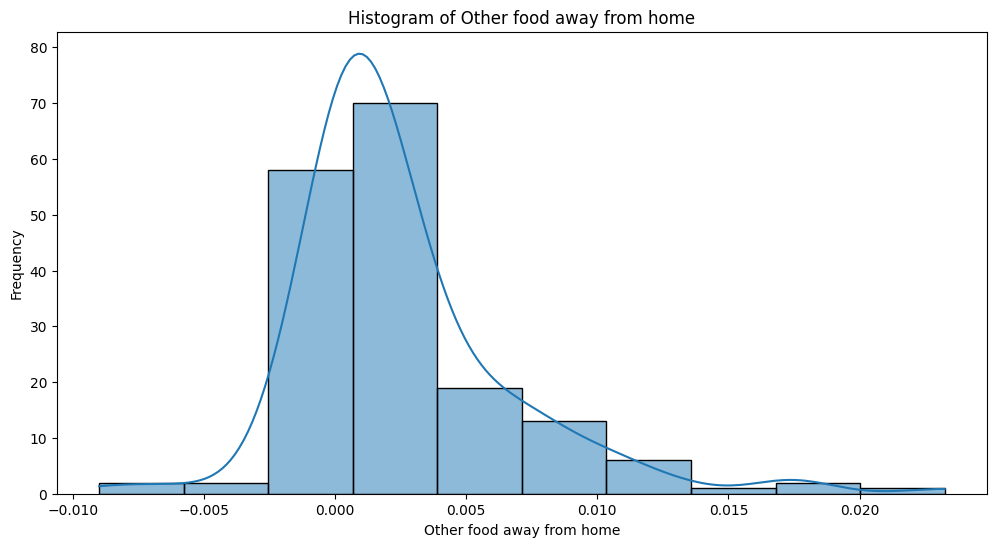

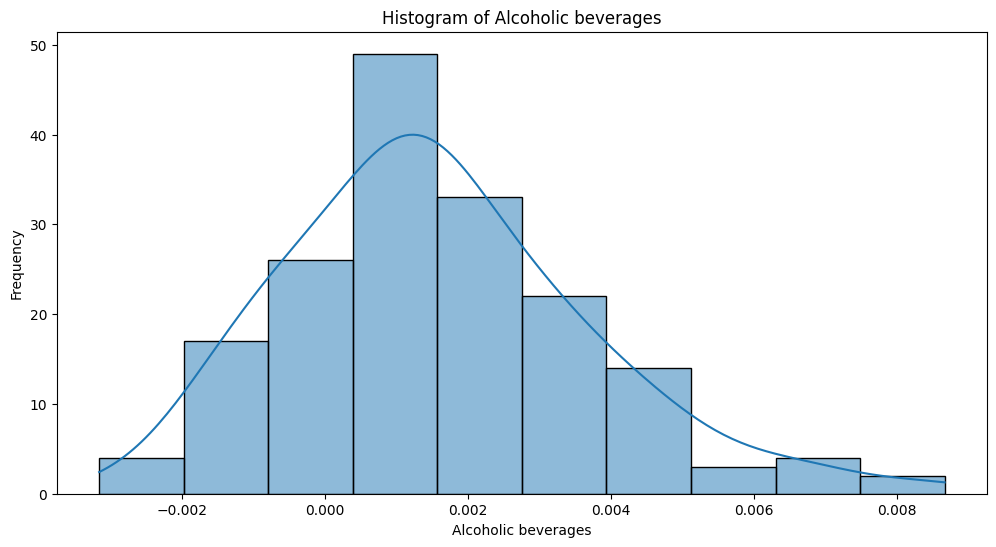

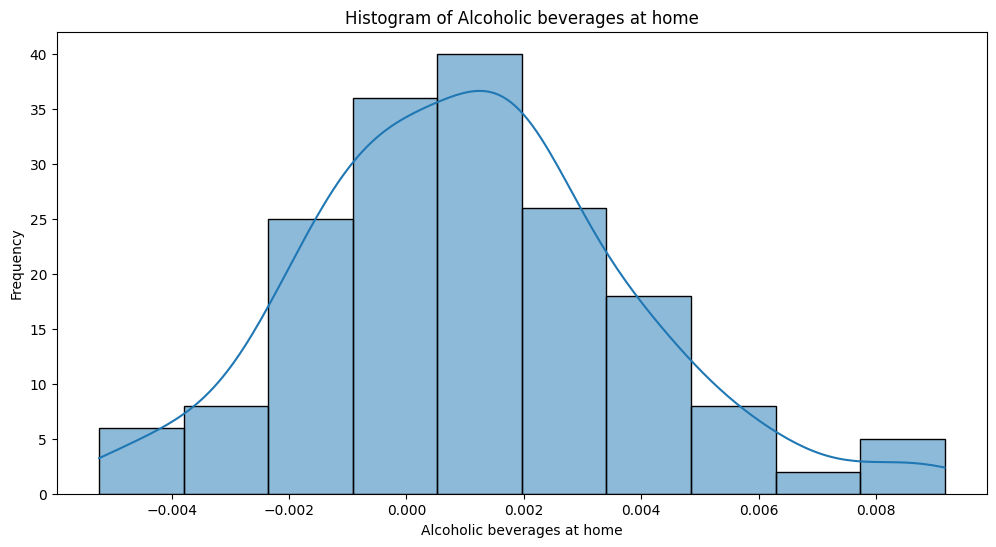

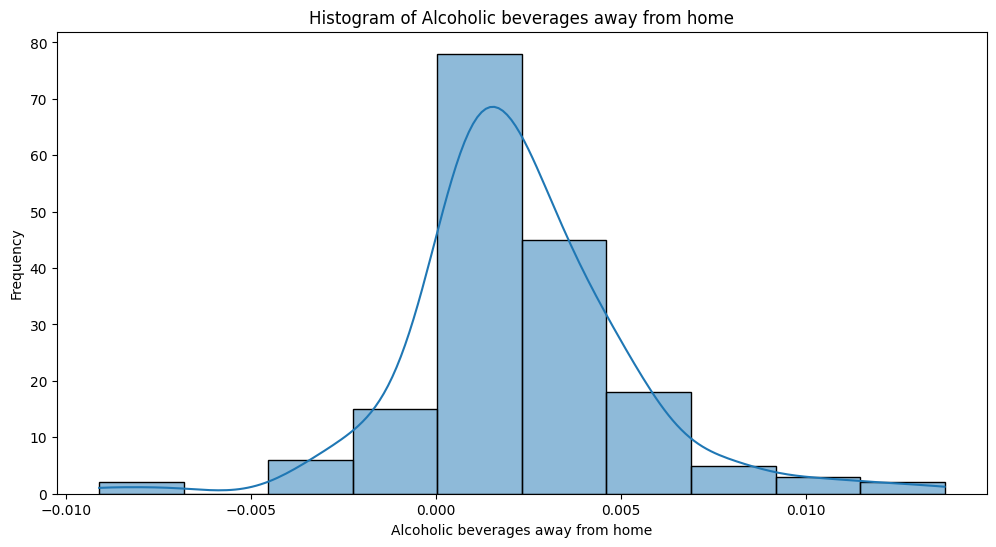

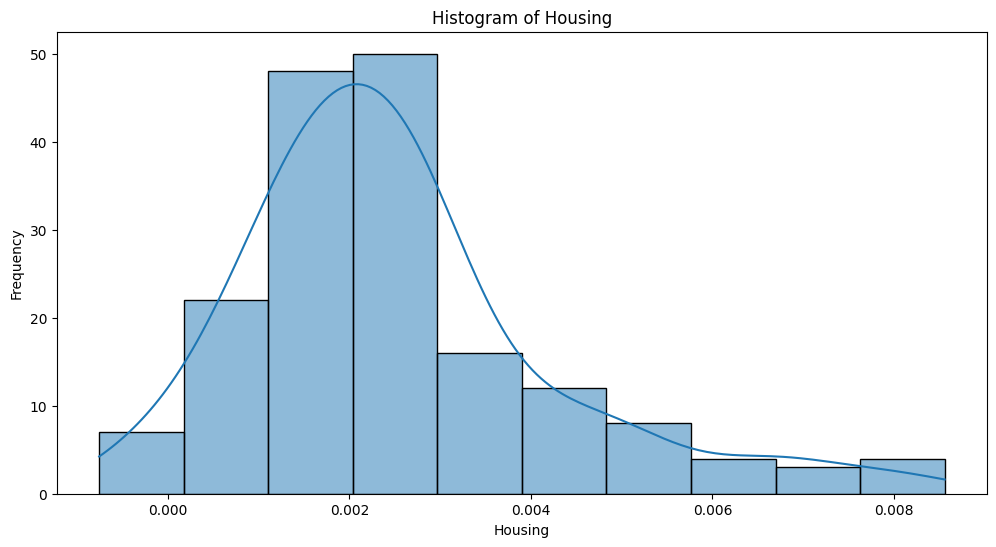

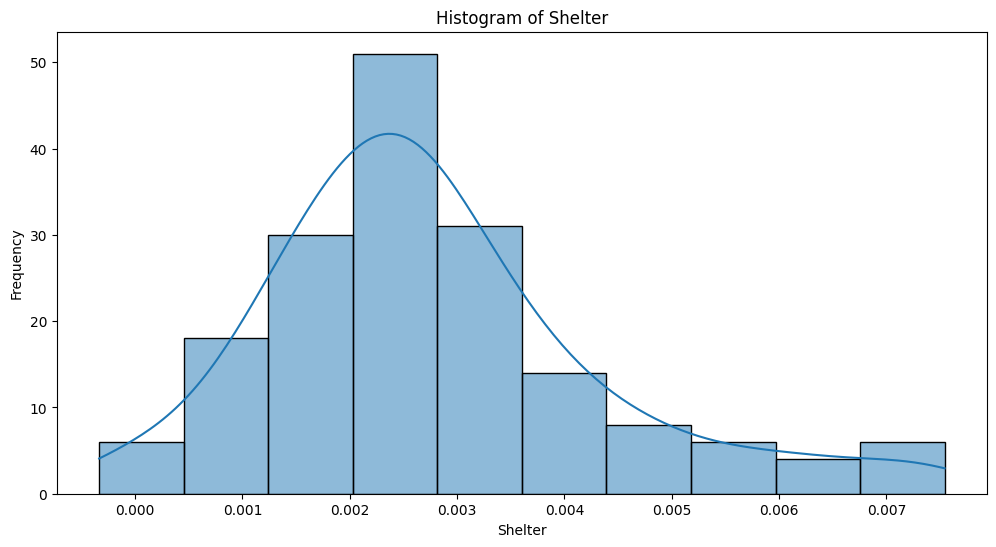

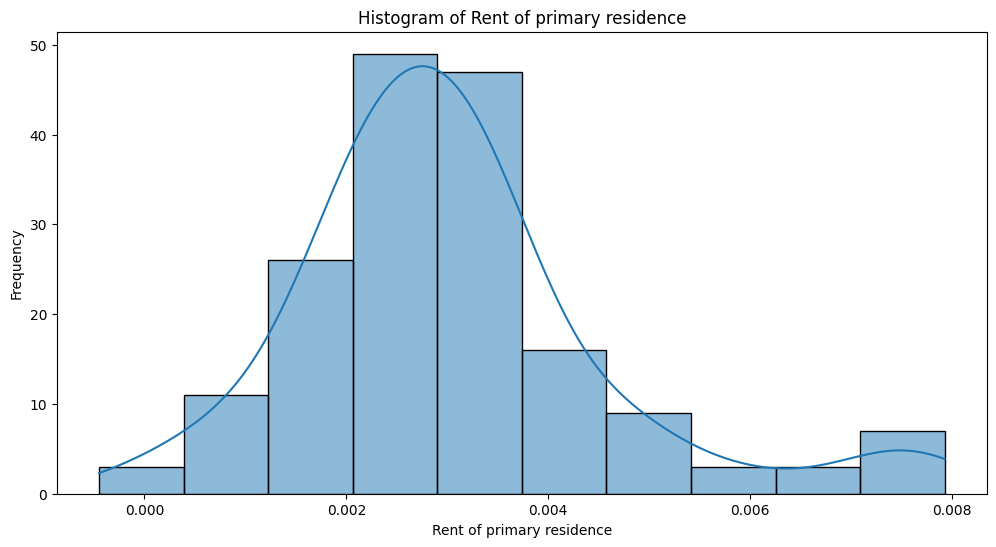

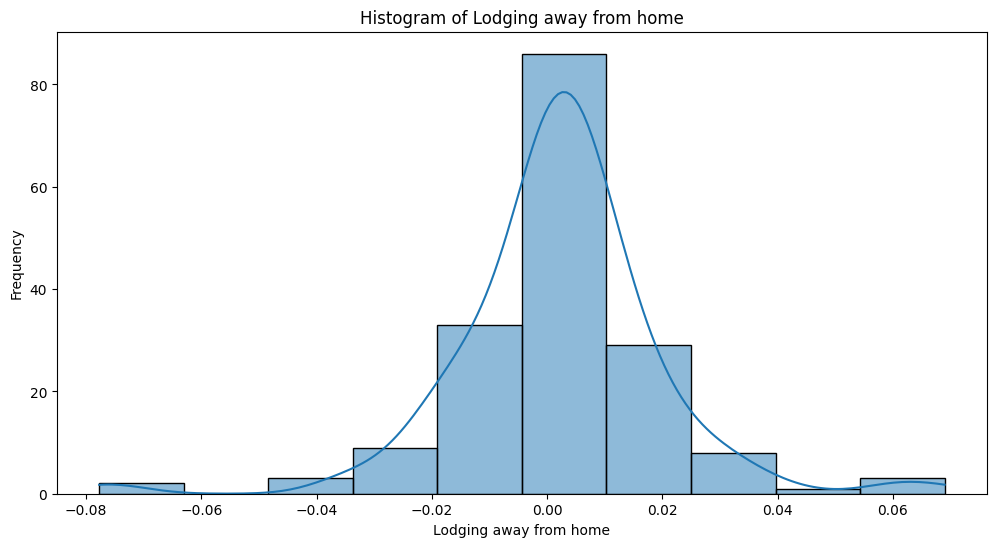

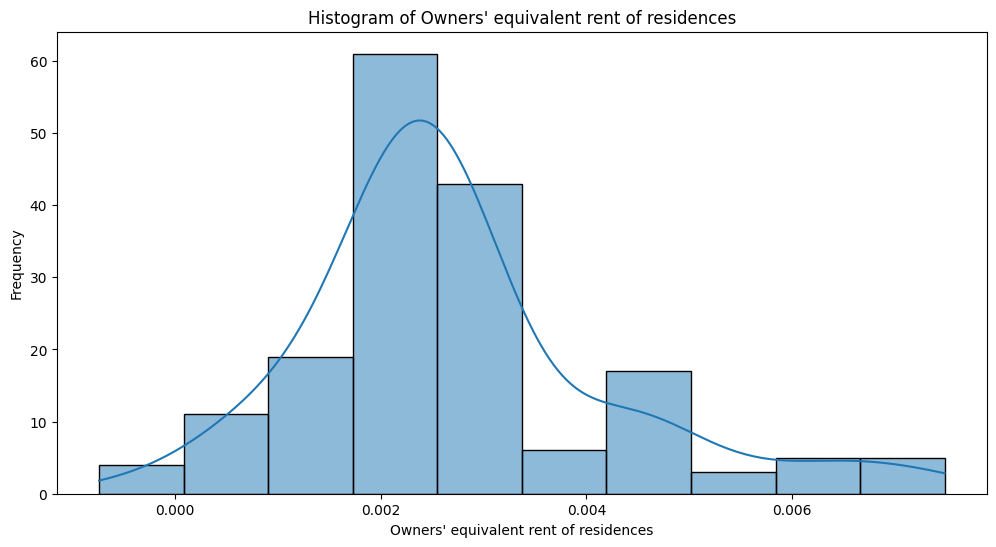

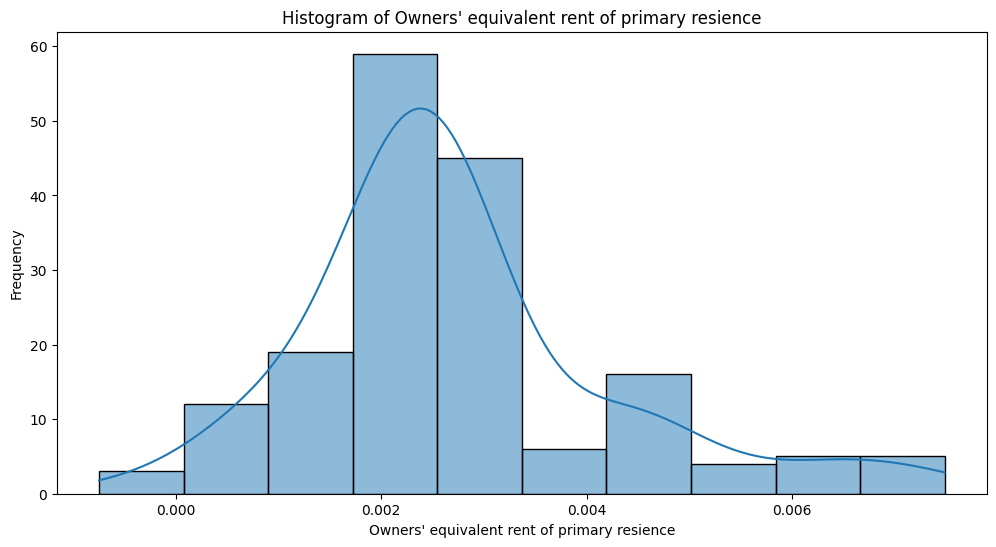

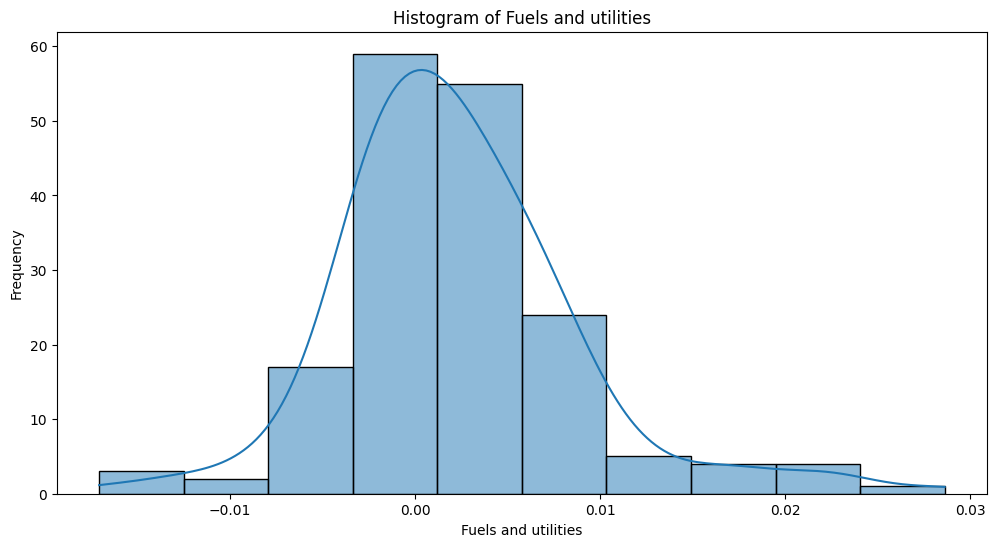

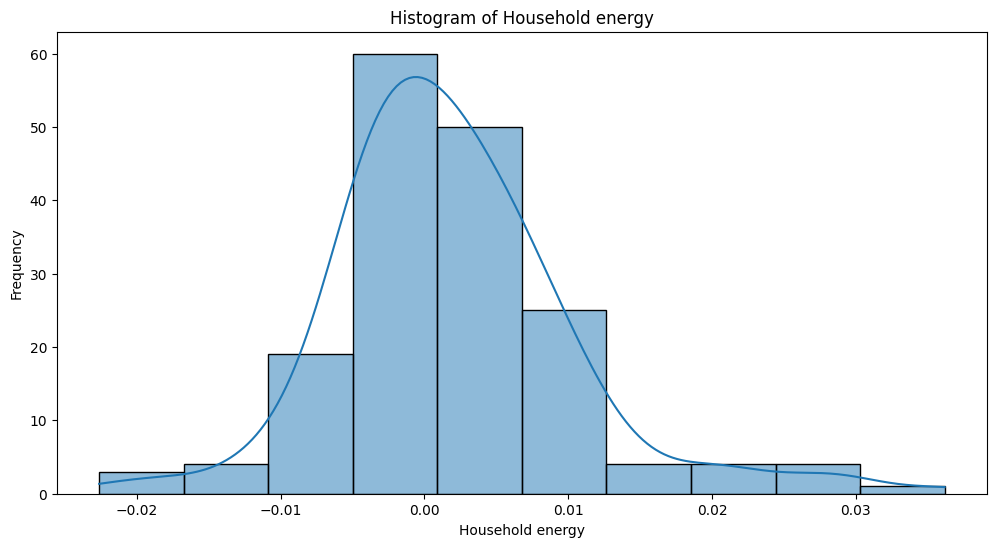

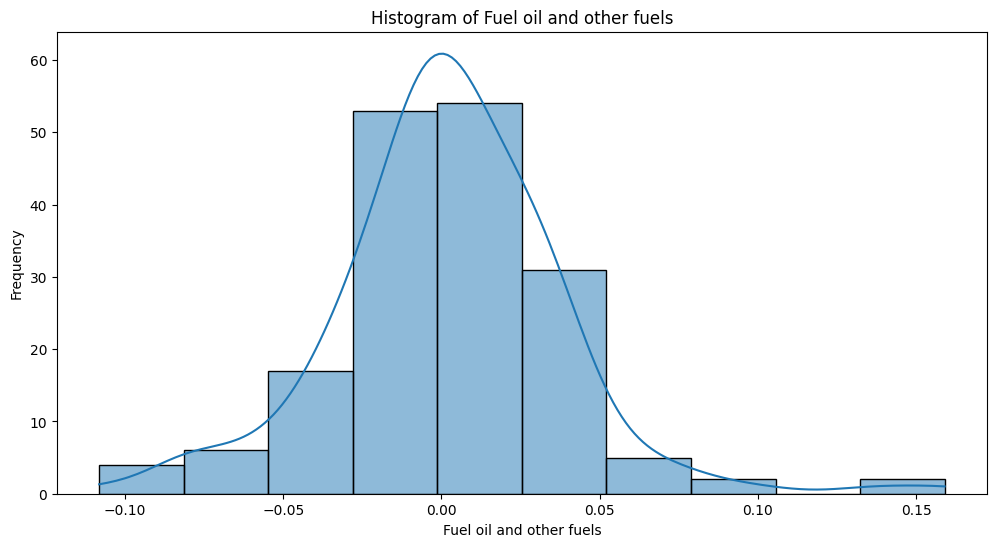

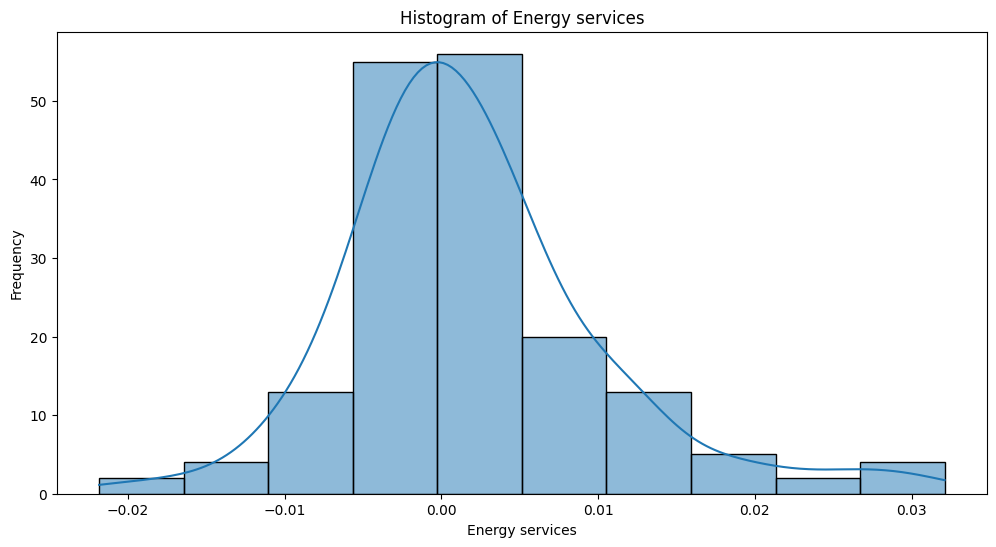

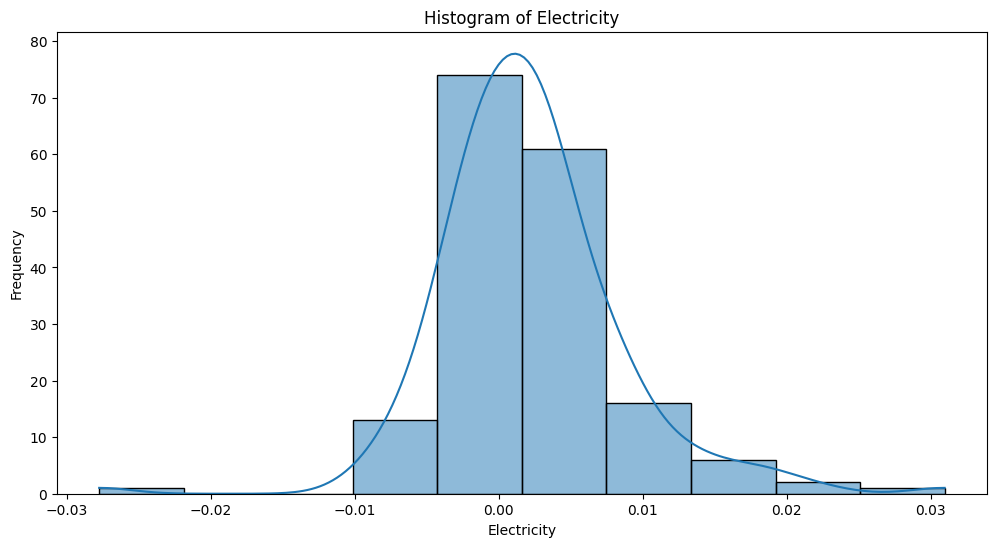

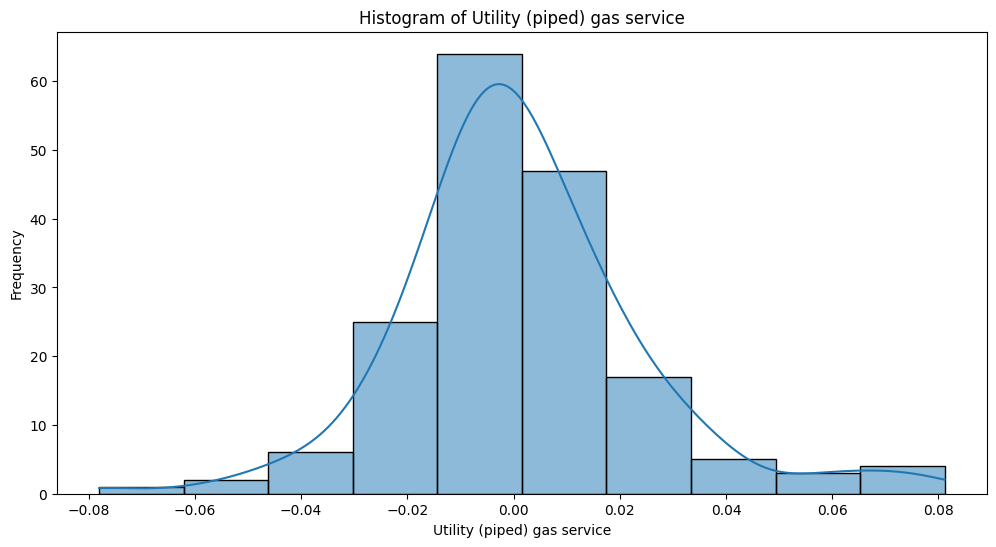

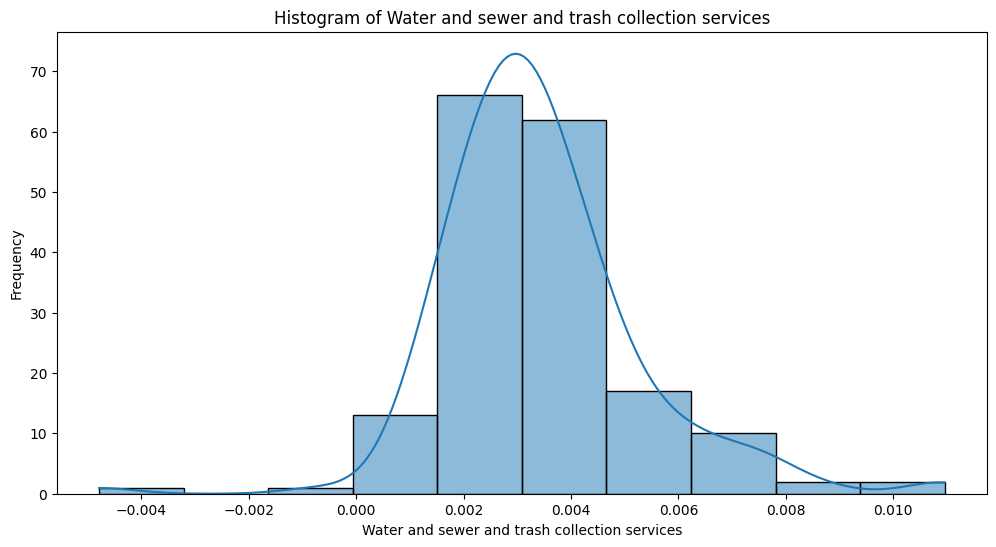

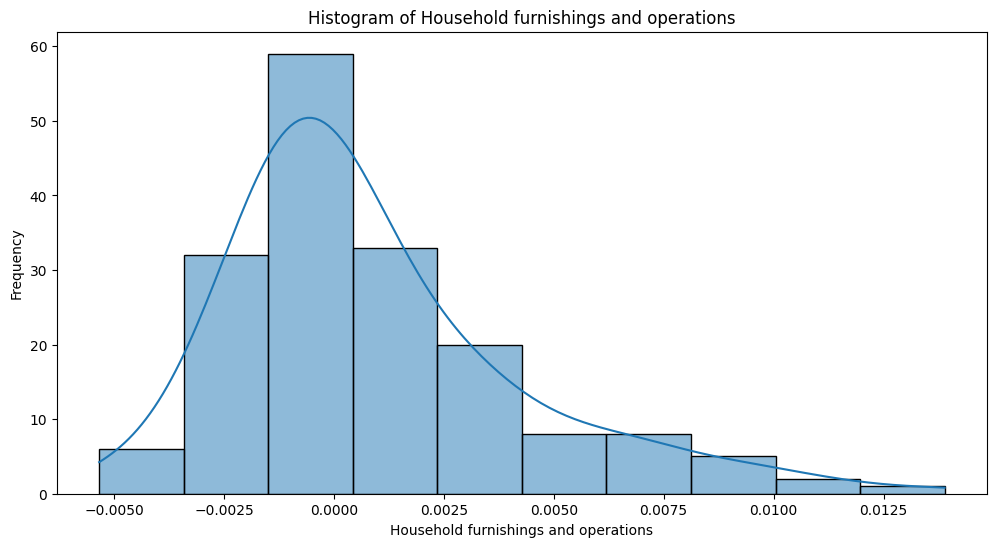

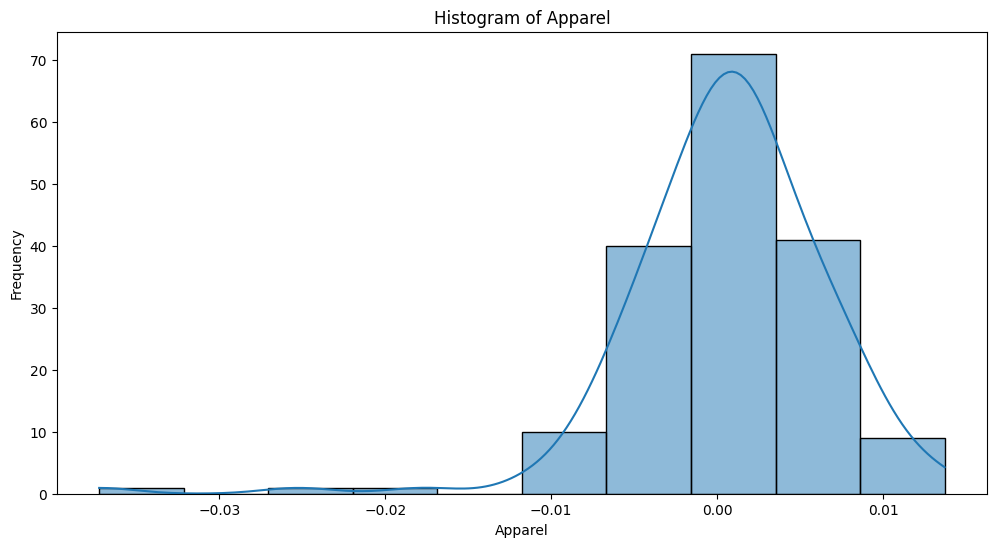

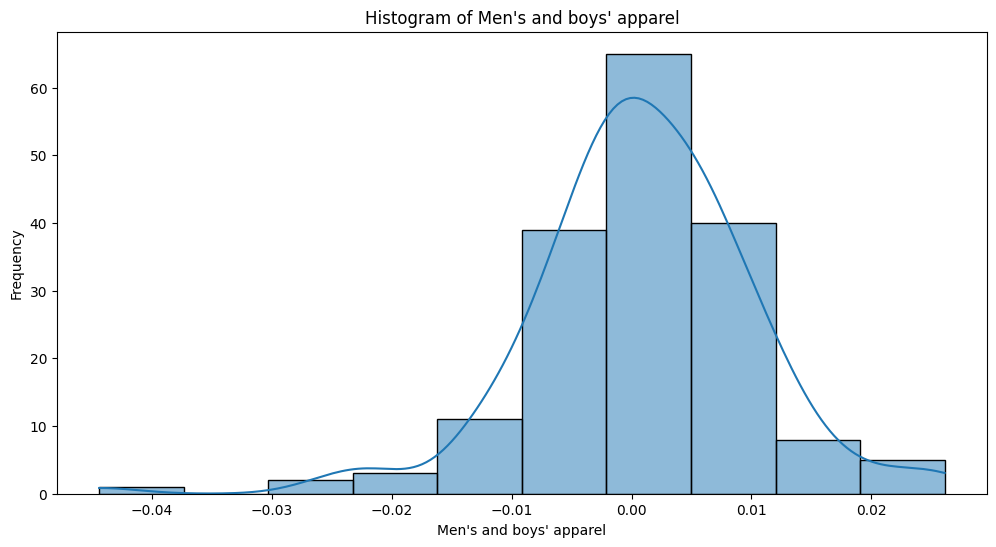

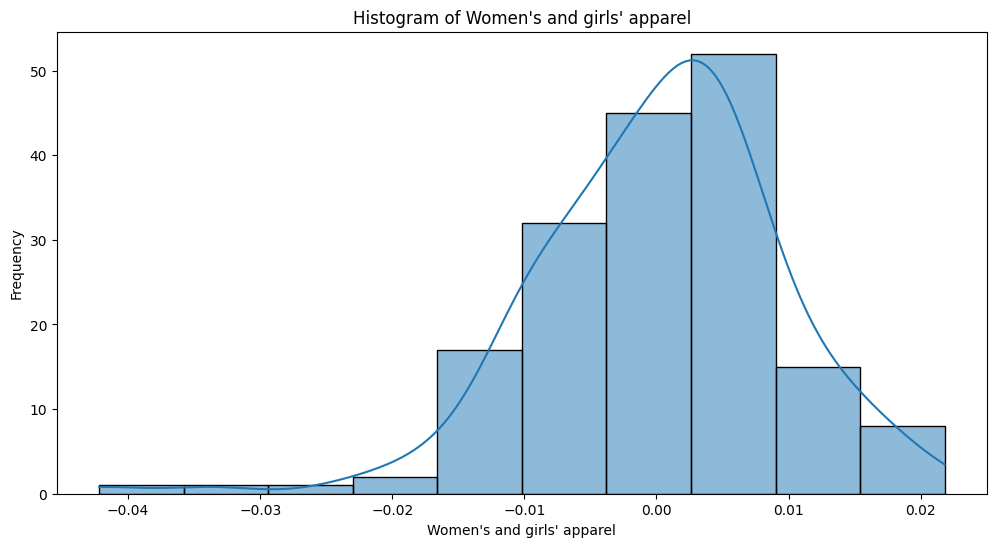

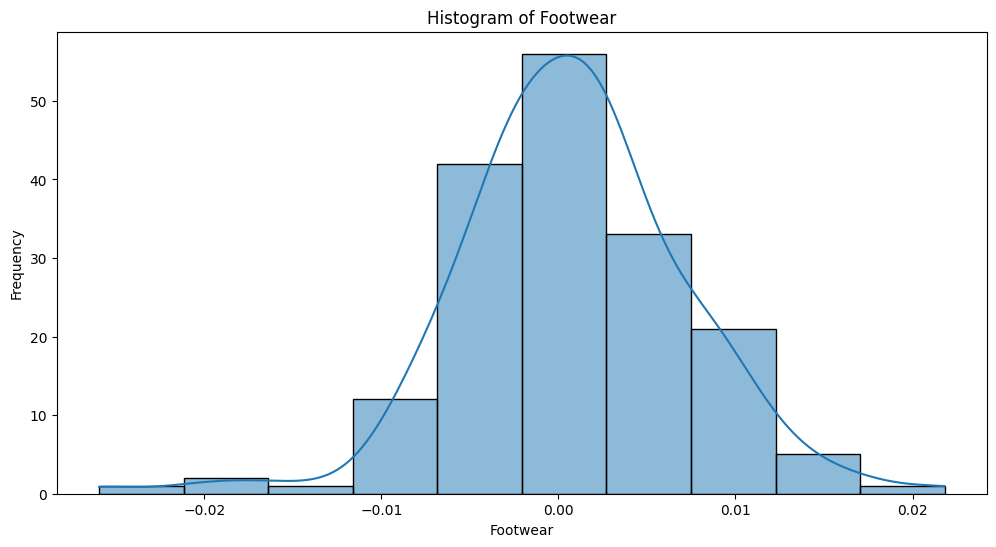

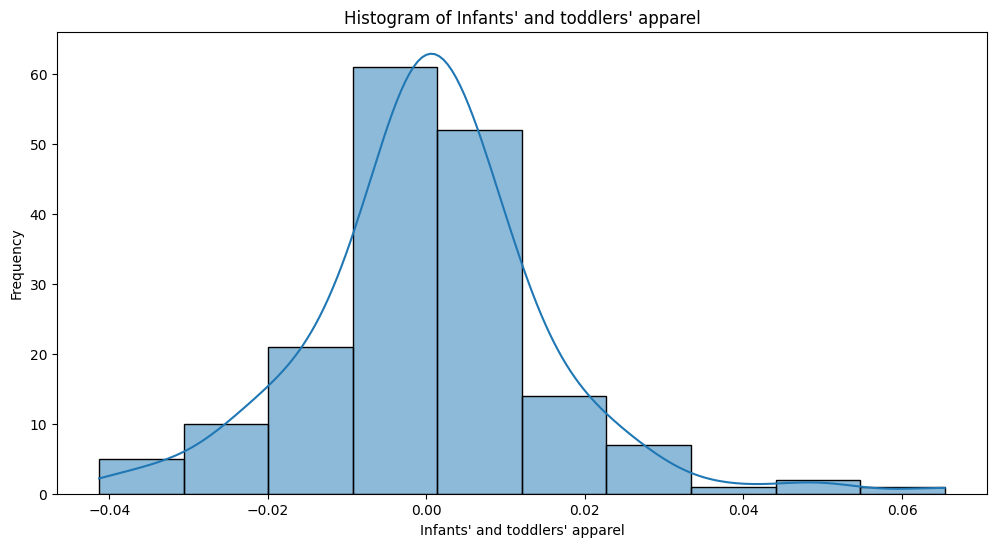

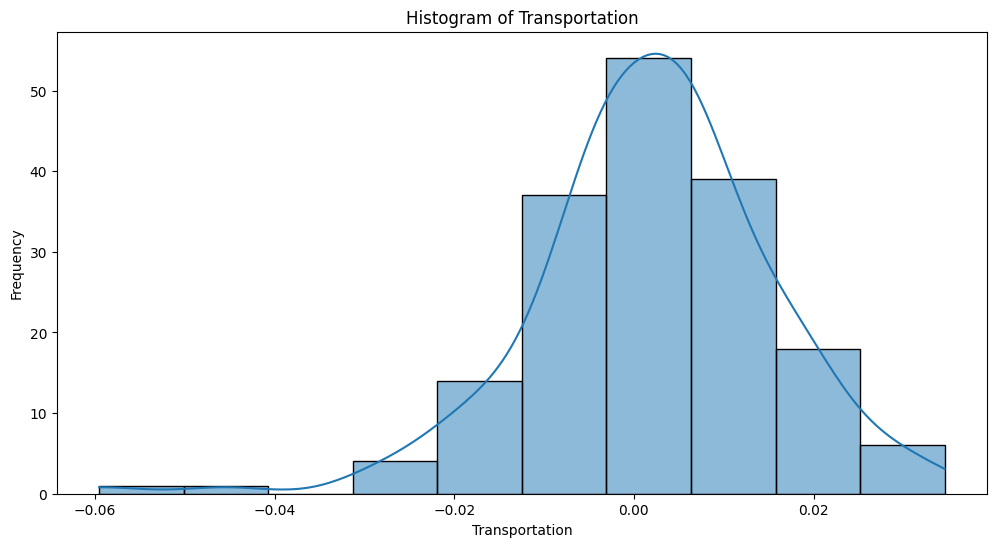

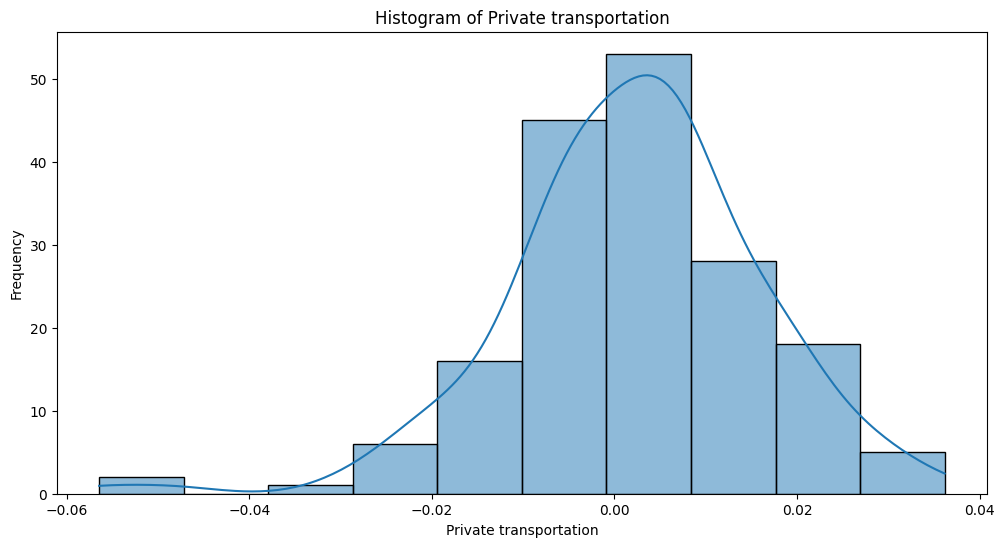

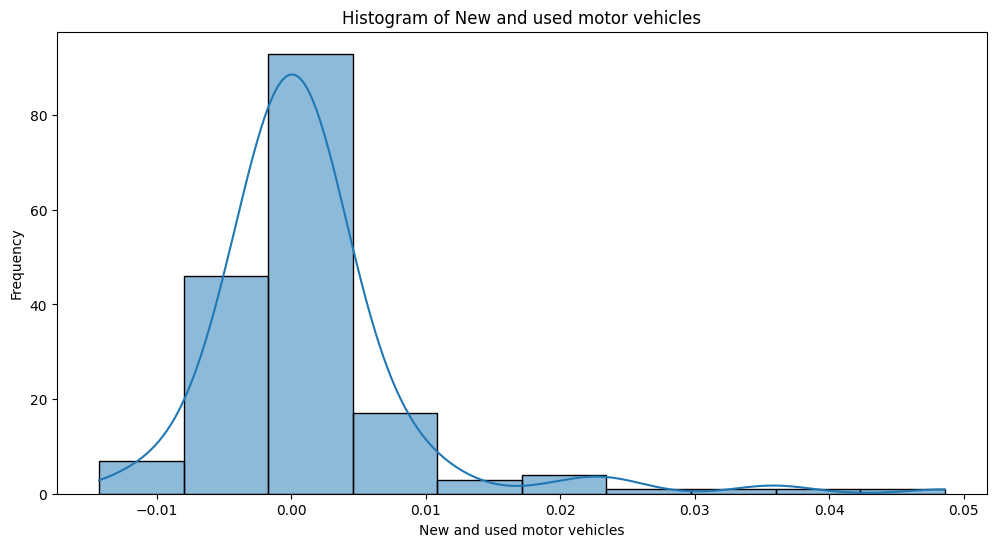

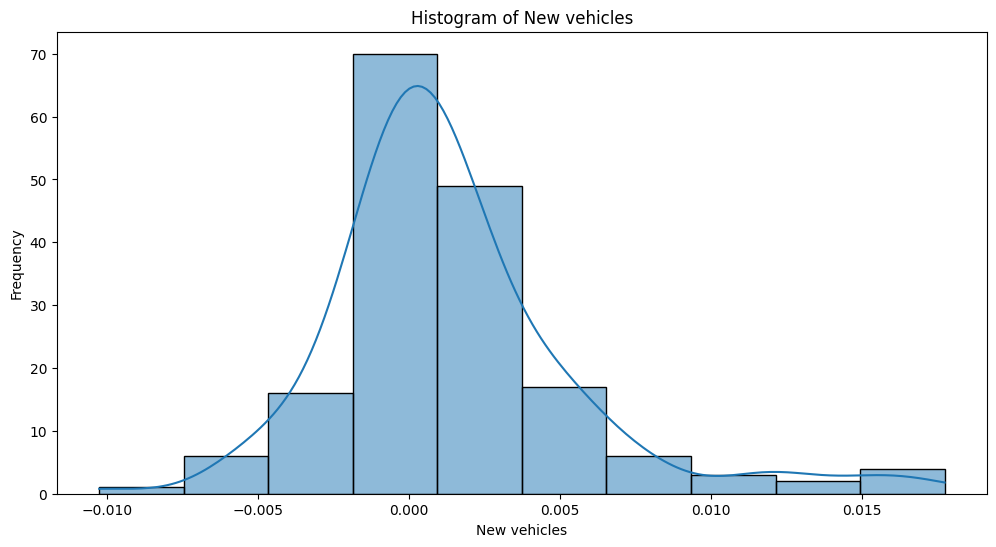

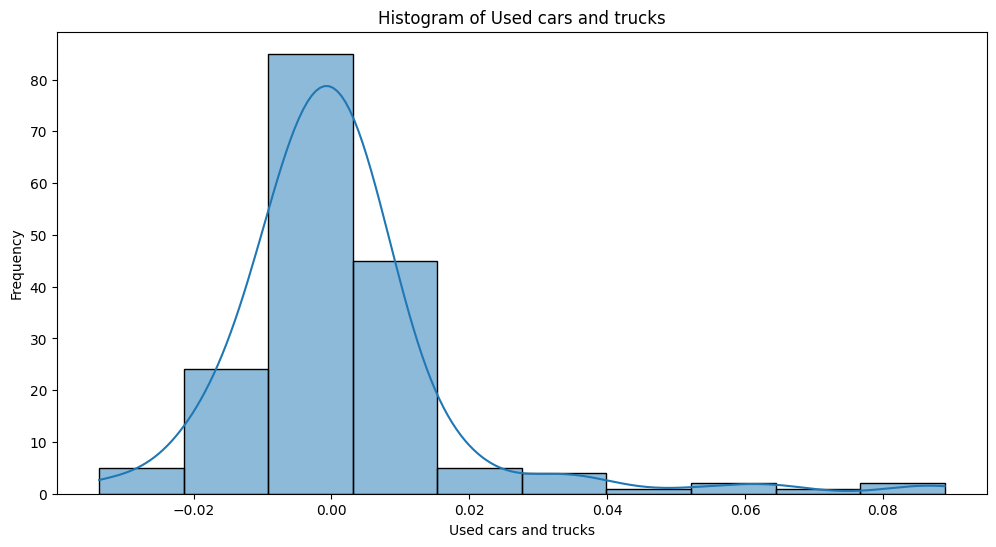

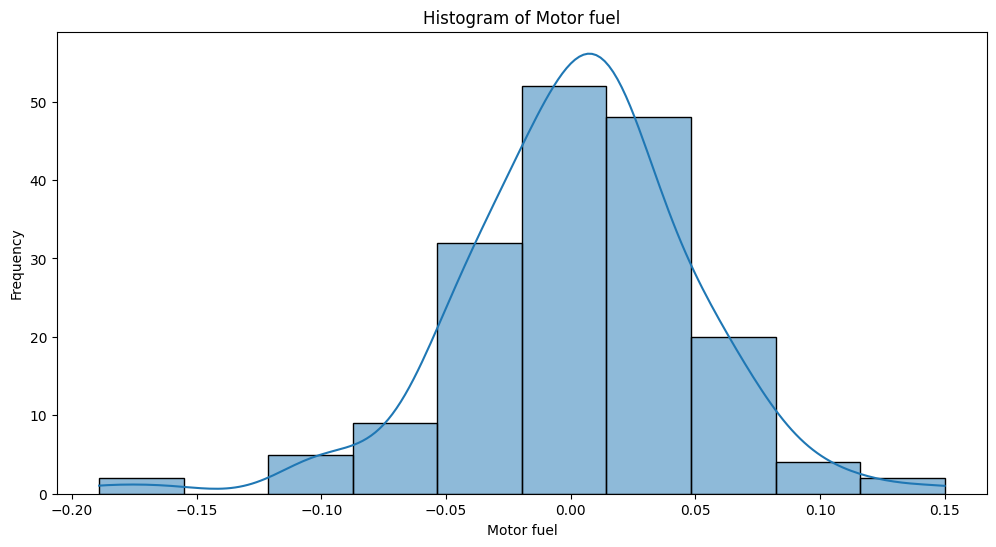

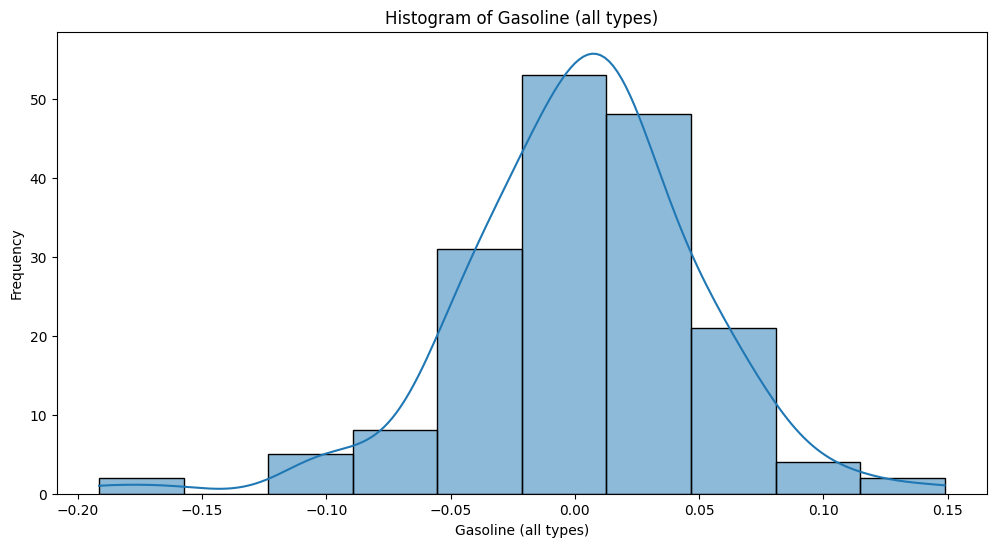

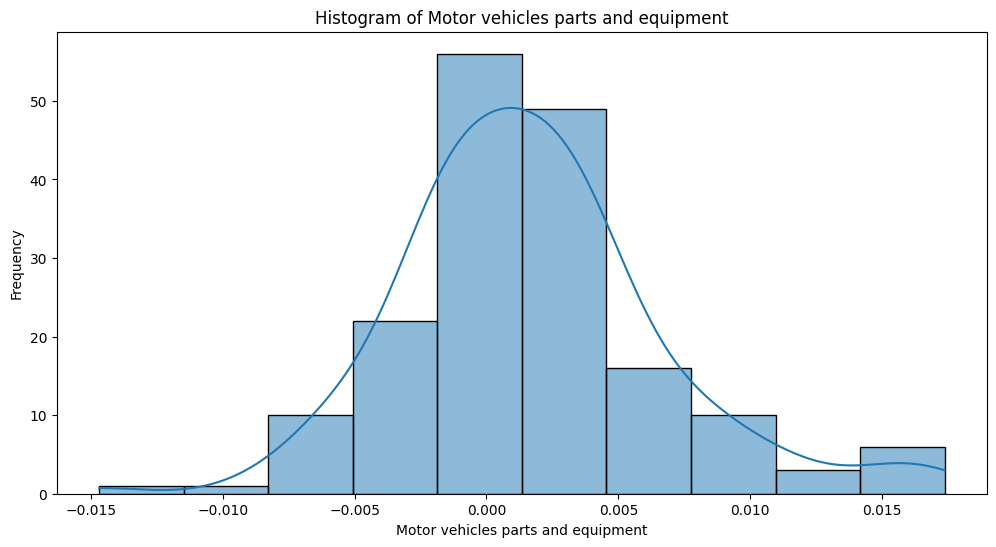

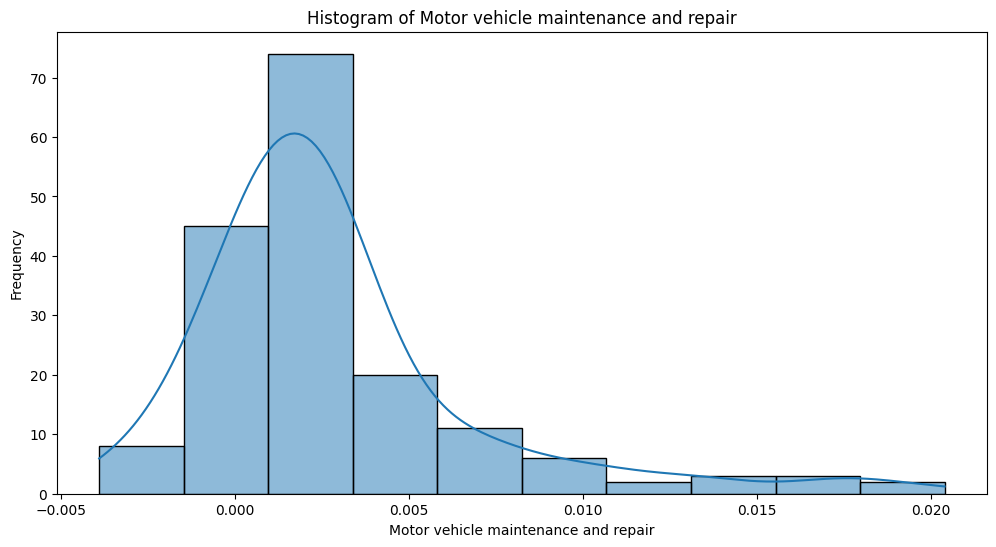

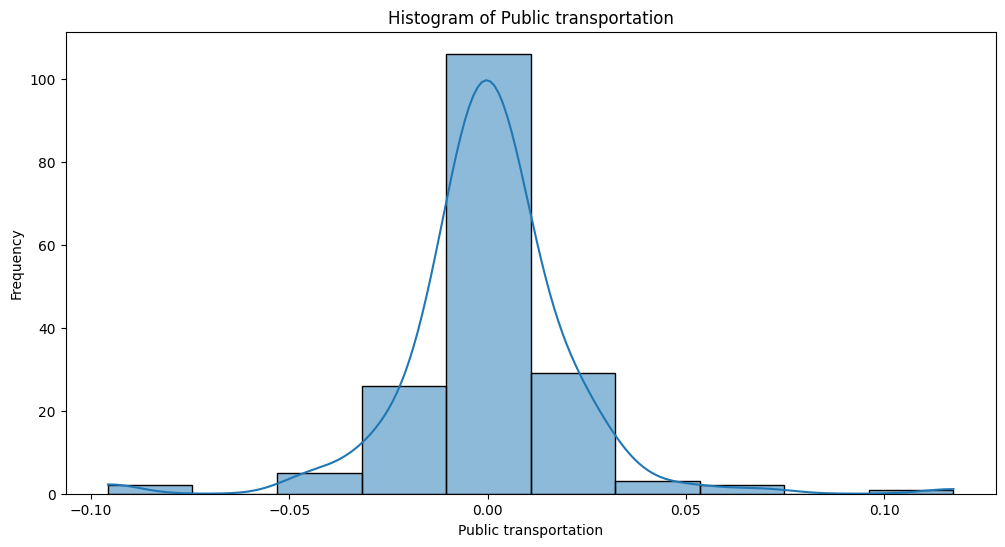

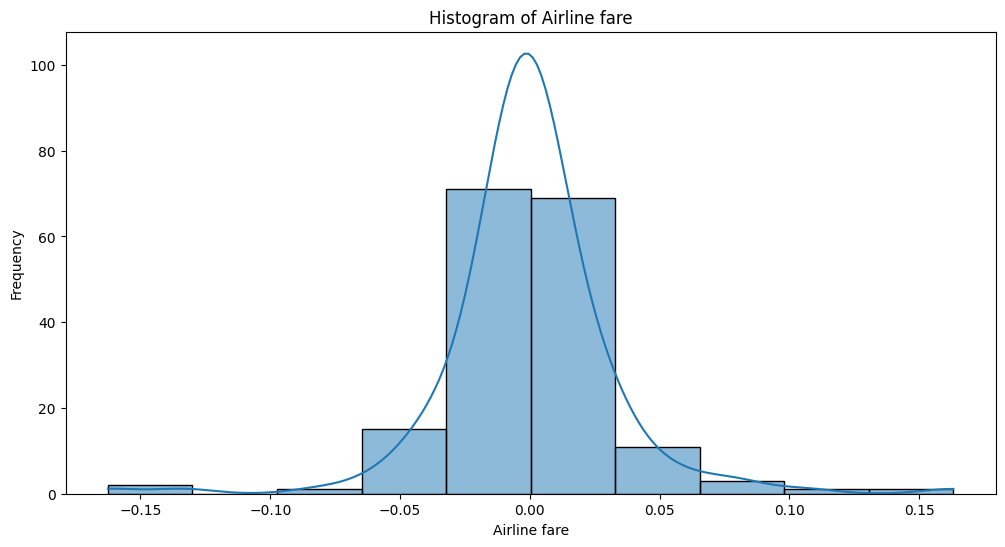

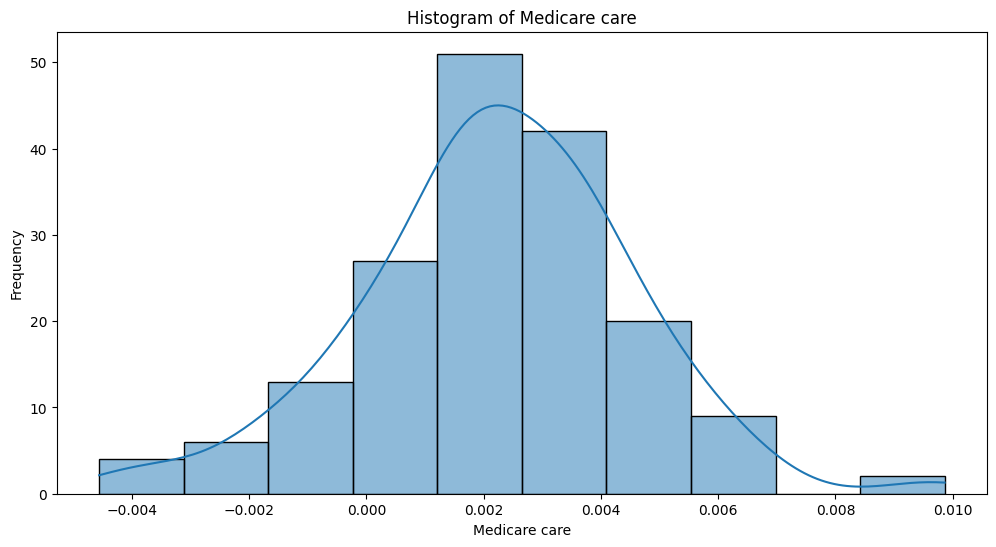

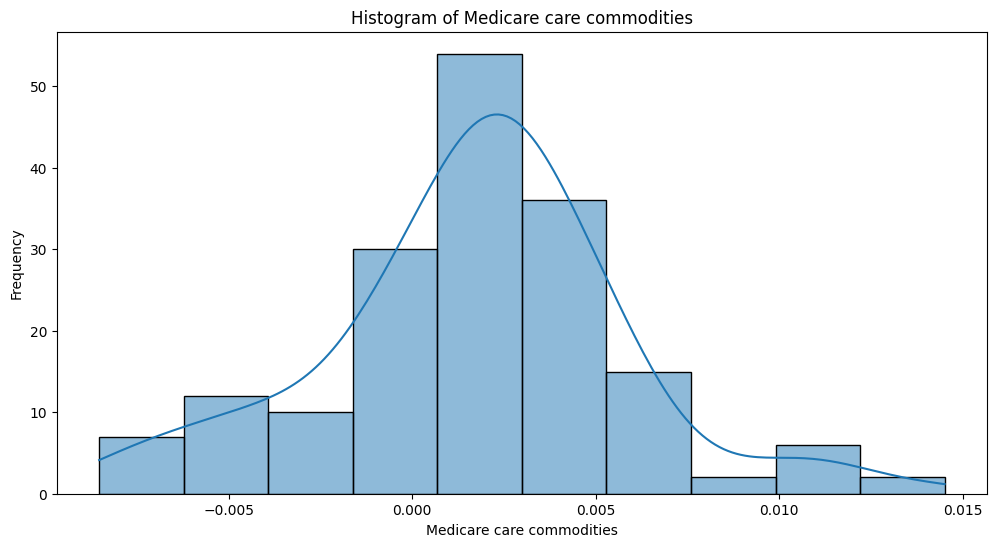

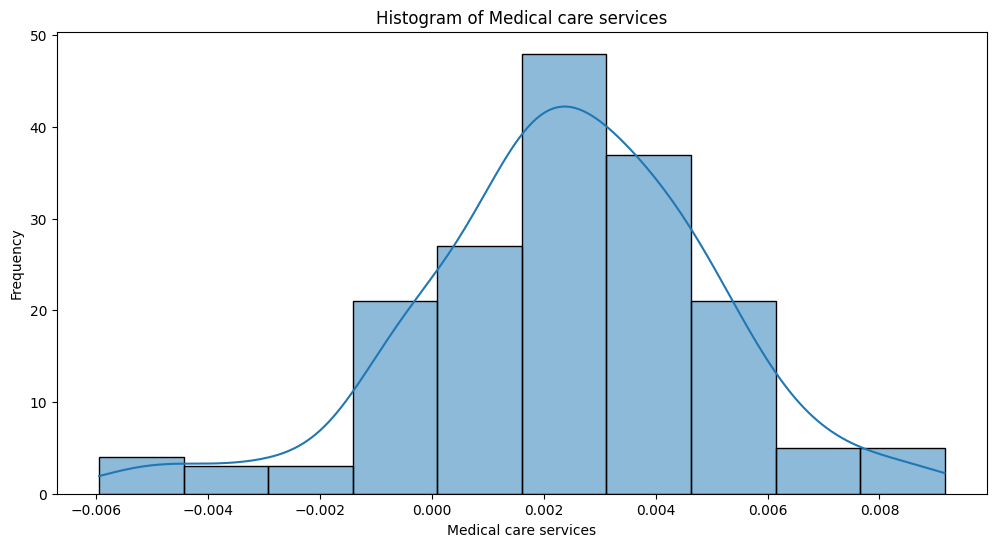

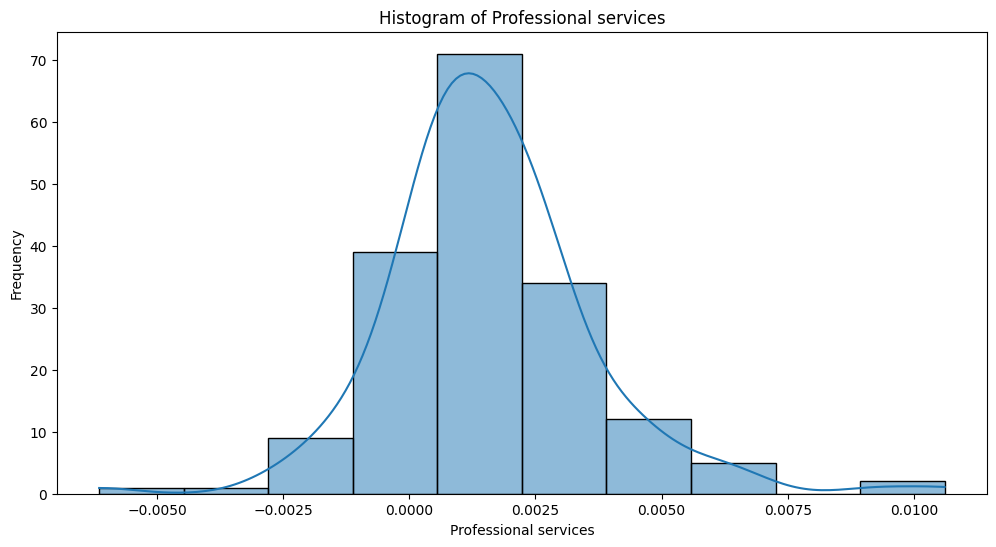

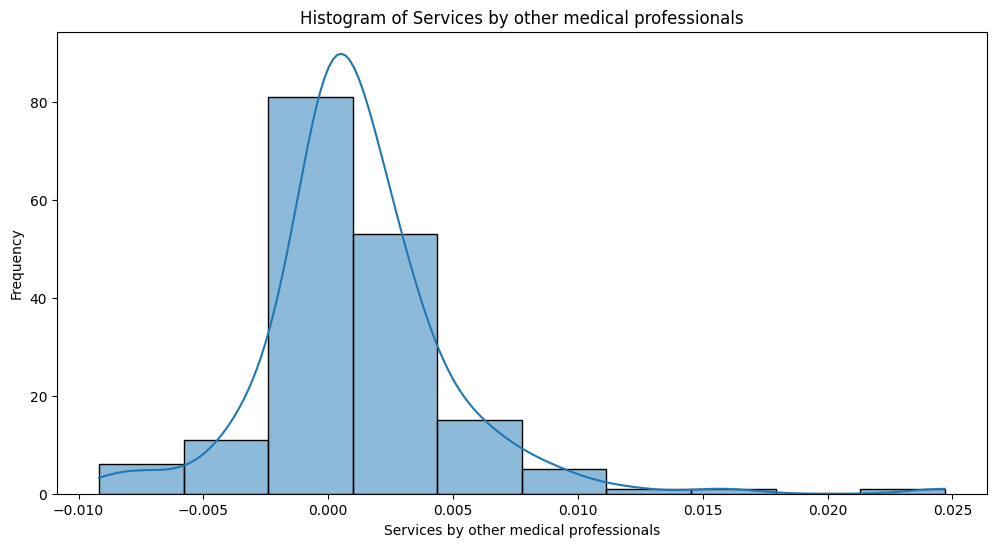

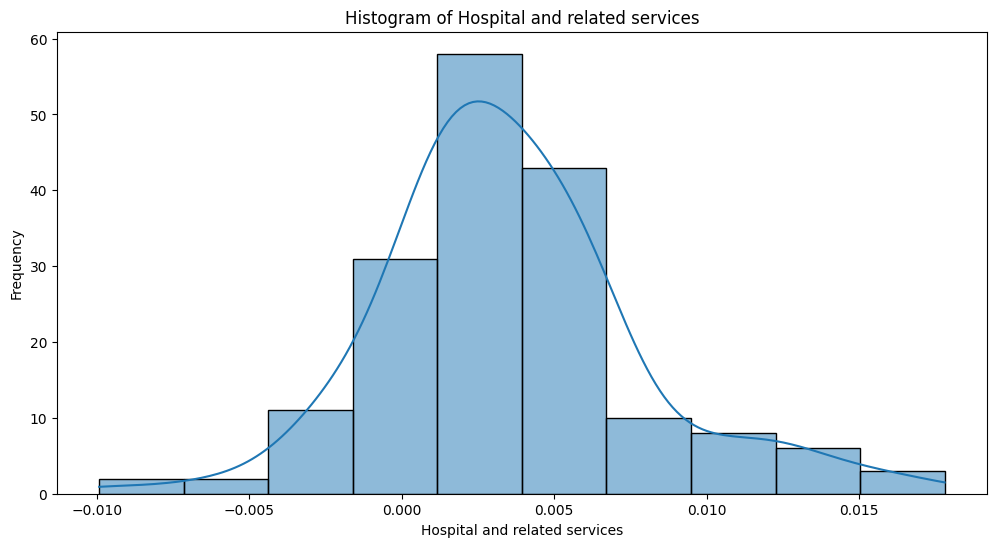

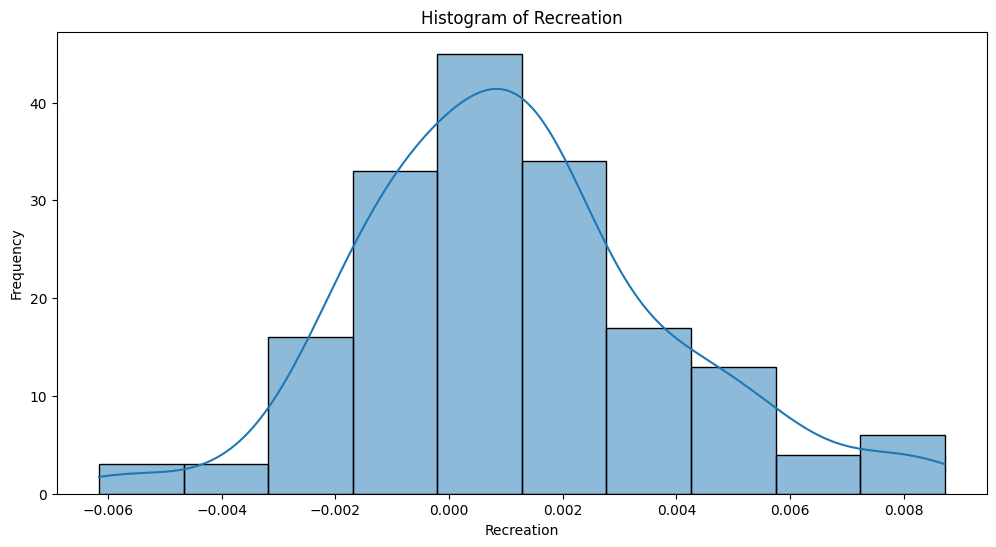

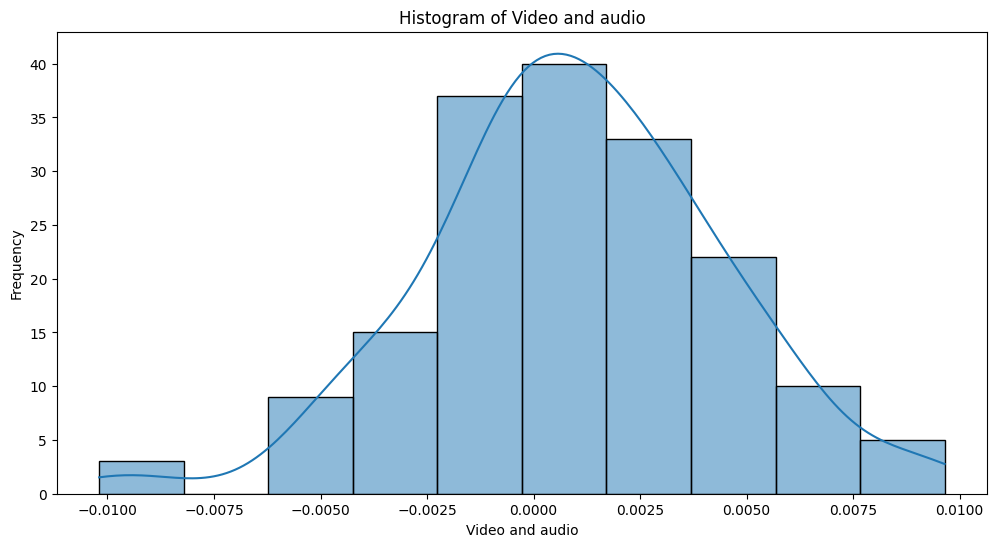

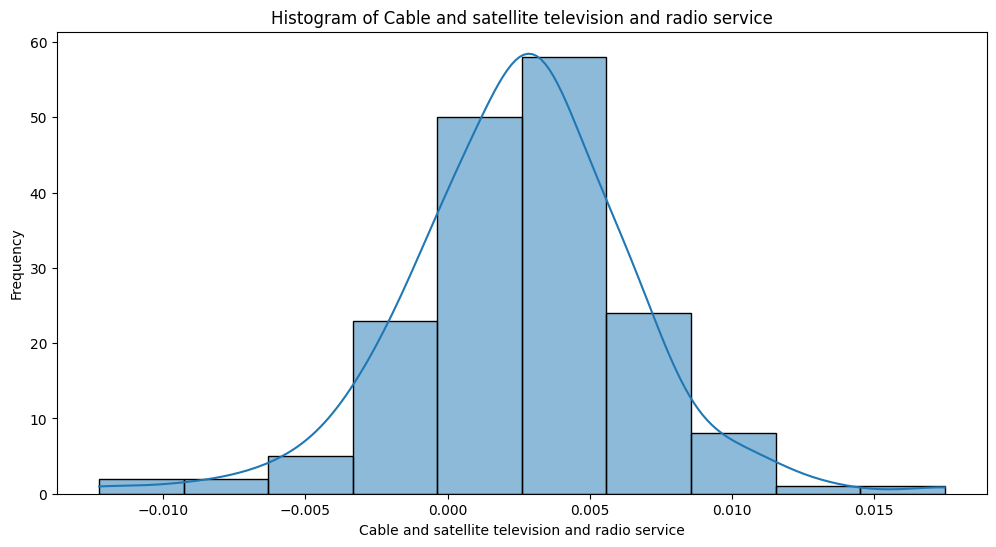

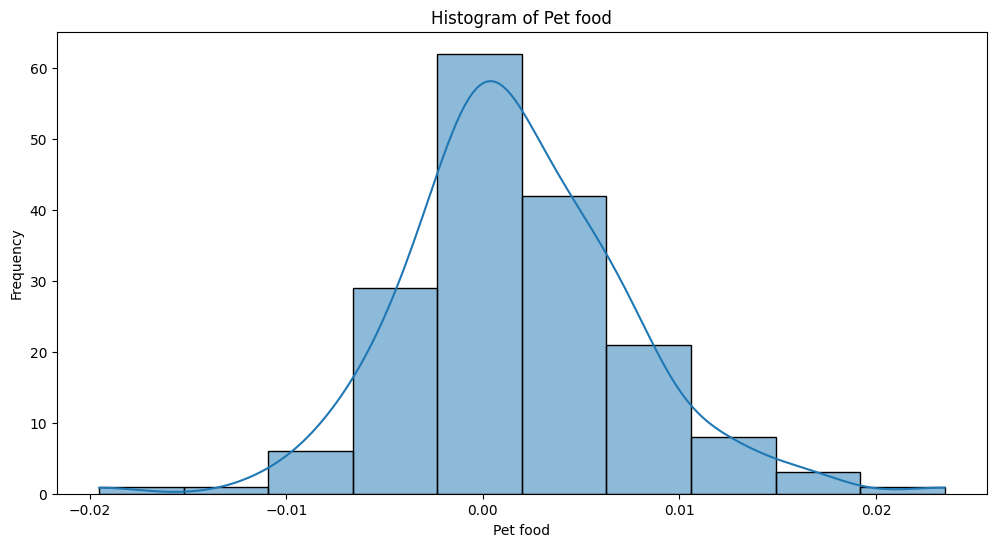

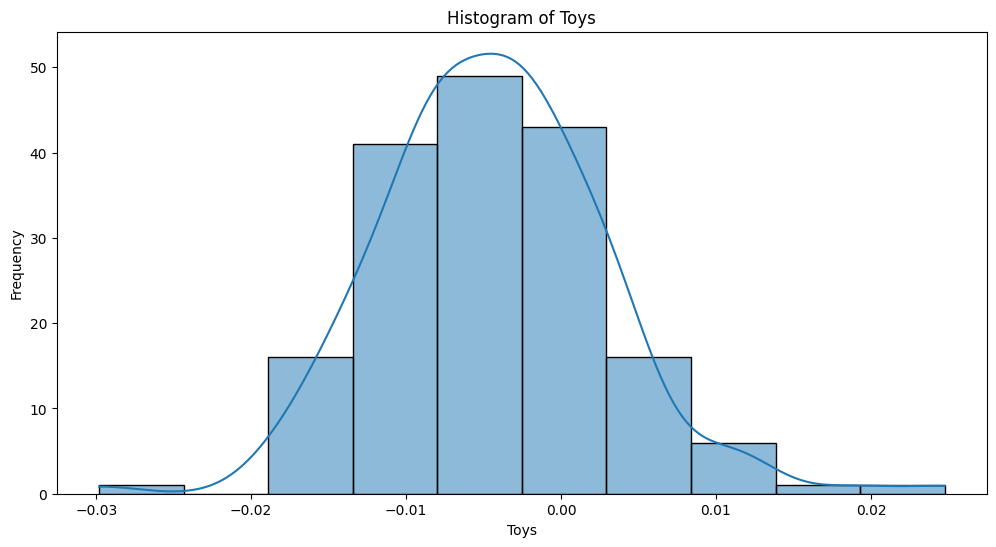

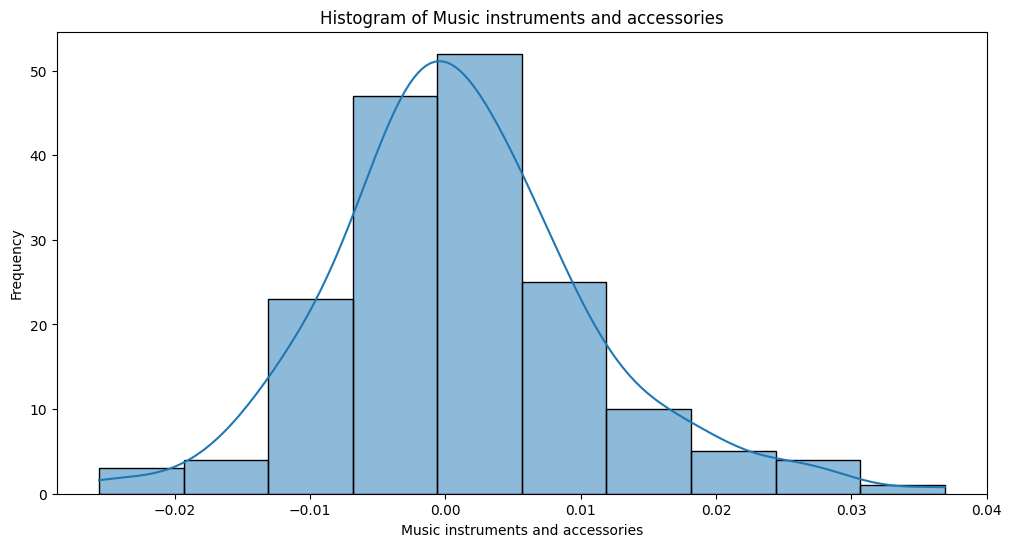

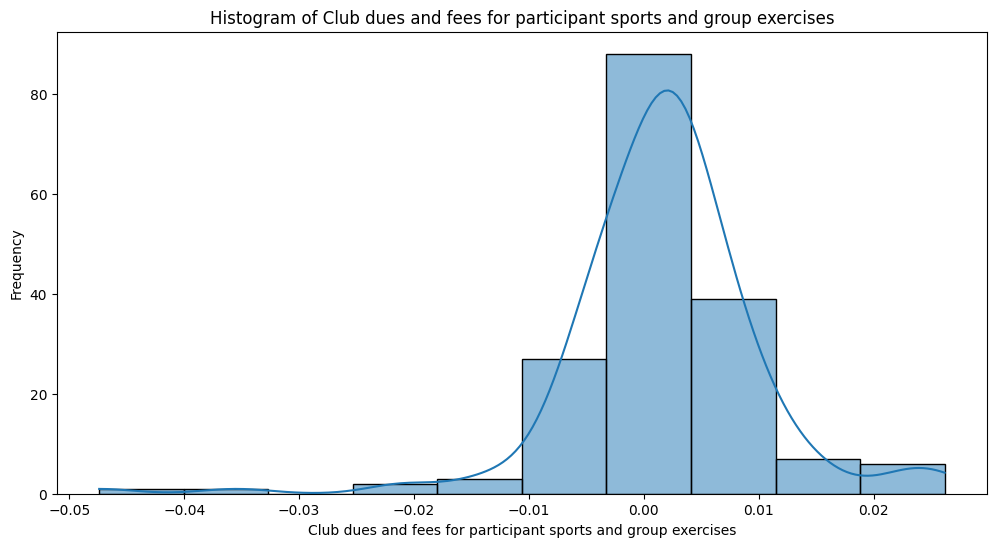

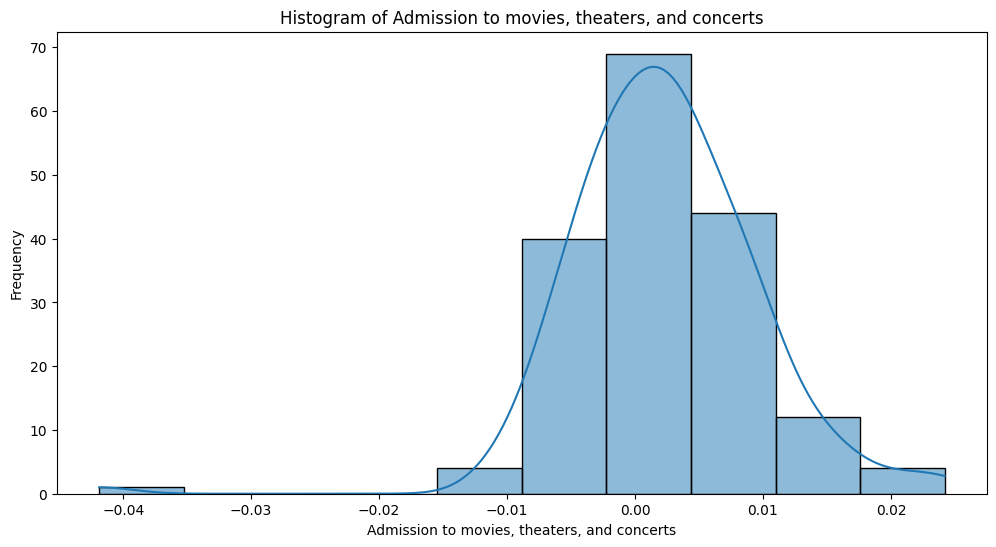

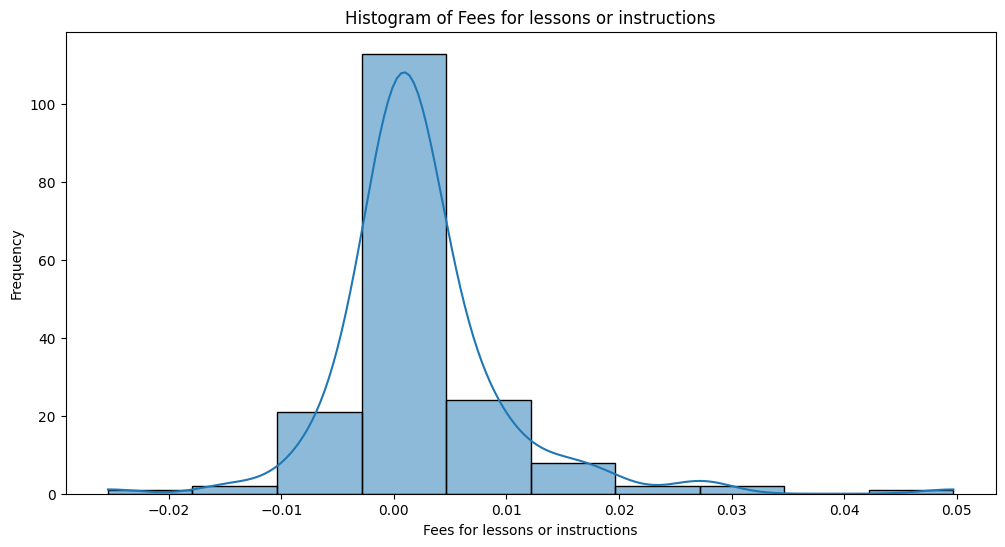

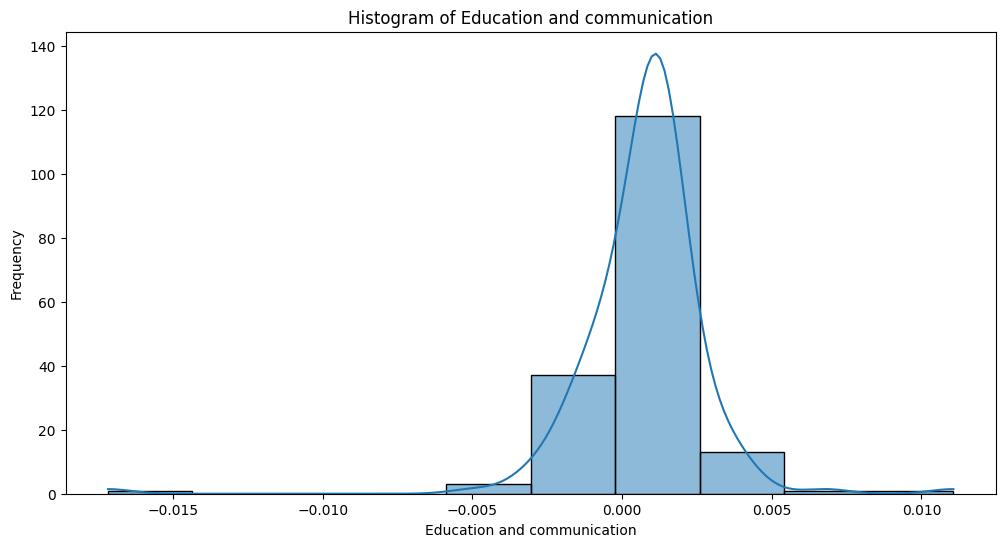

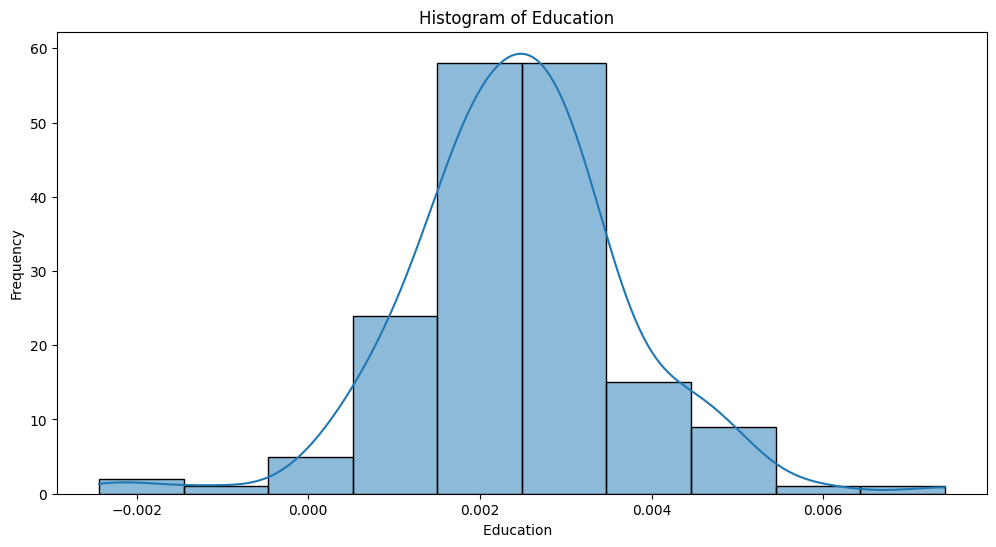

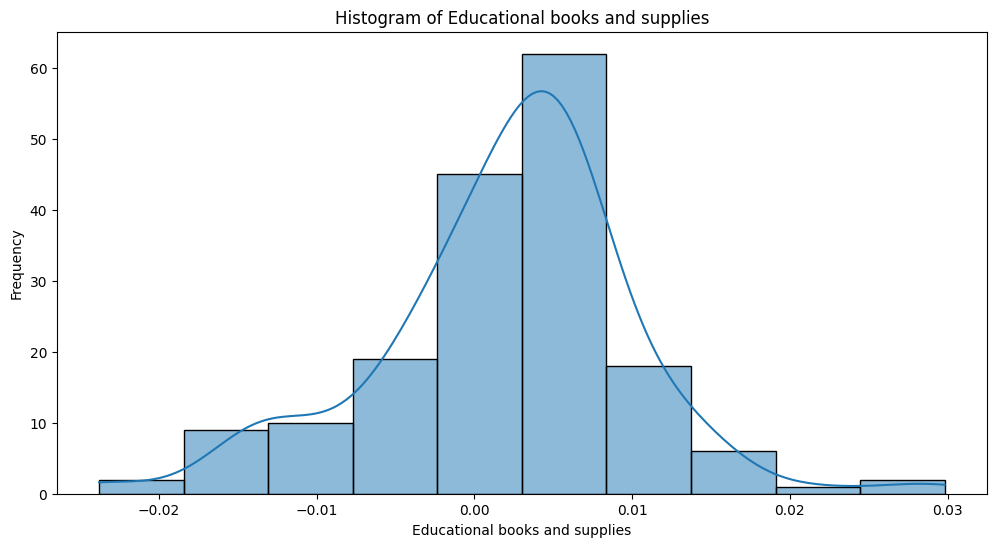

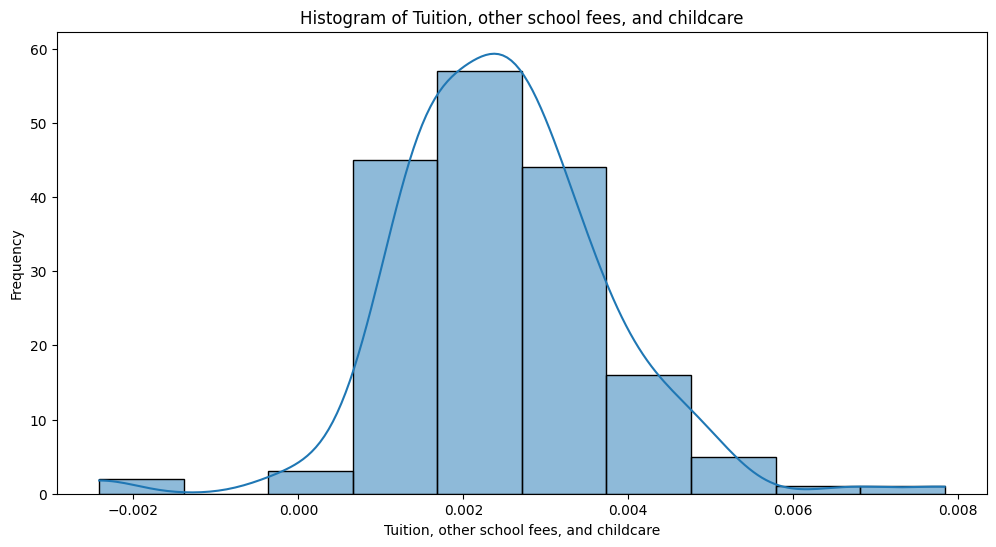

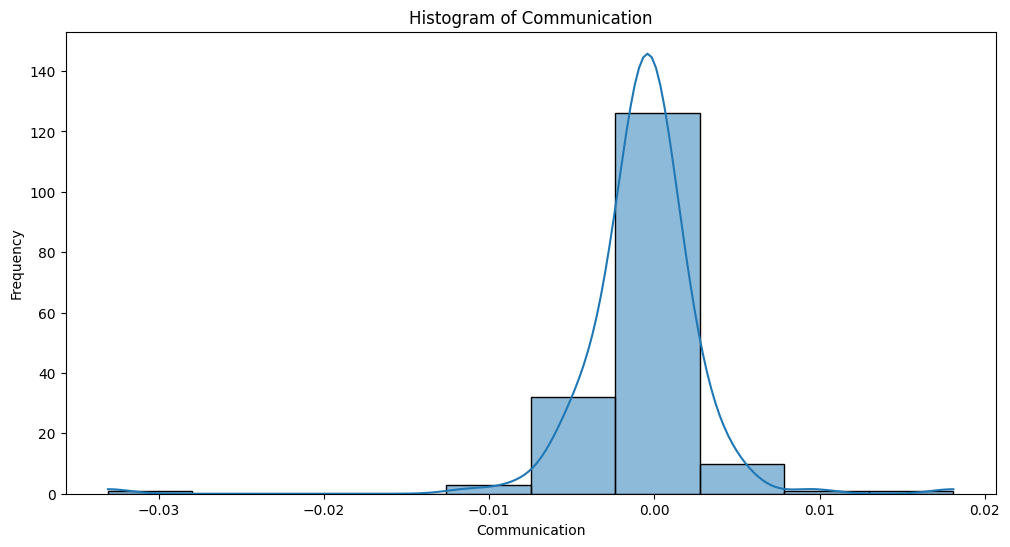

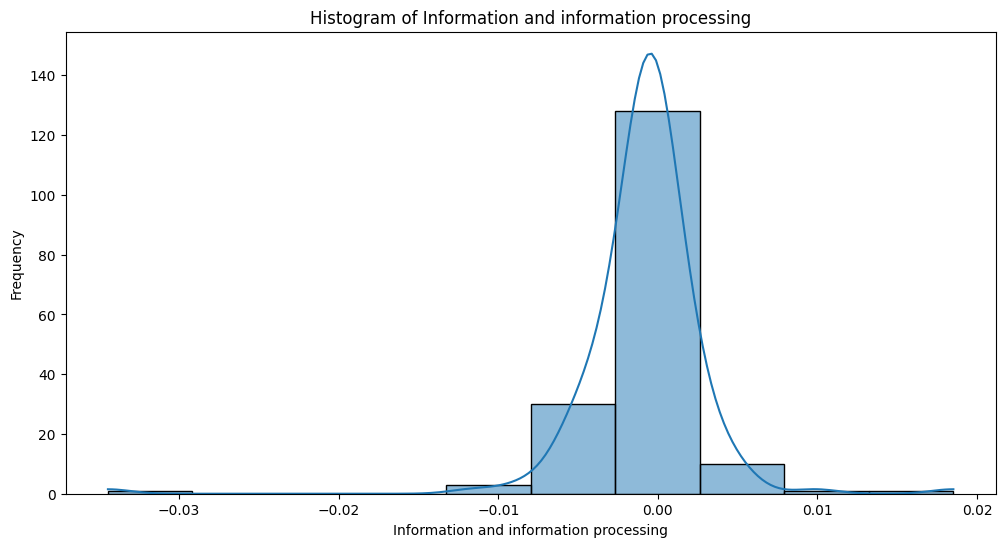

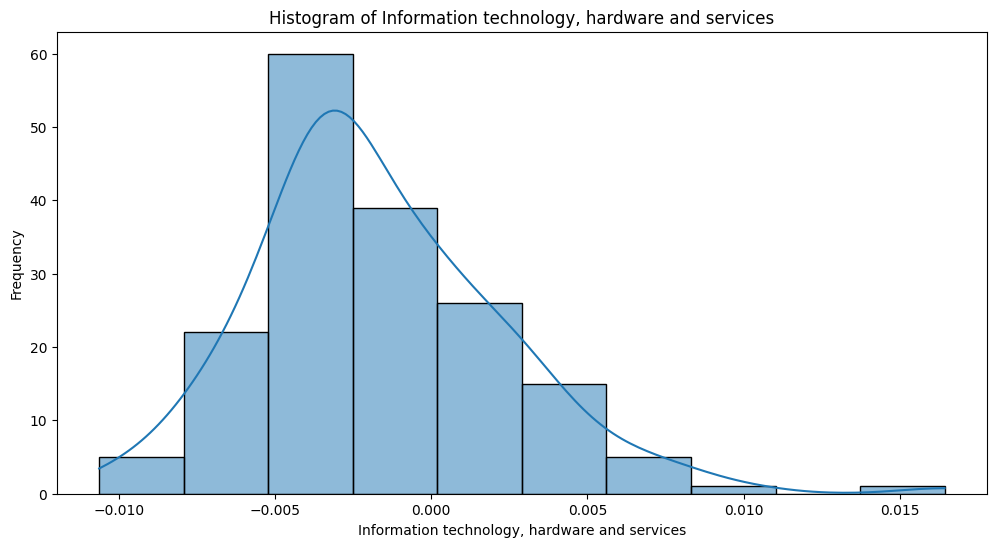

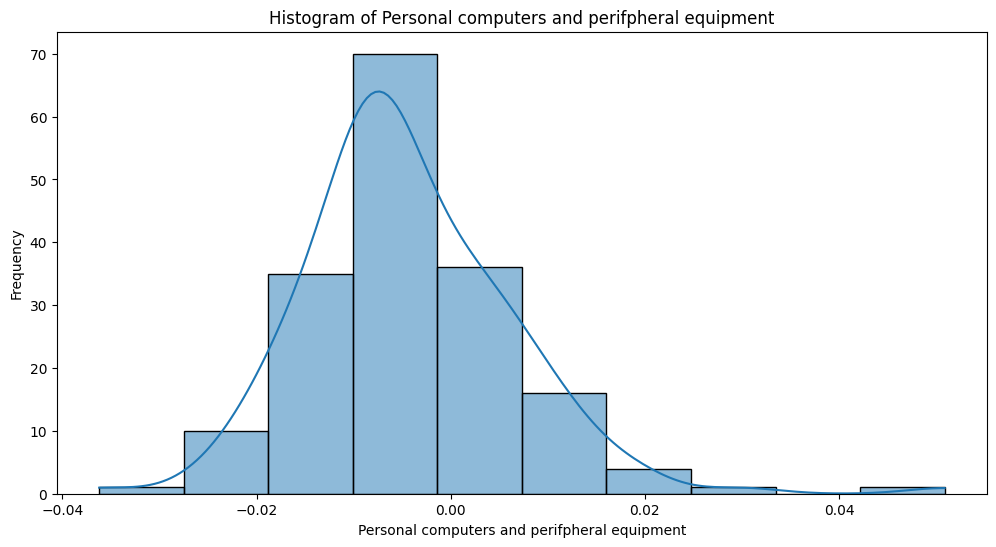

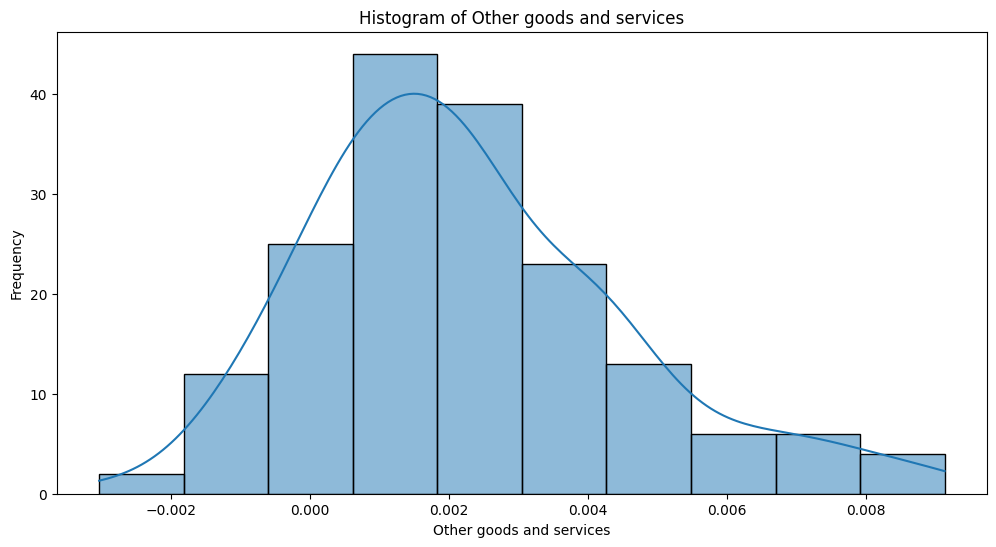

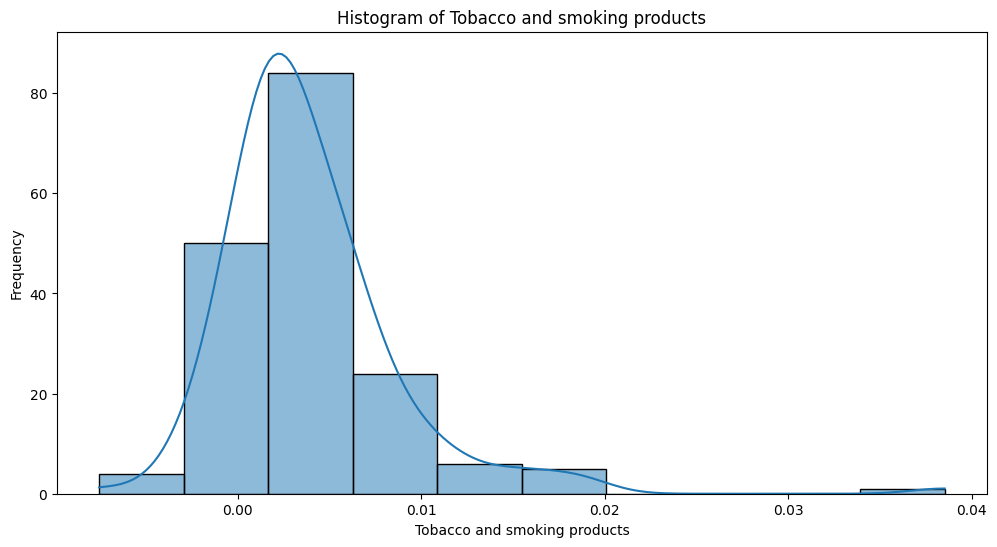

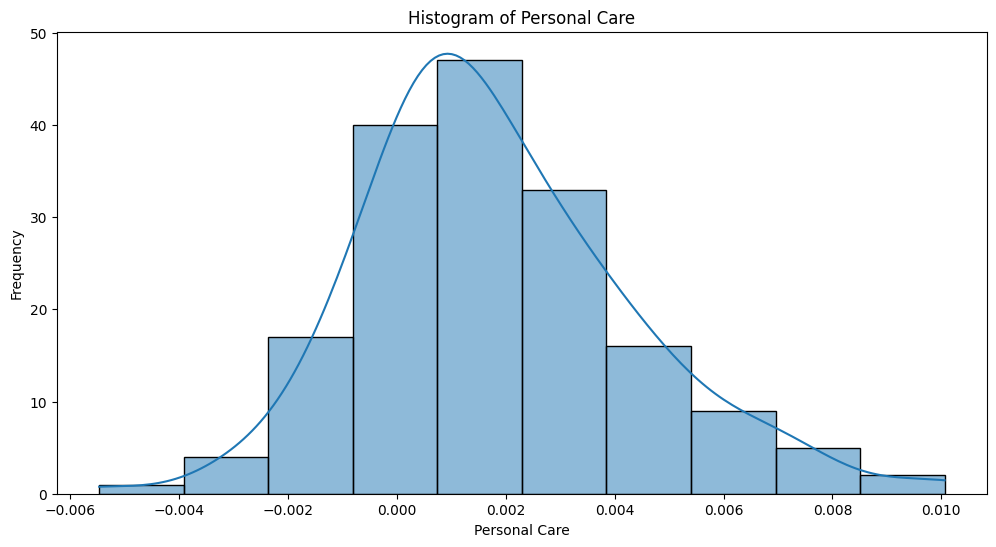

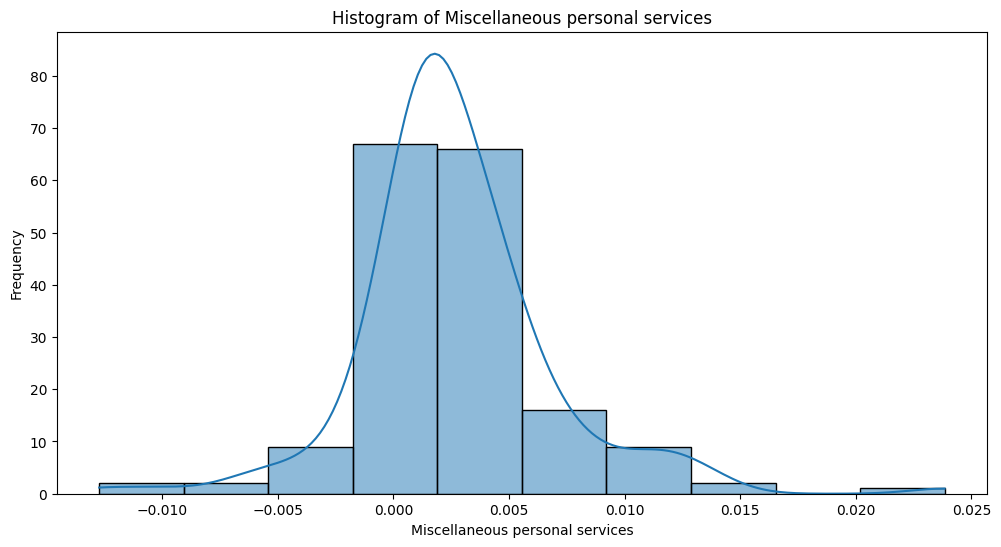

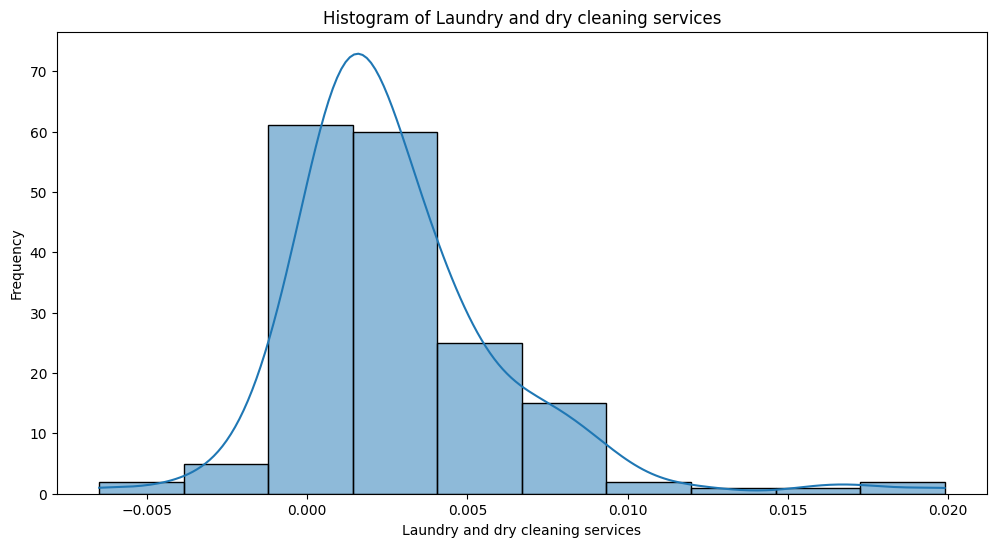

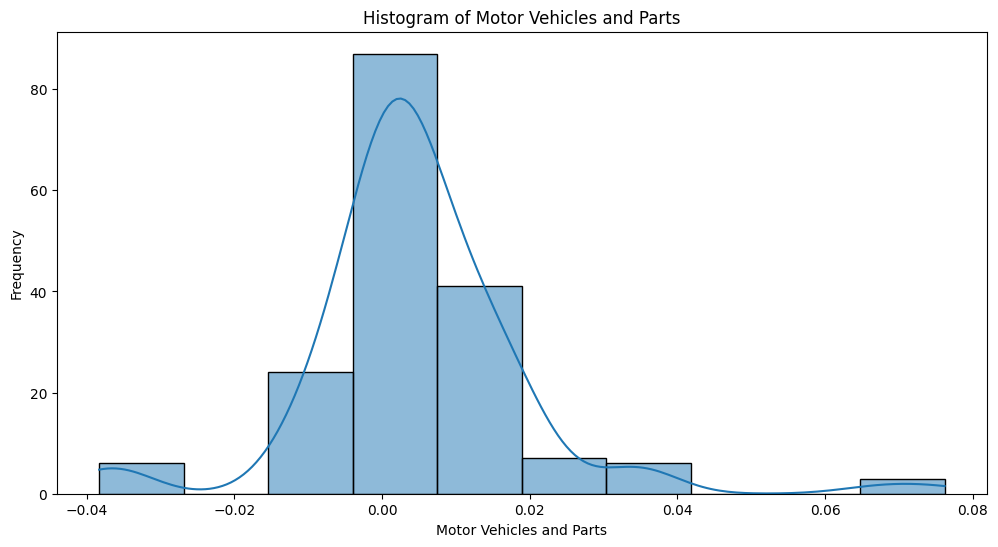

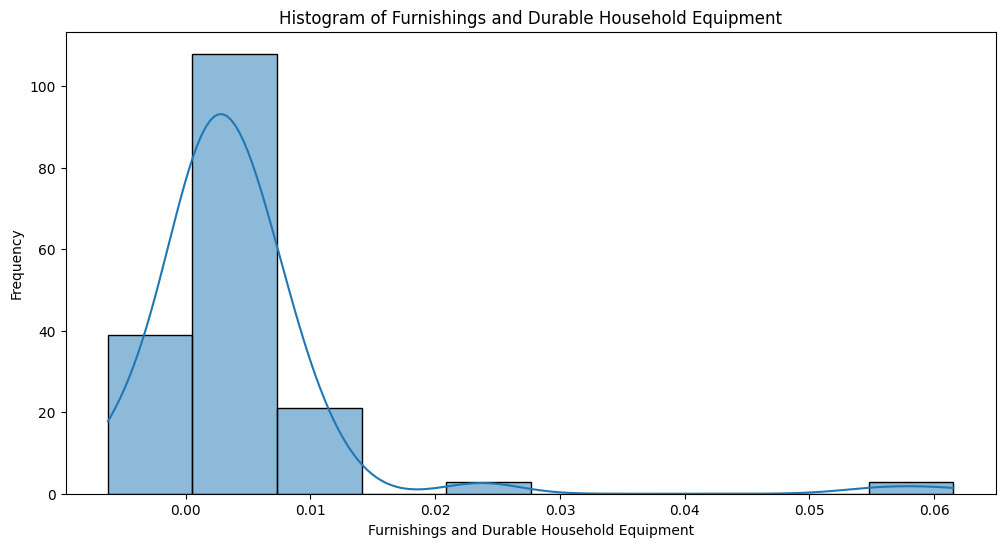

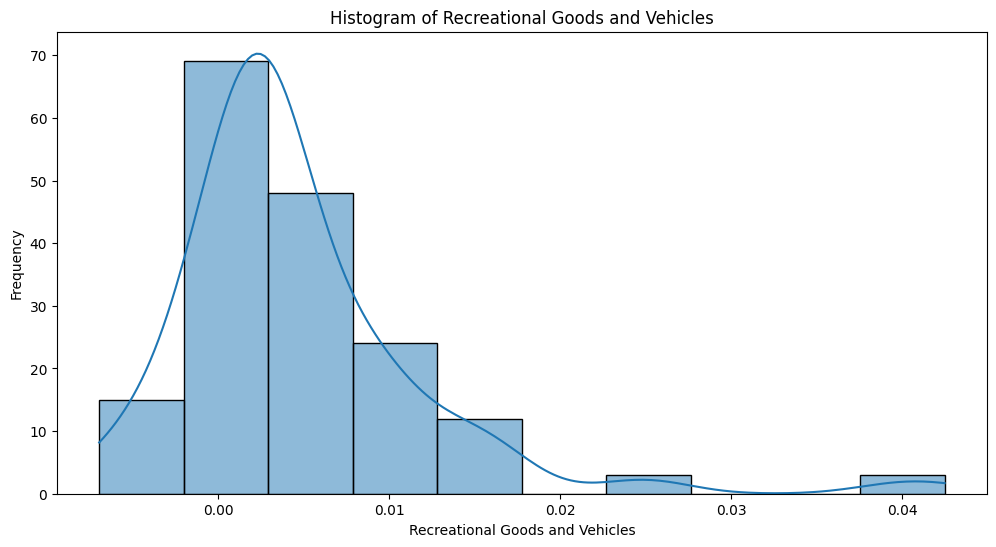

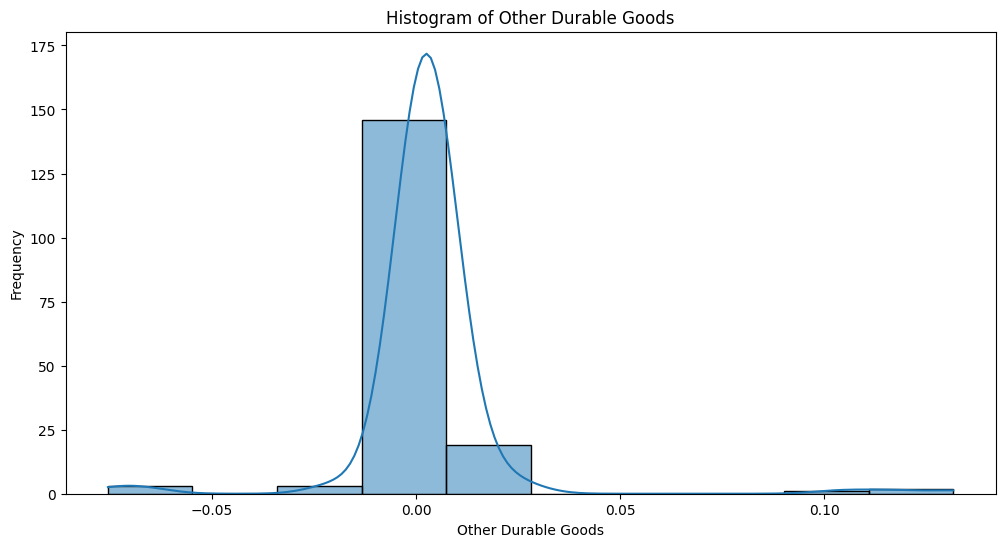

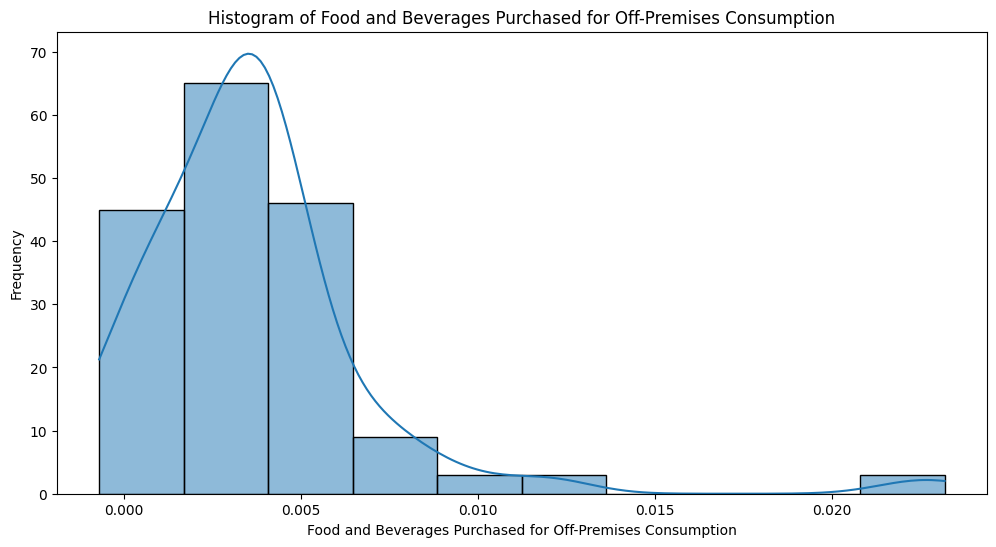

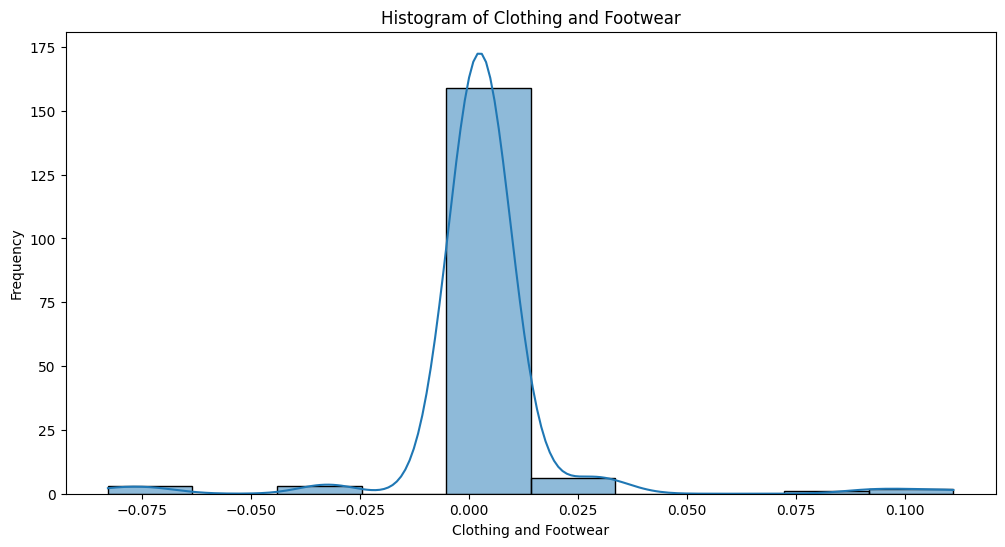

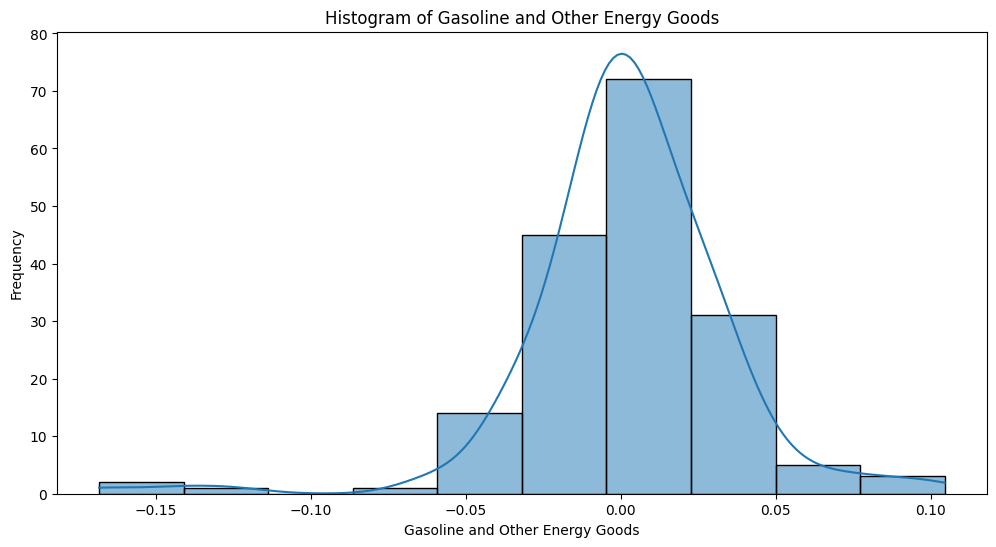

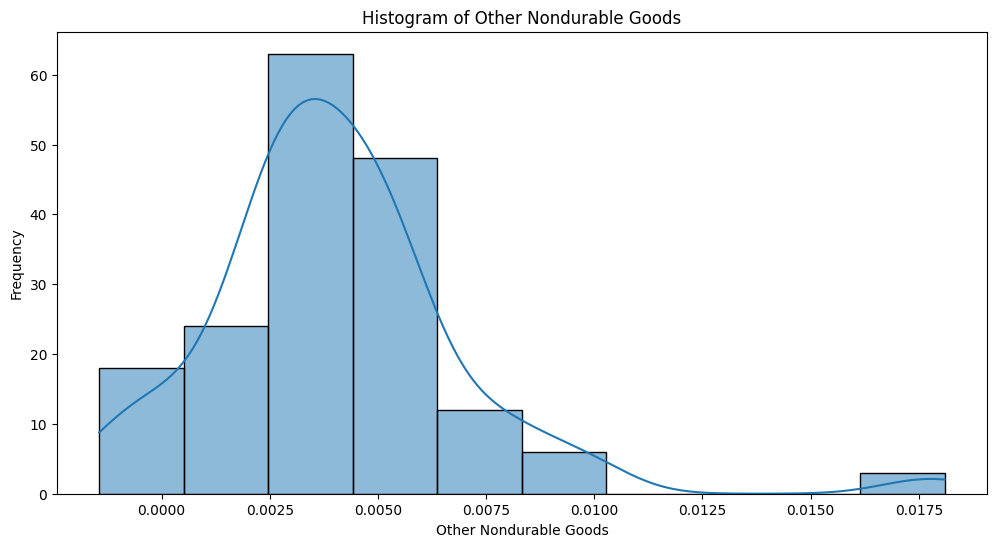

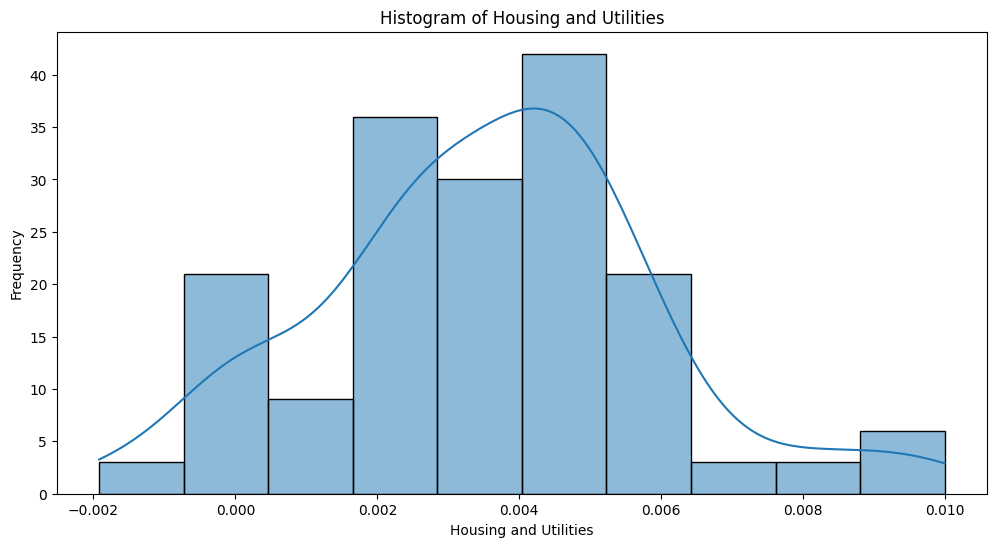

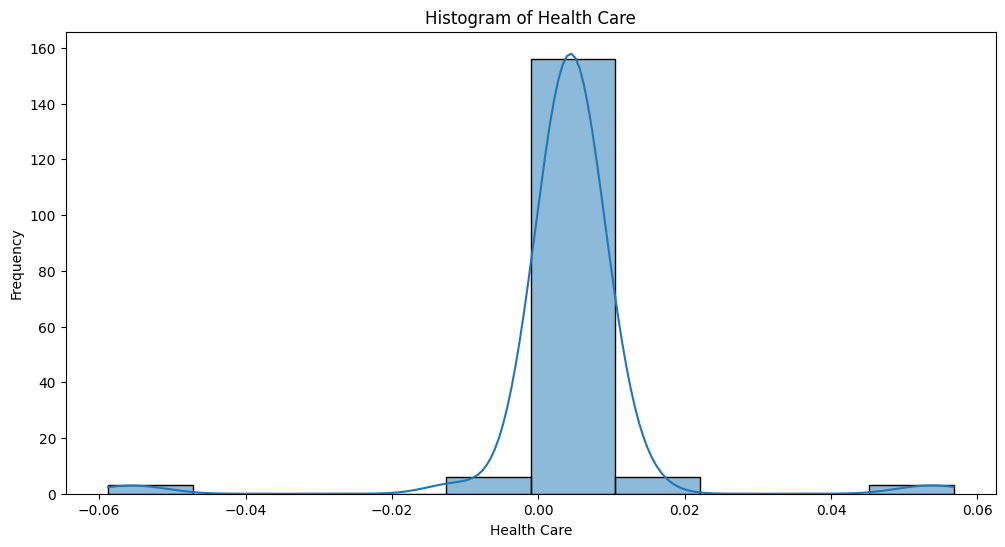

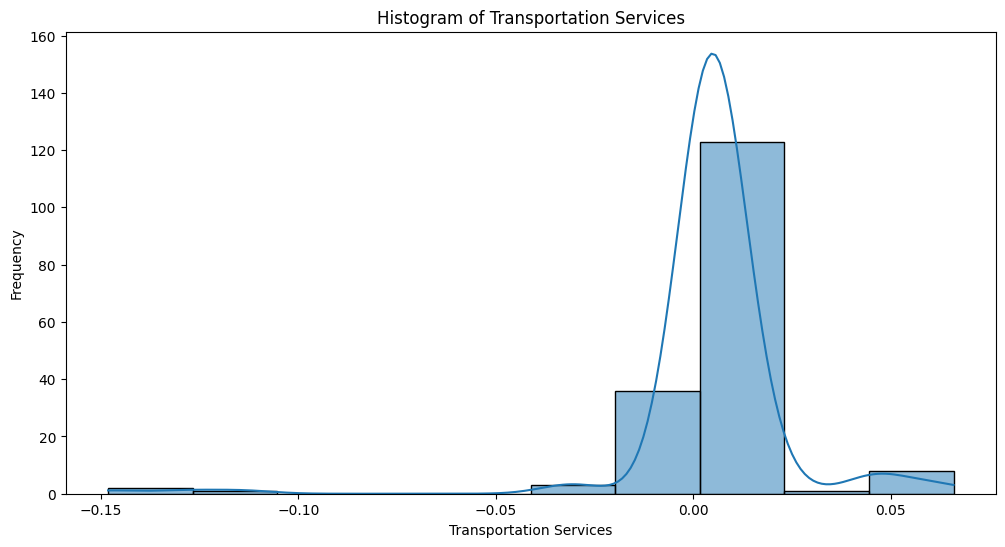

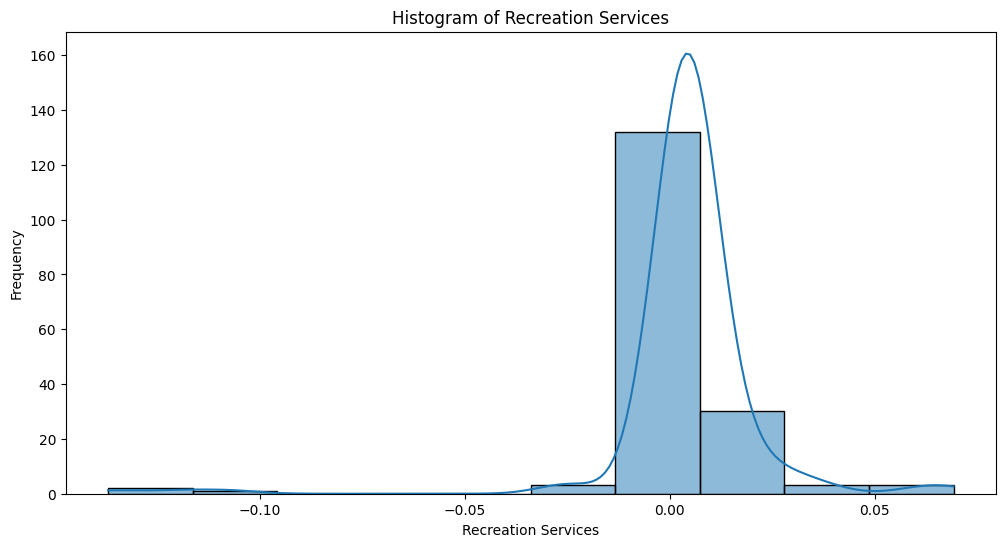

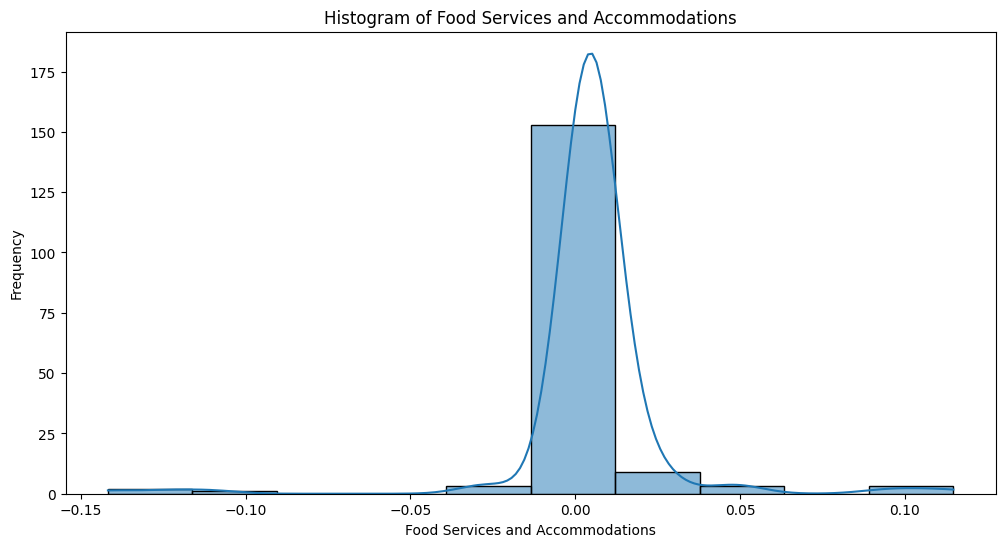

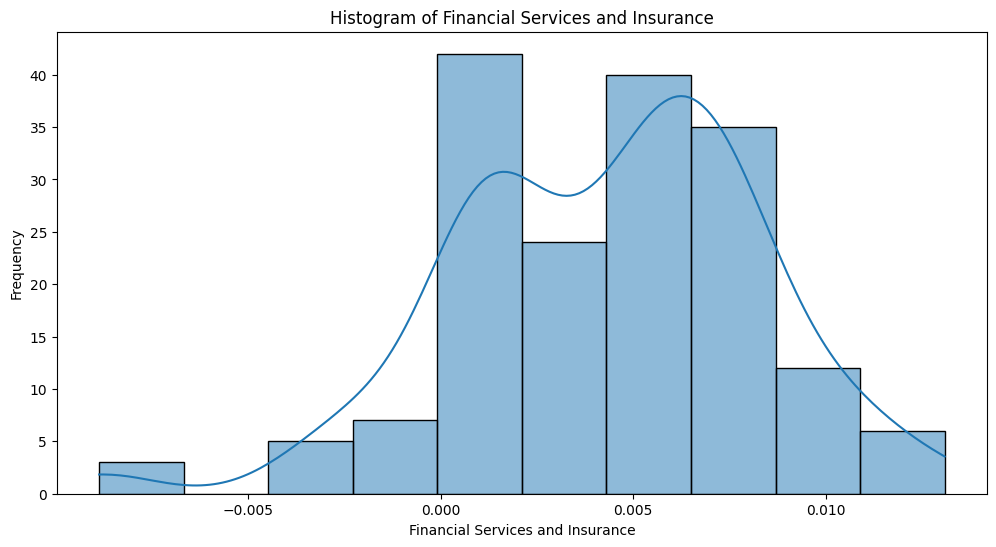

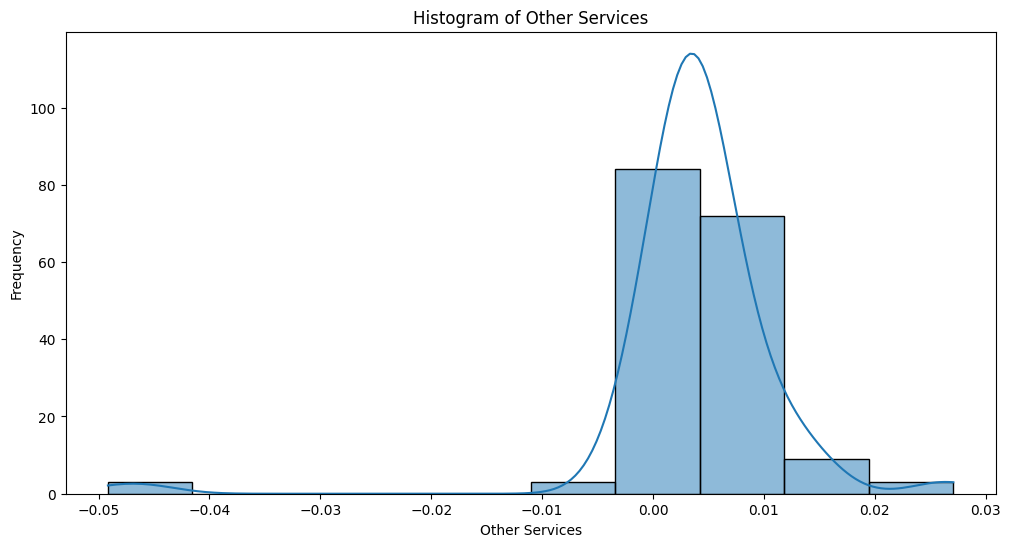

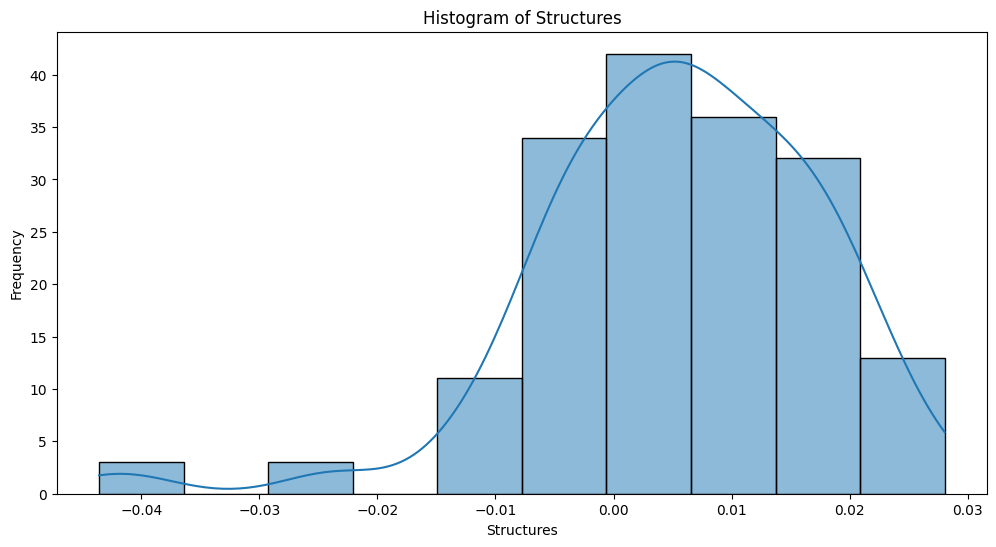

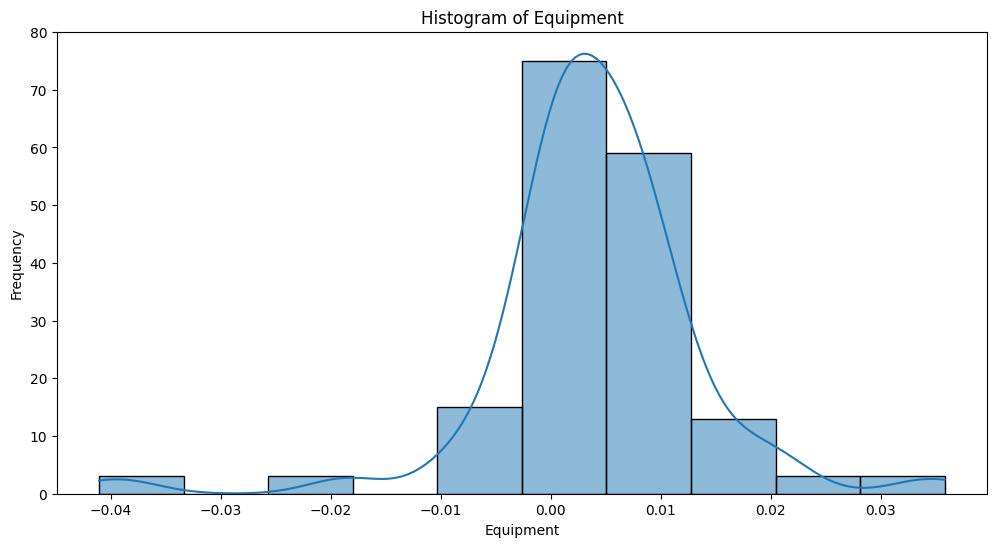

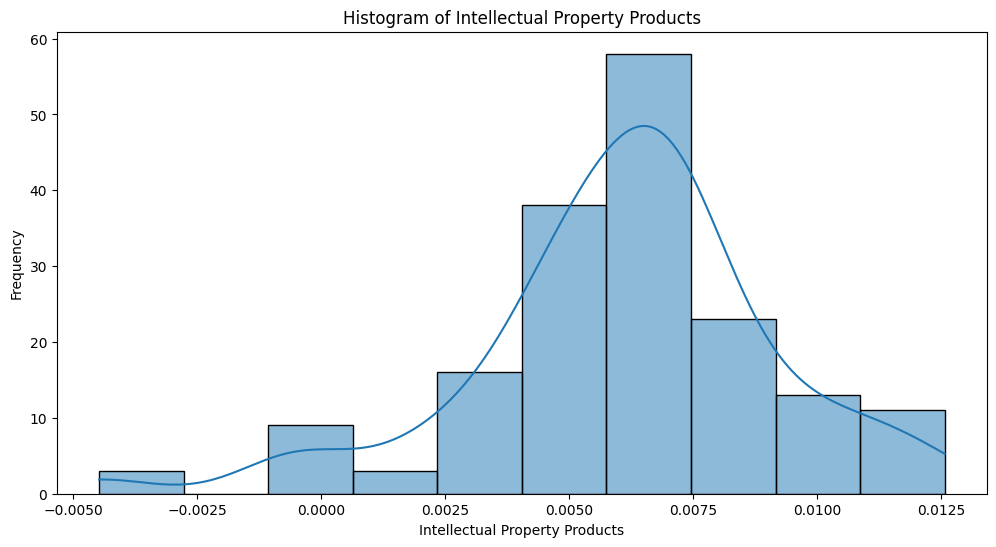

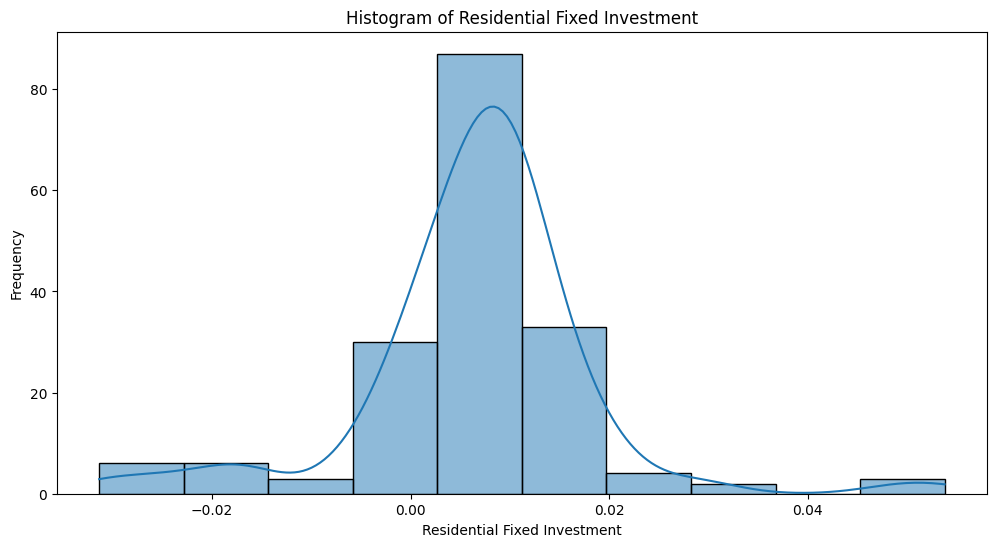

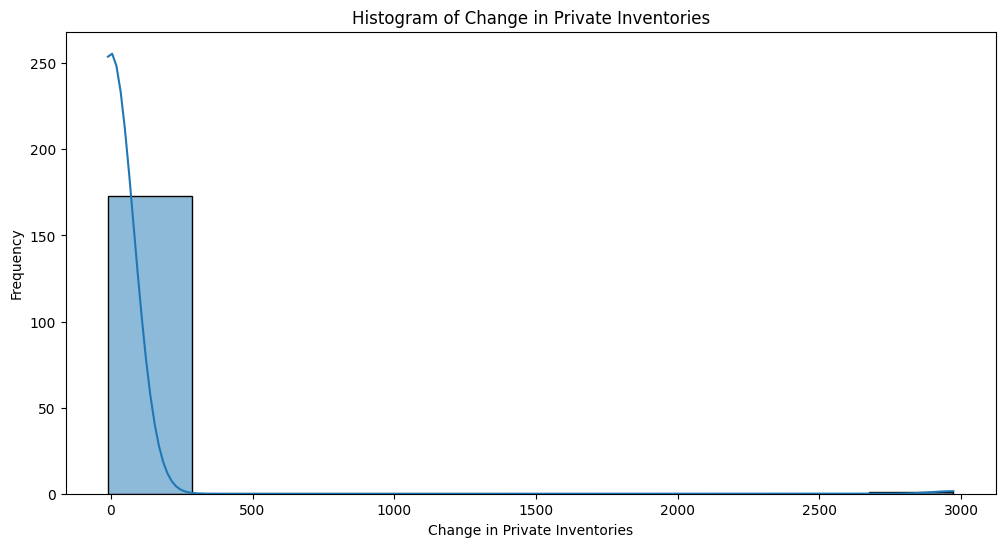

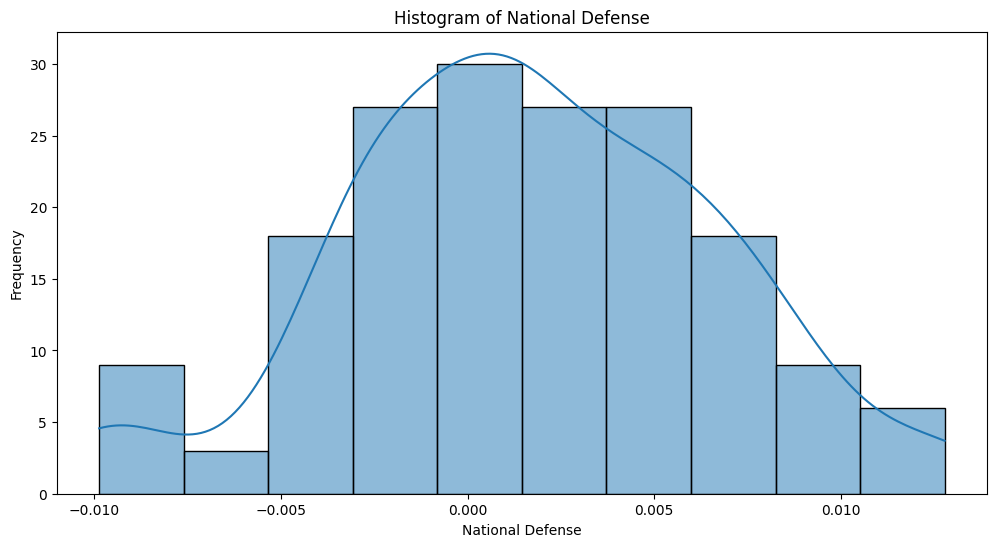

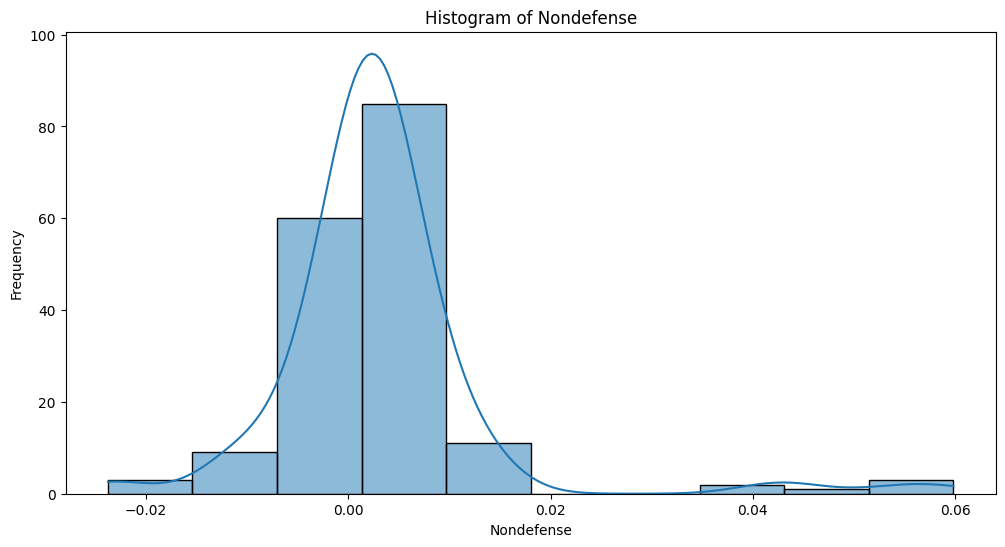

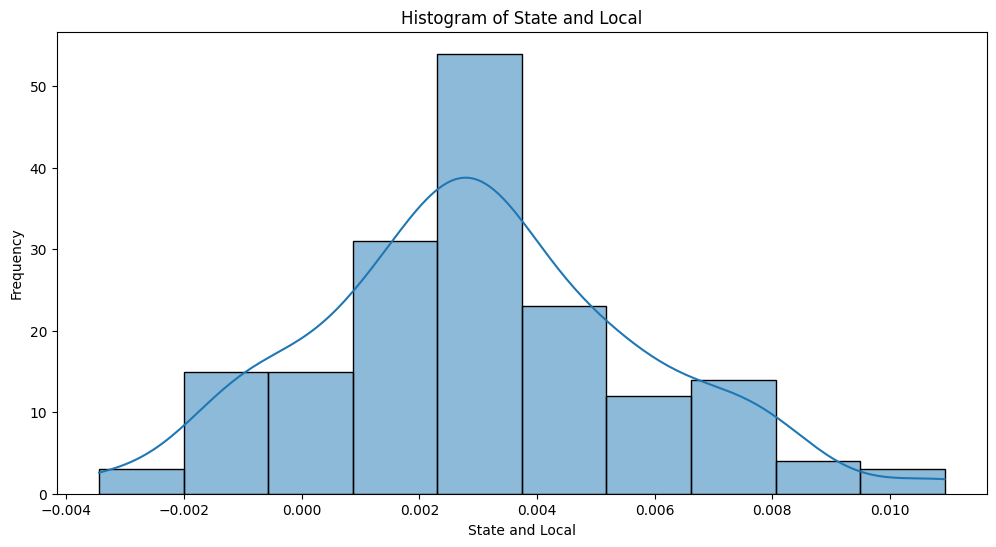

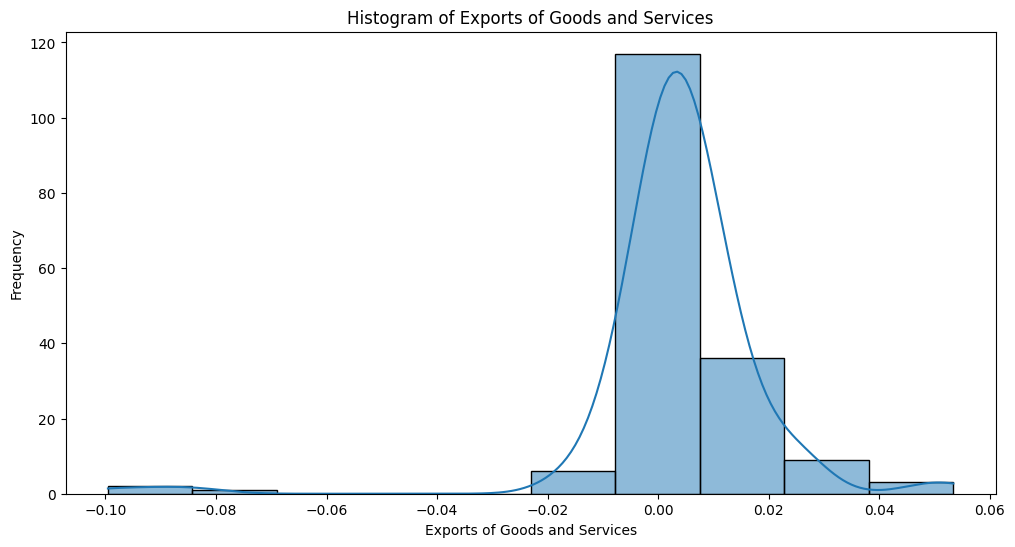

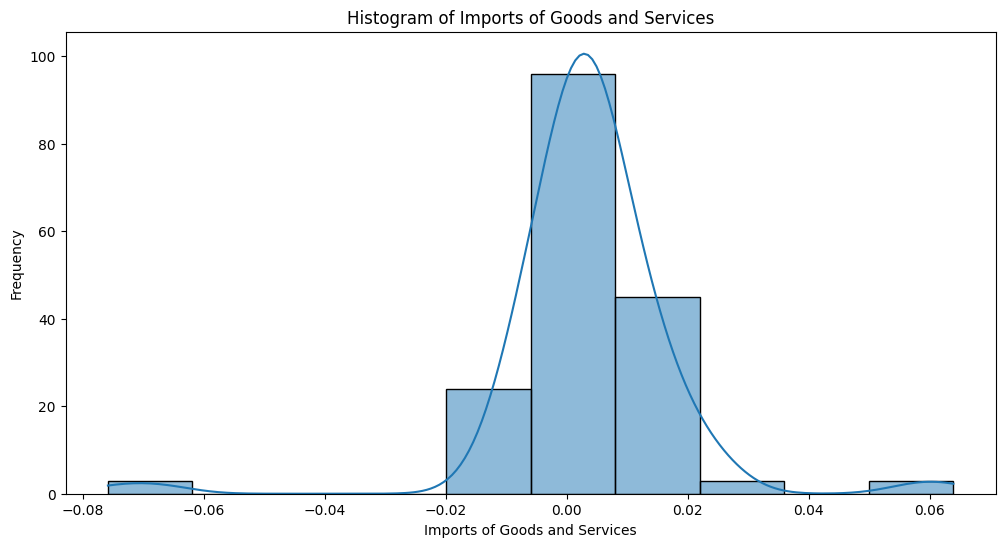

In [6]:
for column in numeric_columns:
    plt.figure(figsize=(12, 6))  # Set figure size
    sns.histplot(macro_data[column], kde=True, bins=10)  # kde=True adds a kernel density estimate
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

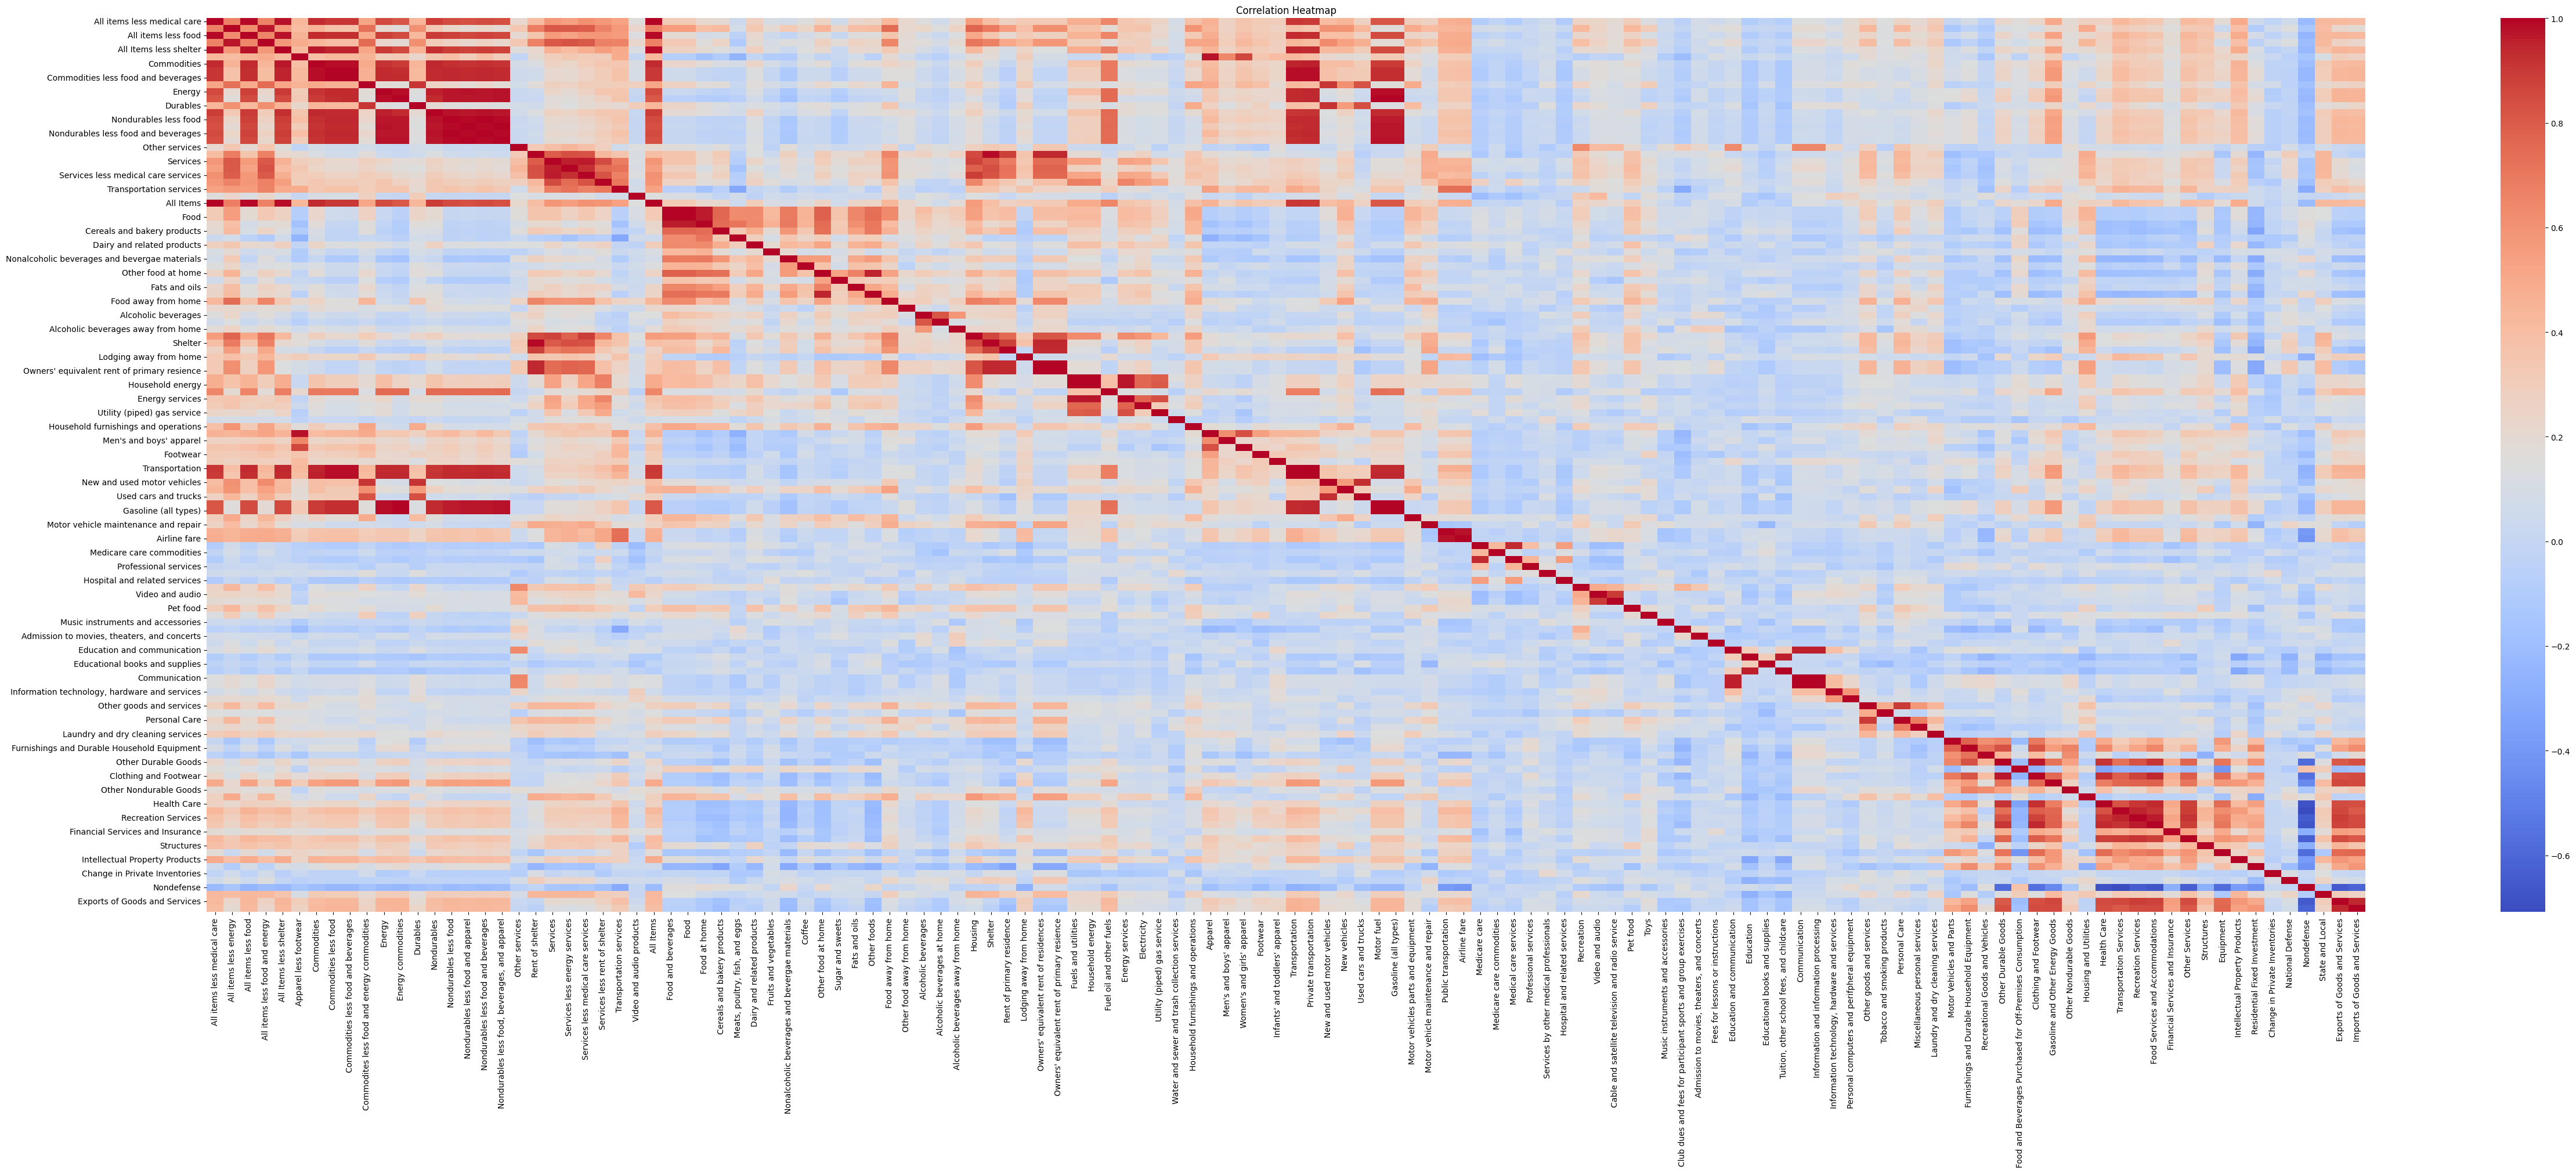

In [28]:
plt.figure(figsize=(60, 20))  # Set the figure size
sns.heatmap(macro_data.corr(), cmap='coolwarm')  # annot=True adds correlation values
plt.title('Correlation Heatmap')  # Optional: Add a title
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001D95ABAF380> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D95B4E5BC0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



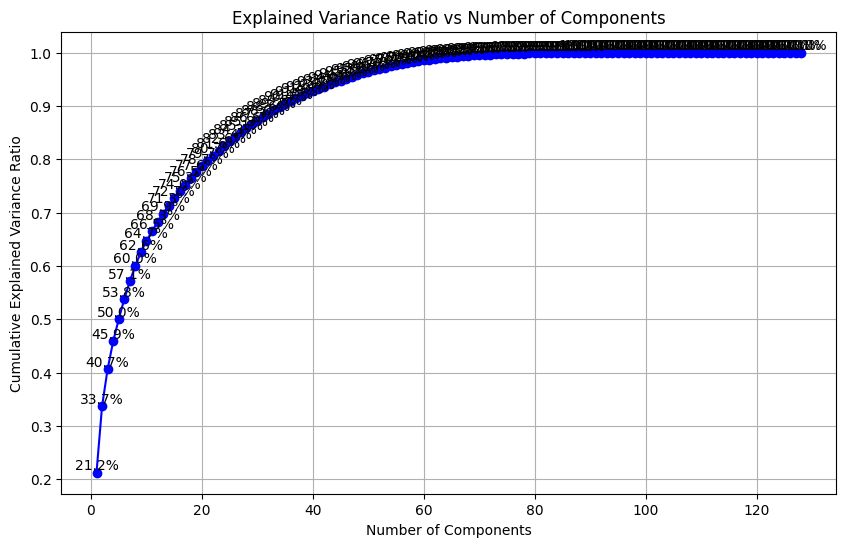

In [ ]:
sns.pairplot(pd.DataFrame(macro_data))

PCA Analysis Results:


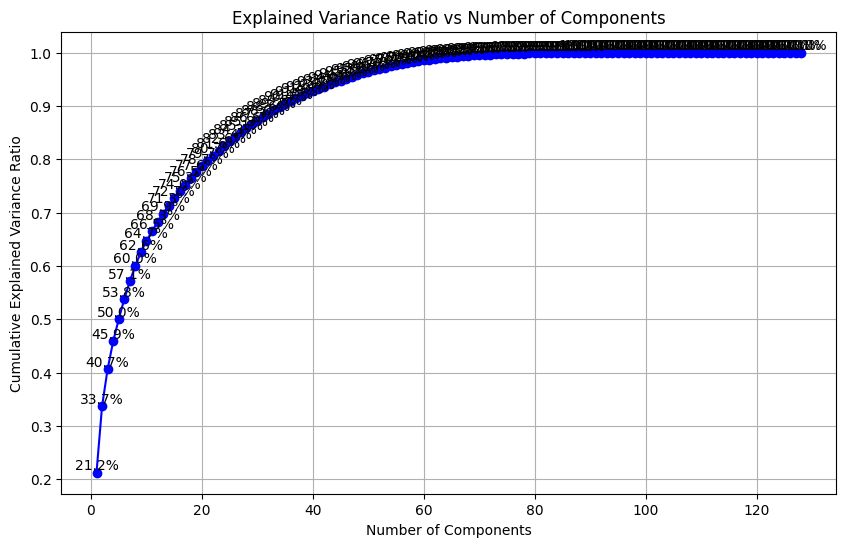


Explained variance ratio by component:
PC1: 21.2%
PC2: 12.5%
PC3: 7.0%
PC4: 5.2%
PC5: 4.2%
PC6: 3.8%
PC7: 3.3%
PC8: 2.9%
PC9: 2.6%
PC10: 2.1%
PC11: 1.8%
PC12: 1.8%
PC13: 1.6%
PC14: 1.4%
PC15: 1.4%
PC16: 1.3%
PC17: 1.3%
PC18: 1.2%
PC19: 1.1%
PC20: 1.1%
PC21: 1.0%
PC22: 1.0%
PC23: 0.9%
PC24: 0.9%
PC25: 0.9%
PC26: 0.9%
PC27: 0.8%
PC28: 0.8%
PC29: 0.7%
PC30: 0.7%
PC31: 0.7%
PC32: 0.6%
PC33: 0.6%
PC34: 0.6%
PC35: 0.6%
PC36: 0.6%
PC37: 0.5%
PC38: 0.5%
PC39: 0.4%
PC40: 0.4%
PC41: 0.4%
PC42: 0.4%
PC43: 0.4%
PC44: 0.4%
PC45: 0.4%
PC46: 0.3%
PC47: 0.3%
PC48: 0.3%
PC49: 0.3%
PC50: 0.3%
PC51: 0.3%
PC52: 0.3%
PC53: 0.2%
PC54: 0.2%
PC55: 0.2%
PC56: 0.2%
PC57: 0.2%
PC58: 0.2%
PC59: 0.2%
PC60: 0.2%
PC61: 0.1%
PC62: 0.1%
PC63: 0.1%
PC64: 0.1%
PC65: 0.1%
PC66: 0.1%
PC67: 0.1%
PC68: 0.1%
PC69: 0.1%
PC70: 0.1%
PC71: 0.1%
PC72: 0.0%
PC73: 0.0%
PC74: 0.0%
PC75: 0.0%
PC76: 0.0%
PC77: 0.0%
PC78: 0.0%
PC79: 0.0%
PC80: 0.0%
PC81: 0.0%
PC82: 0.0%
PC83: 0.0%
PC84: 0.0%
PC85: 0.0%
PC86: 0.0%
PC87: 0.0%
PC88: 0.0%

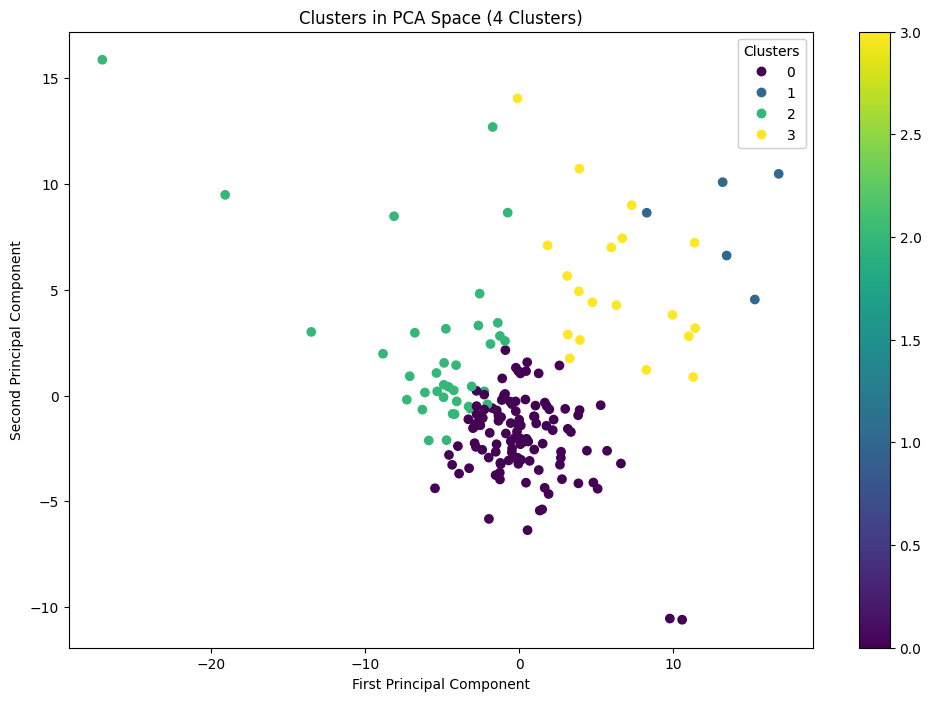

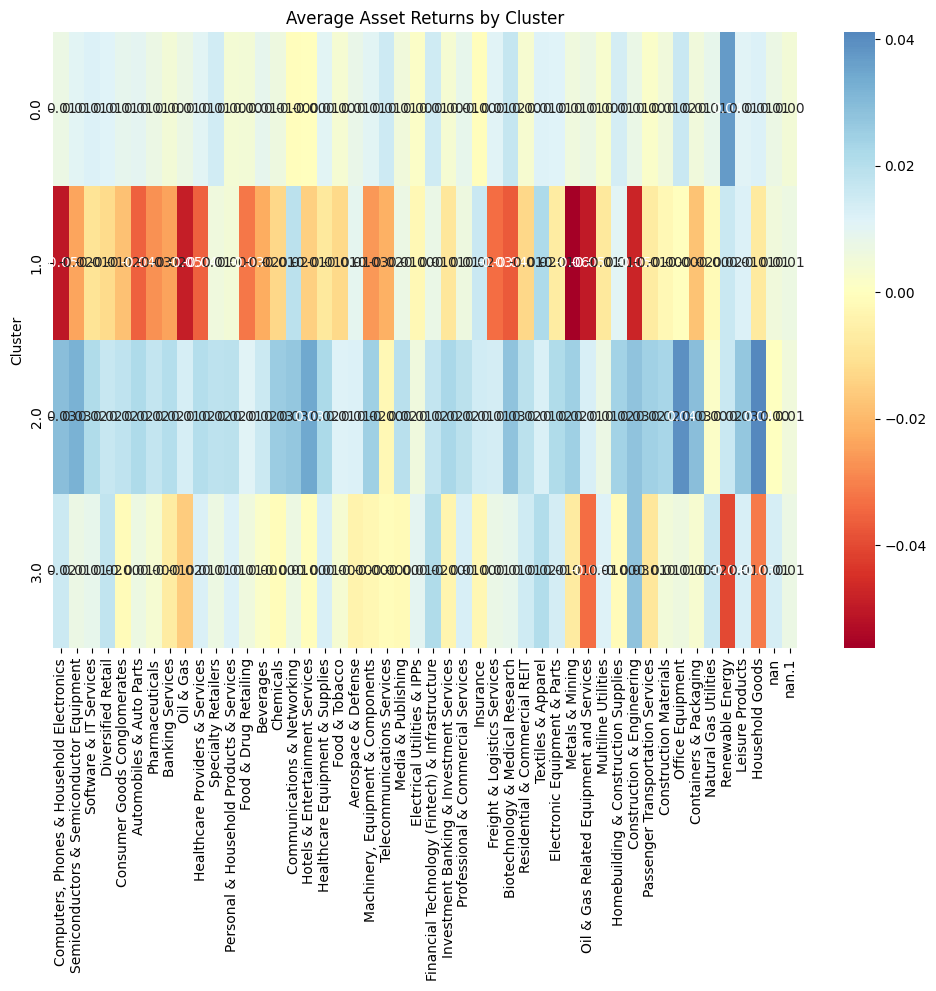


Cluster Sizes:
0    113
1      5
2     37
3     19
Name: count, dtype: int64

Total variance explained by first 2 PCs: 33.7%


C:\Users\wkaco\AppData\Local\Temp\ipykernel_25956\1978506317.py:129: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


KeyboardInterrupt: 

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def perform_pca_analysis(data, n_components=None):
    """
    Perform PCA analysis on the given data
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    if n_components is None:
        n_components = min(data.shape)
    pca = PCA(n_components=n_components)
    
    pca_result = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(
        data=pca_result,
        columns=[f'PC{i+1}' for i in range(pca_result.shape[1])]
    )
    
    return pca, pca_df, scaled_data

def plot_explained_variance(pca):
    """
    Plot explained variance ratio
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    ax.plot(range(1, len(pca.explained_variance_ratio_) + 1),
            cumsum, 'bo-')
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Cumulative Explained Variance Ratio')
    ax.set_title('Explained Variance Ratio vs Number of Components')
    ax.grid(True)
    for i, var in enumerate(cumsum):
        ax.text(i+1, var, f'{var:.1%}', ha='center', va='bottom')
    plt.show()

def perform_clustering(data, n_clusters=4):
    """
    Perform both K-means and GMM clustering
    """
    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data)
    
    # GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm_clusters = gmm.fit_predict(data)
    
    return kmeans_clusters, gmm_clusters, gmm.predict_proba(data)

def plot_regime_comparison(pca_df, kmeans_clusters, gmm_clusters):
    """
    Plot comparison of K-means and GMM clusters in PCA space
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # K-means plot
    scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_clusters, cmap='viridis')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.set_title('K-means Clusters')
    plt.colorbar(scatter1, ax=ax1)
    
    # GMM plot
    scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], c=gmm_clusters, cmap='viridis')
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.set_title('GMM Regimes')
    plt.colorbar(scatter2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

def plot_regime_statistics(assets_data, kmeans_clusters, gmm_clusters):
    """
    Plot comprehensive regime statistics
    """
    # Create DataFrames for both clustering methods
    kmeans_df = pd.DataFrame({'Regime': kmeans_clusters})
    gmm_df = pd.DataFrame({'Regime': gmm_clusters})
    
    # Combine with asset returns
    kmeans_combined = pd.concat([kmeans_df, assets_data], axis=1)
    gmm_combined = pd.concat([gmm_df, assets_data], axis=1)
    
    # Calculate statistics for each regime
    kmeans_stats = kmeans_combined.groupby('Regime').agg(['mean', 'std'])
    gmm_stats = gmm_combined.groupby('Regime').agg(['mean', 'std'])
    
    # Plot regime characteristics
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2)
    
    # 1. Mean returns heatmap
    ax1 = fig.add_subplot(gs[0, 0])
    sns.heatmap(kmeans_combined.groupby('Regime').mean(), 
                annot=True, fmt='.2f', cmap='RdYlBu', center=0, ax=ax1)
    ax1.set_title('K-means Regime Mean Returns')
    
    # 2. GMM mean returns heatmap
    ax2 = fig.add_subplot(gs[0, 1])
    sns.heatmap(gmm_combined.groupby('Regime').mean(), 
                annot=True, fmt='.2f', cmap='RdYlBu', center=0, ax=ax2)
    ax2.set_title('GMM Regime Mean Returns')
    
    # 3. Volatility comparison
    ax3 = fig.add_subplot(gs[1, 0])
    kmeans_combined.groupby('Regime').std().plot(kind='bar', ax=ax3)
    ax3.set_title('K-means Regime Volatilities')
    ax3.set_xlabel('Regime')
    ax3.set_ylabel('Standard Deviation')
    
    # 4. GMM Volatility comparison
    ax4 = fig.add_subplot(gs[1, 1])
    gmm_combined.groupby('Regime').std().plot(kind='bar', ax=ax4)
    ax4.set_title('GMM Regime Volatilities')
    ax4.set_xlabel('Regime')
    ax4.set_ylabel('Standard Deviation')
    
    plt.tight_layout()
    plt.show()
    
    return kmeans_stats, gmm_stats

def print_regime_summary(kmeans_stats, gmm_stats, assets_data, kmeans_clusters, gmm_clusters):
    """
    Print comprehensive regime summary statistics
    """
    print("\n=== Regime Analysis Summary ===")
    
    # Regime frequencies
    print("\nK-means Regime Frequencies:")
    print(pd.Series(kmeans_clusters).value_counts().sort_index())
    print("\nGMM Regime Frequencies:")
    print(pd.Series(gmm_clusters).value_counts().sort_index())
    
    # Average duration of regimes
    def calculate_regime_duration(clusters):
        durations = []
        current_regime = clusters[0]
        current_duration = 1
        
        for regime in clusters[1:]:
            if regime == current_regime:
                current_duration += 1
            else:
                durations.append(current_duration)
                current_regime = regime
                current_duration = 1
        durations.append(current_duration)
        
        return np.mean(durations)
    
    print("\nAverage Regime Durations (periods):")
    print(f"K-means: {calculate_regime_duration(kmeans_clusters):.2f}")
    print(f"GMM: {calculate_regime_duration(gmm_clusters):.2f}")
    
    # Correlation between regimes
    correlation = stats.contingency.crosstab(kmeans_clusters, gmm_clusters)[0]
    print("\nRegime Correlation Matrix (K-means vs GMM):")
    print(correlation)

def main_analysis(macro_data, assets_data, n_regimes=4):
    """
    Main analysis function with both K-means and GMM
    """
    # PCA Analysis
    pca_macro, pca_df_macro, scaled_macro = perform_pca_analysis(macro_data)
    plot_explained_variance(pca_macro)
    
    # Perform clustering
    kmeans_clusters, gmm_clusters, gmm_probs = perform_clustering(pca_df_macro, n_regimes)
    
    # Plot regime comparisons
    plot_regime_comparison(pca_df_macro, kmeans_clusters, gmm_clusters)
    
    # Calculate and plot regime statistics
    kmeans_stats, gmm_stats = plot_regime_statistics(assets_data, kmeans_clusters, gmm_clusters)
    
    # Print comprehensive summary
    print_regime_summary(kmeans_stats, gmm_stats, assets_data, kmeans_clusters, gmm_clusters)
    
    return pca_macro, kmeans_clusters, gmm_clusters, gmm_probs, kmeans_stats, gmm_stats

# Run the analysis
pca_results, kmeans_results, gmm_results, gmm_probabilities, kmeans_statistics, gmm_statistics = main_analysis(macro_data, X, n_regimes=4)